# Analyse exploratoire du jeu de données
# "2016 Building Energy Benchmarking" de SEATTLE

## Objectif :
- Comprendre du mieux possible nos données
- Se faire une idée de l'approche pour la sélection des variables

### Analyse de Forme :
- **Variables cible** : <i>SiteEnergyUse(kBtu)</i> et <i>TotalGHGEmissions</i>
- **Lignes et colonnes** : 3376 lignes et 46 colonnes
- **Types de variables** : qualitatives : 16 (dont 1 booléene), quantitatives : 30
- **Valeurs manquantes** :
    - relativement peu de valeurs manquantes : **12.84 %**
    - 2 colonnes "vides" ('Outlier' et 'Comments') comptant pour **4.3% (1/3 des valeurs manquates)**
    - la majorité des valeurs manquantes restantes est concentré sur **6 colonnes**
    - => le jeu de données initial contient donc **38 colonnes "saines"**

### Analyse univariée :
- **Visualisation des variables cibles** :
    - **SiteEnergyUse(kBtu)** : distribution de forme exponentielle
    - **TotalGHGEmissions** : distribution de forme exponentielle 
    
- **Signification des variables** :
    - **Variables quantitatives** : voir détails de l'analyse univariée plus bas.
    - **Variables qualitatives** : voir détails de l'analyse univariée plus bas.

### Analyse bivariée :
- **Relation Variables / Cibles** :
    - **Variables quantitatives** : on observe une **part importante de corrélation linéaire entre les variables et les valeurs cibles**, et pour les mêmes variables dans des proportions similaires. Cela nous amène à nous demander si nos valeurs cibles ne sont pas elle-mêmes corrélées linéairement. Pour plus de détails, voir le rapport de l'analyse bivariée correspondante plus bas.
    - **Variables qualitatives** : Voir le rapport de l'analyse bivariée correspondante plus bas.
    
    
### Analyse multivariée

- **Relation Variables / Variables** :
   - Nous pouvons identifier **3 principaux clusters de variables fortemment corrélées linéairement entre elles** : il conviendra d'en faire la synthèses avant d'appliquer nos modèles de Machine Learning sur le jeu de données.
   - Nous avons ici la confirmation que **nos valeurs cibles sont bel et bien fortement corrélées linéairement** : la problématique énoncée comme double dans l'énoncé de mission (consommation d'énergie + CO2) semble se simplifier.

### Importation des données et librairires utiles

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

from pathlib import Path

import missingno as msno
import FETCH_LOAD_DATAS

In [2]:
# Fonction à n'appeler qu'à la première ouverture du notebook.
# supprimer cette cellule ensuite ou passer son contenu en commentaire à l'aide de la commande "Ctrl+/""

#FETCH_LOAD_DATAS.fetch_seattle_data()

In [3]:
data = FETCH_LOAD_DATAS.load_seattle_data()

In [4]:
df = data.copy()

##### Paramètres généraux d'affichage et fonction de sauvegarde des visualisations

In [5]:
SEED = 49
rng = np.random.default_rng(SEED)

In [6]:
pd.set_option('display.max_row', 50)
pd.set_option('display.max_column', 50)

plt.rcParams['figure.figsize'] = [10, 8]

In [7]:
IMAGES_PATH = Path() / "img" / "exploration"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
ID_FIG = 0

def save_fig(fig_title, resolution=300):
    fig_id = str(globals()['ID_FIG'])
    path = IMAGES_PATH / f"exploration - {fig_id} - {fig_title}.png"
    globals()['ID_FIG']+=1
    plt.savefig(path, format='png', dpi=resolution)

In [8]:
df.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [10]:
df.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

In [11]:
df.isna().mean().mean()

0.12847723057902327

###### Définition des variables pour les valeurs cibles

In [12]:
conso = 'SiteEnergyUse(kBtu)'
co2 = 'TotalGHGEmissions'

### Analyse de Forme

In [13]:
df.shape

(3376, 46)

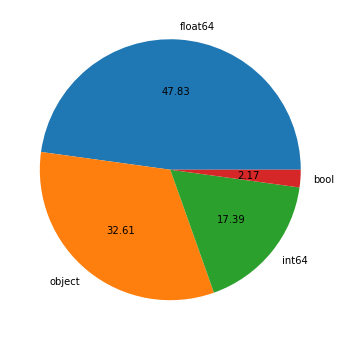

In [14]:
plt.figure(figsize=(6,6))
plt.pie(df.dtypes.value_counts(), autopct="%.2f", labels=df.dtypes.value_counts().index);
save_fig("Proportion initiale des différentes types de donnée dans le jeu")

In [15]:
data.isna().mean().mean()

0.12847723057902327

In [16]:
df.isna().mean().sort_values(ascending=True)

OSEBuildingID                      0.000000
PropertyGFABuilding(s)             0.000000
PropertyGFAParking                 0.000000
PropertyGFATotal                   0.000000
NumberofFloors                     0.000000
YearBuilt                          0.000000
Longitude                          0.000000
Latitude                           0.000000
Neighborhood                       0.000000
DefaultData                        0.000000
CouncilDistrictCode                0.000000
ComplianceStatus                   0.000000
State                              0.000000
City                               0.000000
Address                            0.000000
PropertyName                       0.000000
PrimaryPropertyType                0.000000
BuildingType                       0.000000
DataYear                           0.000000
TaxParcelIdentificationNumber      0.000000
SiteEnergyUse(kBtu)                0.001481
SiteEnergyUseWN(kBtu)              0.001777
SiteEUIWN(kBtu/sf)              

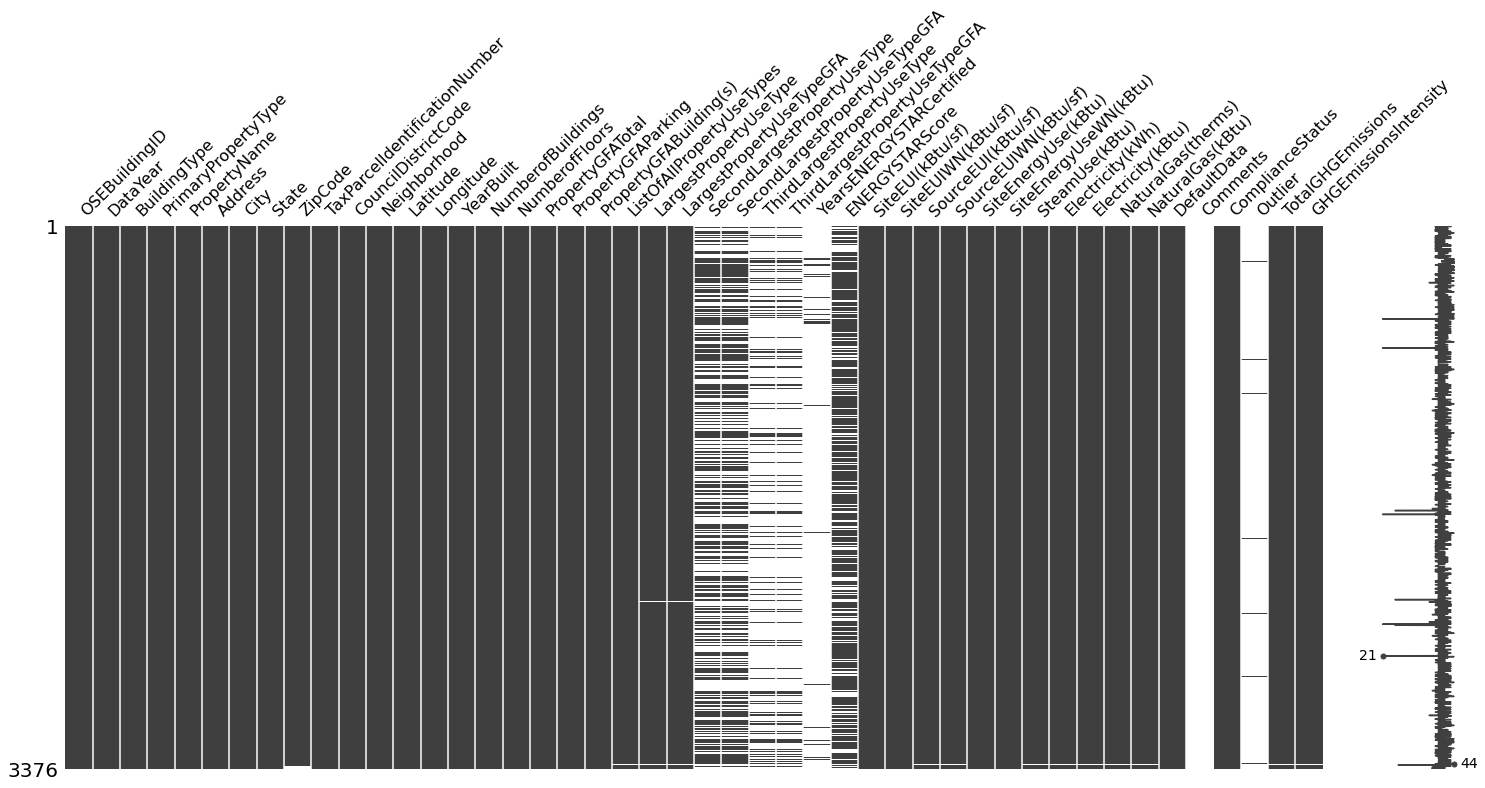

In [17]:
msno.matrix(data)
save_fig("Matrice de remplissage du jeu de données initial")

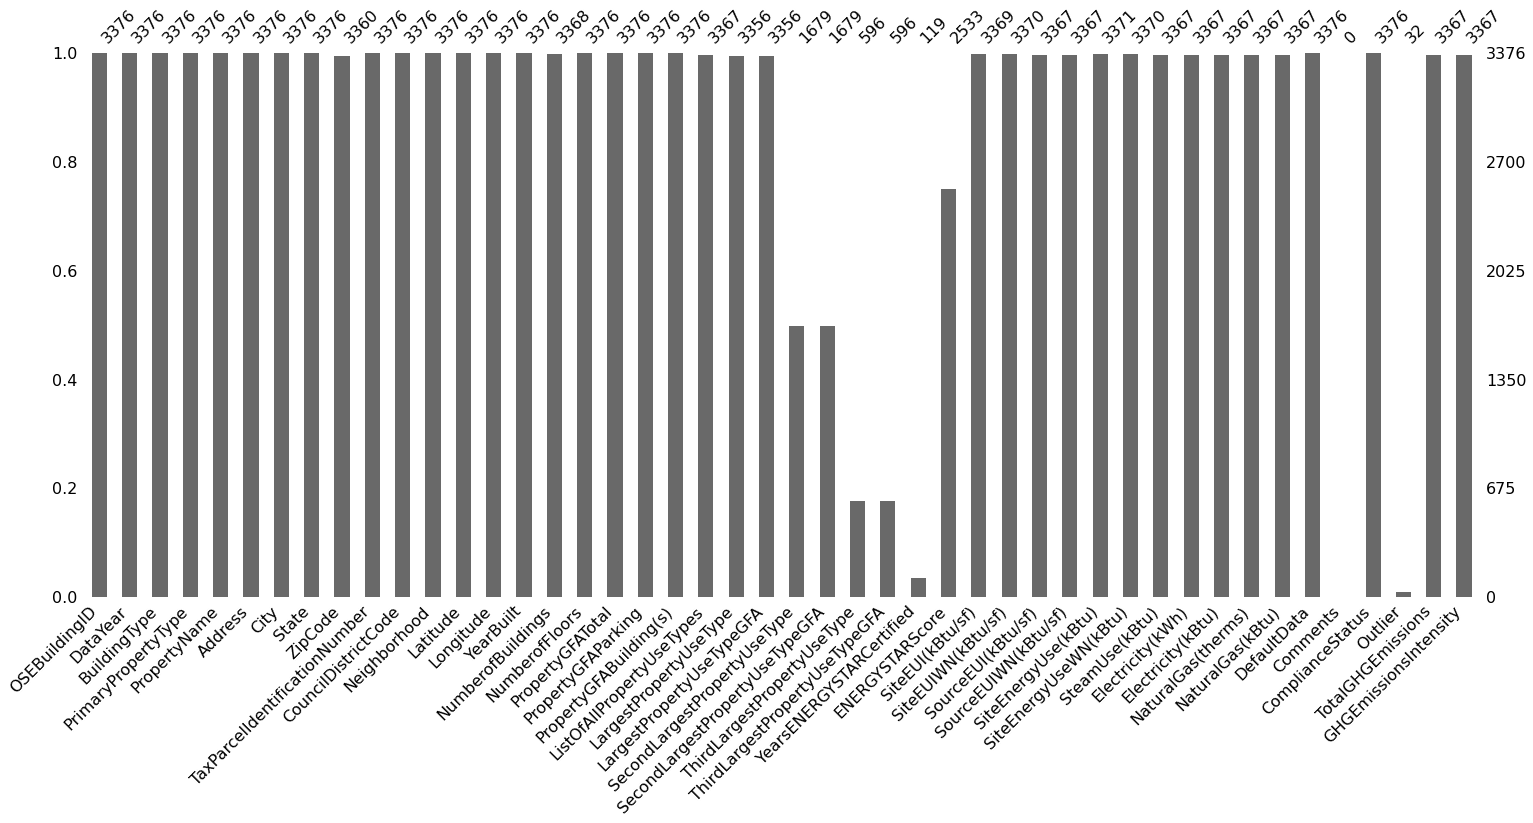

In [18]:
msno.bar(data)
save_fig("Diagramme à barres du remplissage du jeu de données initial")

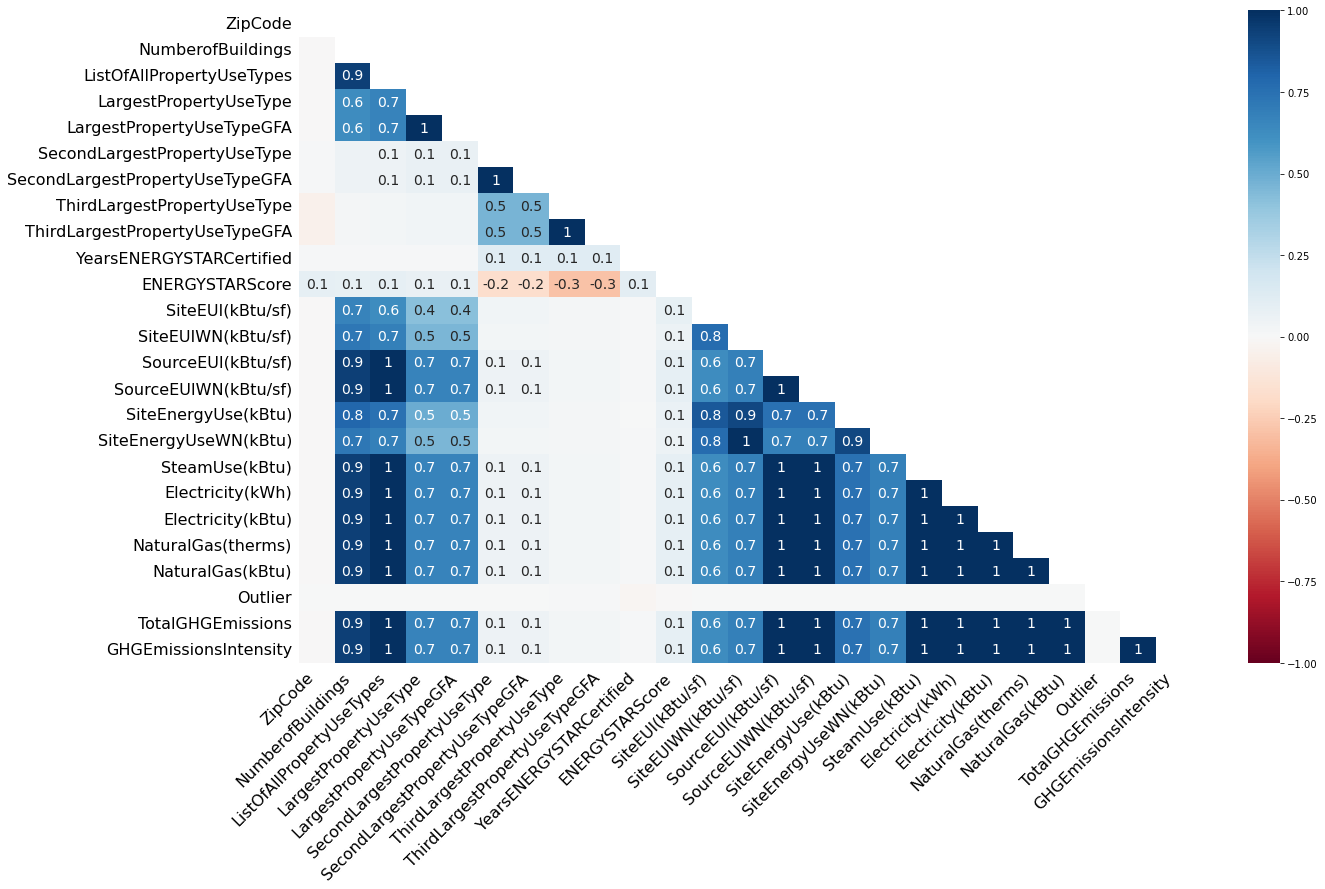

In [19]:
msno.heatmap(data)
save_fig("Diagramme des corrélations de taux de remplissage entre les colonnes du jeu de données initial")

# Tri du jeu de données initial

Avant toute chose, comme le précise l'énoncé de mission, nous allons effectuer un tri pour ne conserver que les bâtiments non résidentiels du jeu de données.

In [20]:
df['BuildingType'].value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [21]:
df = df[~df['BuildingType'].str.contains('family')]

Les bâtiments résidentiels sont également caractérisés par la présence du mot-clé **'family'** dans la liste de leur usage :

In [22]:
df['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    292
Other                          250
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             114
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             3
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [23]:
df['PrimaryPropertyType'].str.contains('family').value_counts()

False    1665
True        3
Name: PrimaryPropertyType, dtype: int64

In [24]:
df = df[~df['PrimaryPropertyType'].fillna('').str.contains('family')]

In [25]:
df['ListOfAllPropertyUseTypes'].str.contains('family').value_counts()

False    1627
True       36
Name: ListOfAllPropertyUseTypes, dtype: int64

In [26]:
df = df[~df['ListOfAllPropertyUseTypes'].fillna('').str.contains('family')]

In [27]:
df['LargestPropertyUseType'].str.contains('family').value_counts()

False    1623
Name: LargestPropertyUseType, dtype: int64

In [28]:
df['SecondLargestPropertyUseType'].str.contains('family').value_counts()

False    817
Name: SecondLargestPropertyUseType, dtype: int64

In [29]:
df['ThirdLargestPropertyUseType'].str.contains('family').value_counts()

False    319
Name: ThirdLargestPropertyUseType, dtype: int64

## Analyse univariée
### Élimination des colonnes inutiles

In [30]:
df = df[df.columns[df.isna().mean() <0.9]]

Nous n'avons pas besoin du numéro d'identification des bâtiments ni des colonne **'DataYear'**, **'City'**, **'State'**  qui sont constantes ni des autres colonnes ci-dessous qui ne sont pas explicative pour notre étude.

**Nous conservons néanmoins la colonne 'PropertyName' qui nous permettra de vérifier les informations d'un bâtiment dont une valeur caractéristique nous intrigue** (3362 valeurs uniques sur 3376 bâtiments, la colonne peut quasiment servir d'identifiant).

In [31]:
columns_to_drop = ['OSEBuildingID', 'DataYear', 'Address', 'City', 'State', 'TaxParcelIdentificationNumber', 'DefaultData']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [32]:
df.shape

(1629, 36)

### Analyse des colonnes cibles

#### SiteEnergyUse(kBtu)

In [33]:
df[conso].describe()

count    1.627000e+03
mean     8.492408e+06
std      3.057572e+07
min      0.000000e+00
25%      1.219804e+06
50%      2.551022e+06
75%      6.888997e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

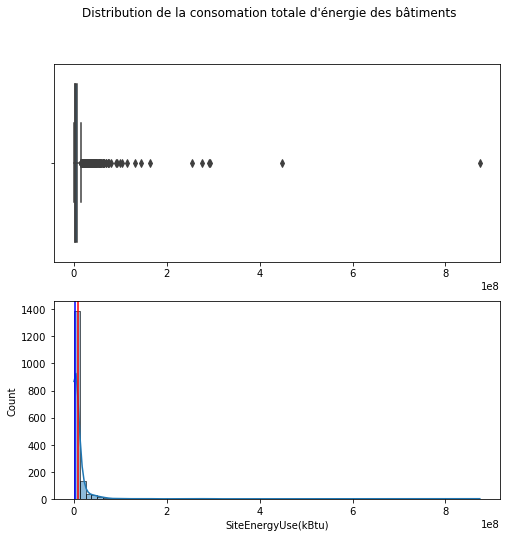

In [34]:
fig = plt.figure(figsize=(8,8))
plt.suptitle("Distribution de la consomation totale d'énergie des bâtiments")
plt.subplot(2,1,1)
ax1 = sns.boxplot(x=df[conso])
ax1.set(xlabel=None)
plt.subplot(2,1,2)
ax2 = sns.histplot(x=df[conso], kde=True, bins=70)
plt.axvline(x=df[conso].mean(), color='r', label='moyenne')
plt.axvline(x=df[conso].median(), color='b', label='médiane')
save_fig("Distribution de la consomation totale d'énergie des bâtiments")

#### TotalGHGEmissions

In [35]:
df[co2].describe()

count     1627.000000
mean       186.807597
std        760.498123
min         -0.800000
25%         20.005000
50%         49.580000
75%        142.865000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

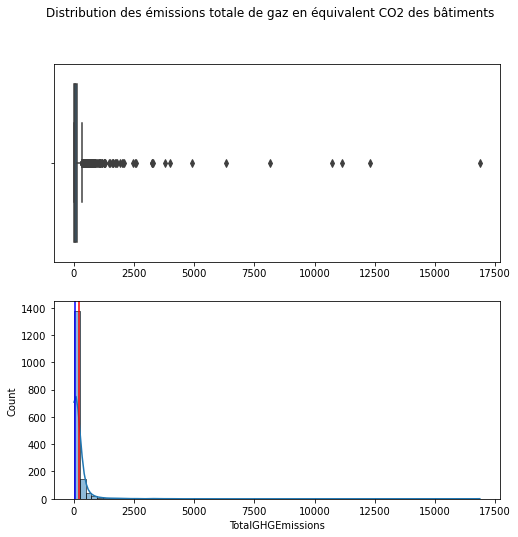

In [36]:
fig = plt.figure(figsize=(8,8))
plt.suptitle("Distribution des émissions totale de gaz en équivalent CO2 des bâtiments")
plt.subplot(2,1,1)
ax1 = sns.boxplot(x=df[co2])
ax1.set(xlabel=None)
plt.subplot(2,1,2)
ax2 = sns.histplot(x=df[co2], kde=True, bins=70)
plt.axvline(x=df[co2].mean(), color='r', label='moyenne')
plt.axvline(x=df[co2].median(), color='b', label='médiane')
save_fig("Distribution des émissions totale de gaz en équivalent CO2 des bâtiments")

### Analyse univariée des variables quantitatives

In [37]:
numerical_features = list(df.describe().columns)

In [38]:
numerical_features.remove(conso)
numerical_features.remove(co2)

numerical_features

['ZipCode',
 'CouncilDistrictCode',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'GHGEmissionsIntensity']

Nous n'allons pas observer les 2 premières colonnes numériques car à ce stade nous n'avons pas de commentaires à faire dessus, elles alimenteront notre modèle de prédiction et nous aideront à interpréter nos résultats ultérieurement.

DISTRIBUTION DES VARIABLES NUMÉRIQUES


--------------------
LATITUDE


moyenne:
 47.62
médiane:
 47.61
mode:
 [47.66]
variance:
 0.0
écart-type:
 0.05
skwewness:
 0.23
kurtosis:
 -0.25
minimum:
 47.5
maximum:
 47.73


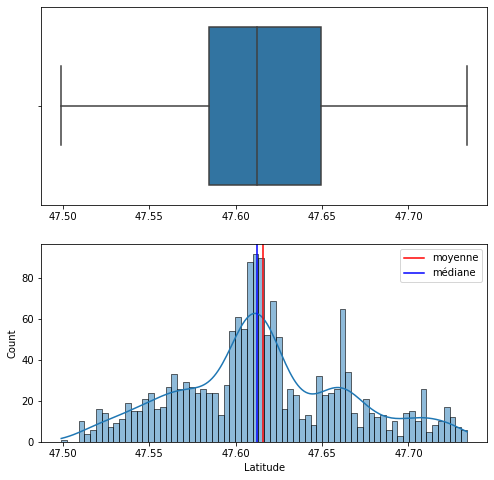

--------------------
LONGITUDE


moyenne:
 -122.33
médiane:
 -122.33
mode:
 [-122.3]
variance:
 0.0
écart-type:
 0.02
skwewness:
 -0.07
kurtosis:
 0.71
minimum:
 -122.41
maximum:
 -122.26


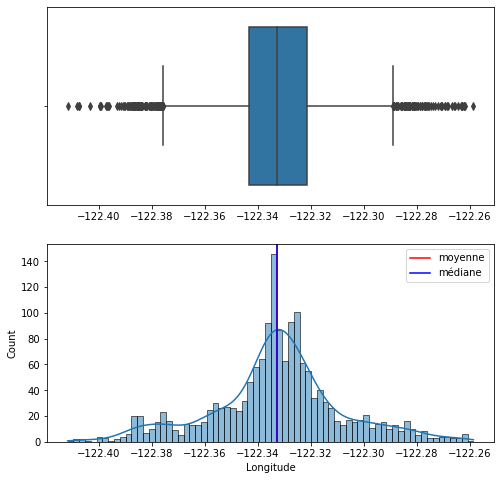

--------------------
YEARBUILT


moyenne:
 1962.04
médiane:
 1965.0
mode:
 [1900]
variance:
 1048.52
écart-type:
 32.38
skwewness:
 -0.3
kurtosis:
 -1.02
minimum:
 1900
maximum:
 2015


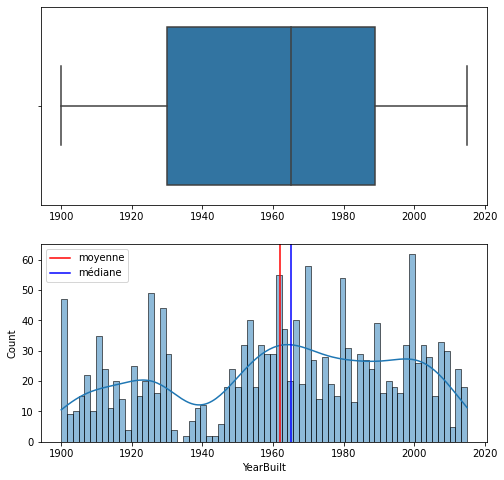

--------------------
NUMBEROFBUILDINGS


moyenne:
 1.17
médiane:
 1.0
mode:
 [1.]
variance:
 8.78
écart-type:
 2.96
skwewness:
 32.17
kurtosis:
 1166.6
minimum:
 0.0
maximum:
 111.0


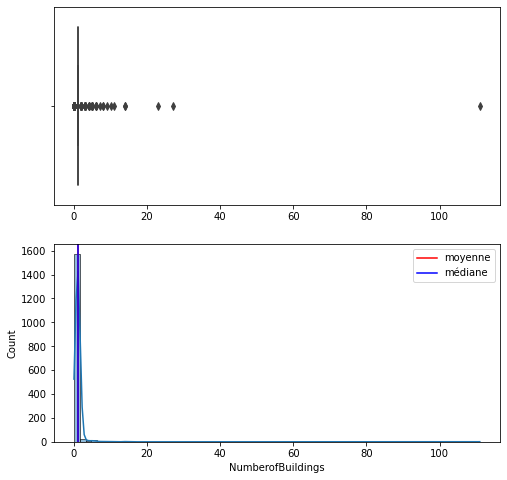

--------------------
NUMBEROFFLOORS


moyenne:
 4.09
médiane:
 2.0
mode:
 [1]
variance:
 43.02
écart-type:
 6.56
skwewness:
 6.11
kurtosis:
 53.79
minimum:
 0
maximum:
 99


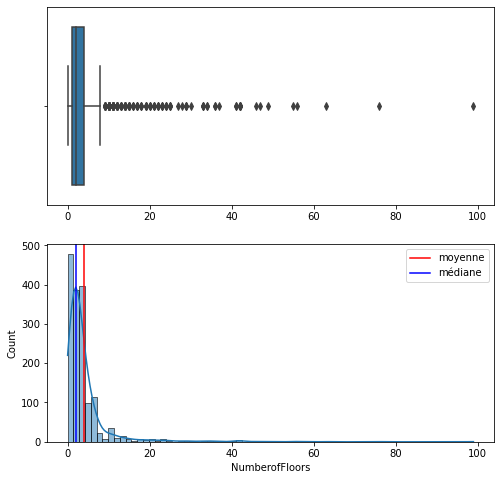

--------------------
PROPERTYGFATOTAL


moyenne:
 118087.17
médiane:
 49243.0
mode:
 [25920 28800 36000]
variance:
 88940647557.84
écart-type:
 298229.19
skwewness:
 19.38
kurtosis:
 561.41
minimum:
 11285
maximum:
 9320156


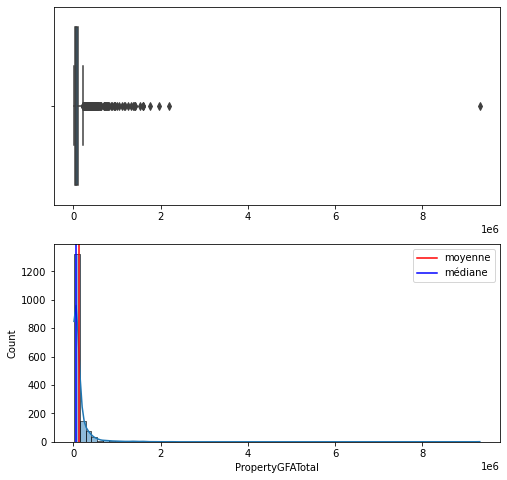

--------------------
PROPERTYGFAPARKING


moyenne:
 12720.07
médiane:
 0.0
mode:
 [0]
variance:
 1780889315.14
écart-type:
 42200.58
skwewness:
 5.3
kurtosis:
 36.4
minimum:
 0
maximum:
 512608


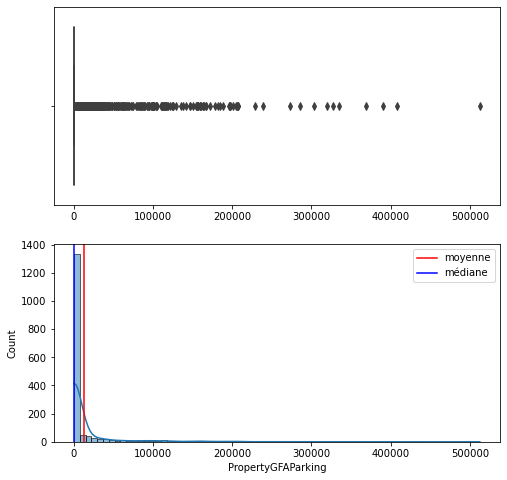

--------------------
PROPERTYGFABUILDING(S)


moyenne:
 105367.1
médiane:
 47215.0
mode:
 [25920 28800 36000]
variance:
 81508224940.41
écart-type:
 285496.45
skwewness:
 21.82
kurtosis:
 670.8
minimum:
 3636
maximum:
 9320156


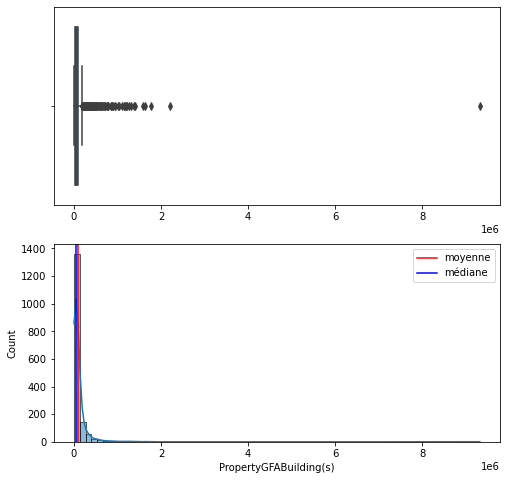

--------------------
LARGESTPROPERTYUSETYPEGFA


moyenne:
 99545.68
médiane:
 44300.0
mode:
 [24000. 30000.]
variance:
 78148068480.39
écart-type:
 279549.76
skwewness:
 23.09
kurtosis:
 732.59
minimum:
 5656.0
maximum:
 9320156.0


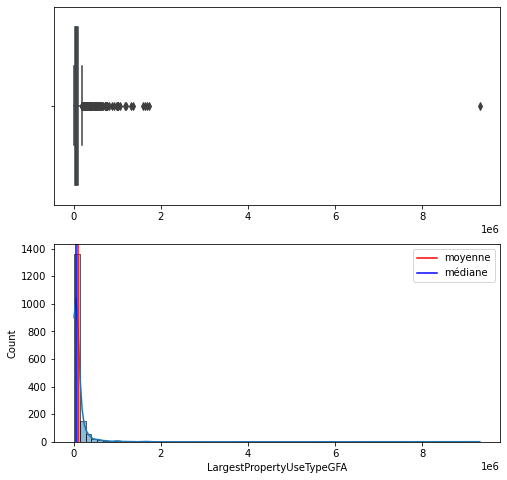

--------------------
SECONDLARGESTPROPERTYUSETYPEGFA


moyenne:
 36361.65
médiane:
 11745.0
mode:
 [0.]
variance:
 4829529609.72
écart-type:
 69494.82
skwewness:
 4.23
kurtosis:
 24.03
minimum:
 0.0
maximum:
 686750.0


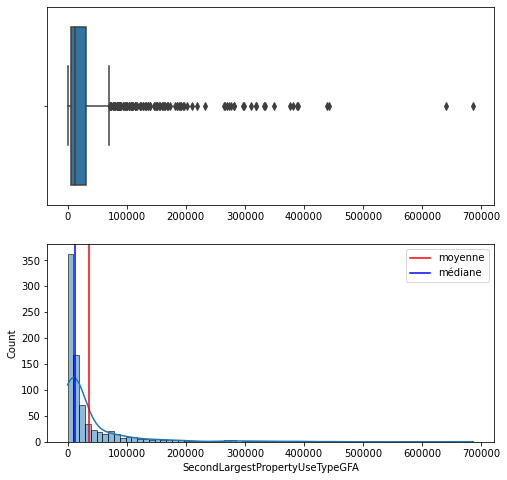

--------------------
THIRDLARGESTPROPERTYUSETYPEGFA


moyenne:
 13865.48
médiane:
 5581.0
mode:
 [0.]
variance:
 1329410496.03
écart-type:
 36461.08
skwewness:
 8.26
kurtosis:
 85.1
minimum:
 0.0
maximum:
 459748.0


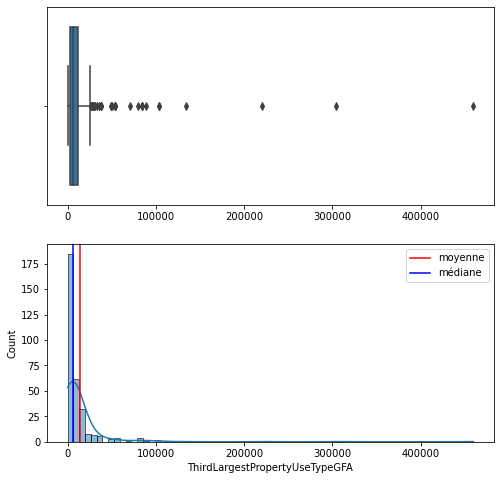

--------------------
ENERGYSTARSCORE


moyenne:
 65.43
médiane:
 73.0
mode:
 [100.]
variance:
 810.87
écart-type:
 28.48
skwewness:
 -0.78
kurtosis:
 -0.5
minimum:
 1.0
maximum:
 100.0


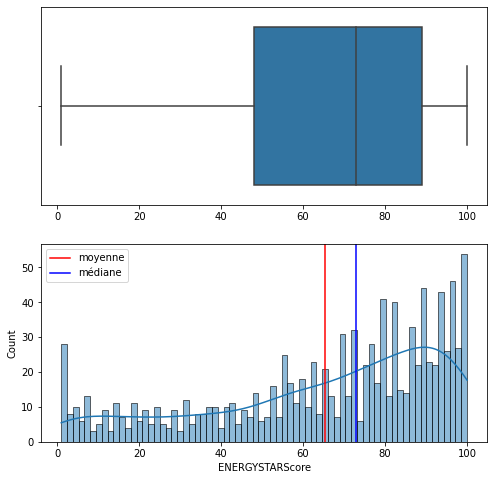

--------------------
SITEEUI(KBTU/SF)


moyenne:
 72.49
médiane:
 51.65
mode:
 [0.]
variance:
 5584.48
écart-type:
 74.73
skwewness:
 3.7
kurtosis:
 21.76
minimum:
 0.0
maximum:
 834.4


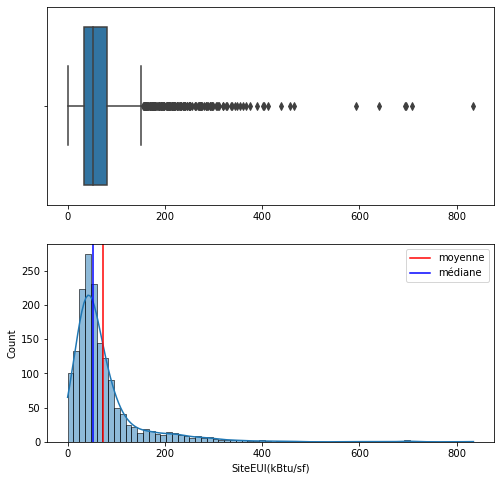

--------------------
SITEEUIWN(KBTU/SF)


moyenne:
 74.9
médiane:
 53.75
mode:
 [0.]
variance:
 5732.43
écart-type:
 75.71
skwewness:
 3.6
kurtosis:
 20.6
minimum:
 0.0
maximum:
 834.4


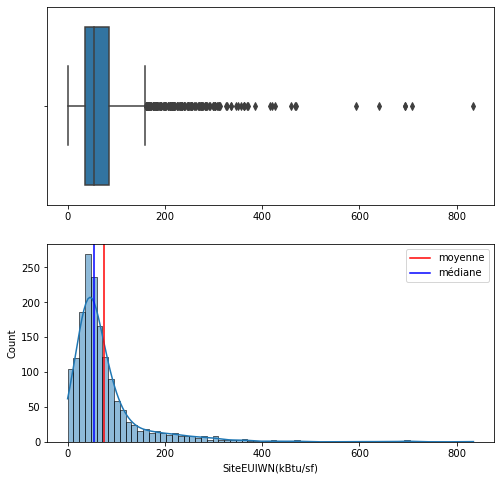

--------------------
SOURCEEUI(KBTU/SF)


moyenne:
 176.66
médiane:
 130.9
mode:
 [0.]
variance:
 35220.63
écart-type:
 187.67
skwewness:
 4.89
kurtosis:
 42.89
minimum:
 0.0
maximum:
 2620.0


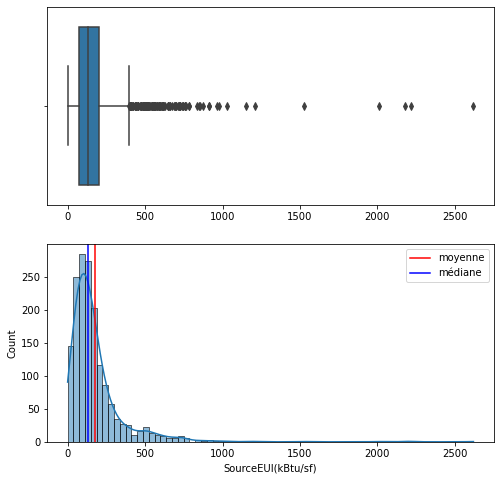

--------------------
SOURCEEUIWN(KBTU/SF)


moyenne:
 178.89
médiane:
 133.8
mode:
 [0.]
variance:
 35214.05
écart-type:
 187.65
skwewness:
 4.87
kurtosis:
 42.68
minimum:
 -2.1
maximum:
 2620.0


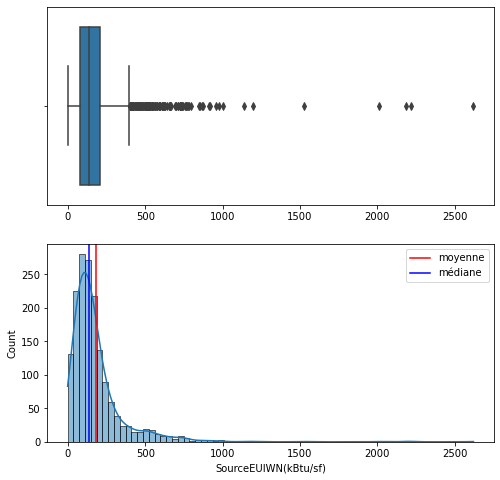

--------------------
SITEENERGYUSEWN(KBTU)


moyenne:
 8105674.28
médiane:
 2679931.75
mode:
 [0.]
variance:
 495284343190421.25
écart-type:
 22254984.68
skwewness:
 11.22
kurtosis:
 175.35
minimum:
 0.0
maximum:
 471613856.0


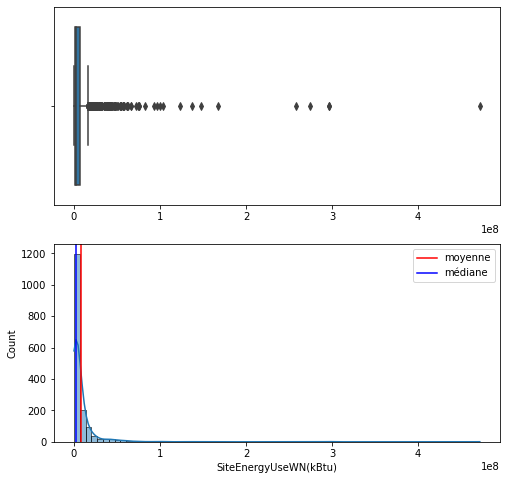

--------------------
STEAMUSE(KBTU)


moyenne:
 524859.18
médiane:
 0.0
mode:
 [0.]
variance:
 31107228120956.38
écart-type:
 5577385.42
skwewness:
 18.91
kurtosis:
 398.59
minimum:
 0.0
maximum:
 134943456.0


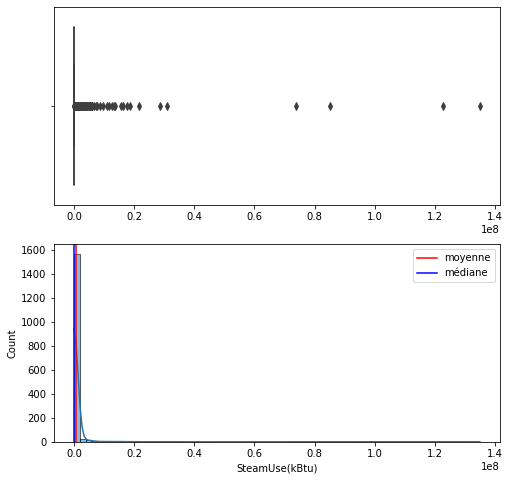

--------------------
ELECTRICITY(KWH)


moyenne:
 1721043.61
médiane:
 472220.19
mode:
 [0.]
variance:
 37927447858611.92
écart-type:
 6158526.44
skwewness:
 20.67
kurtosis:
 588.14
minimum:
 -33826.8
maximum:
 192577488.0


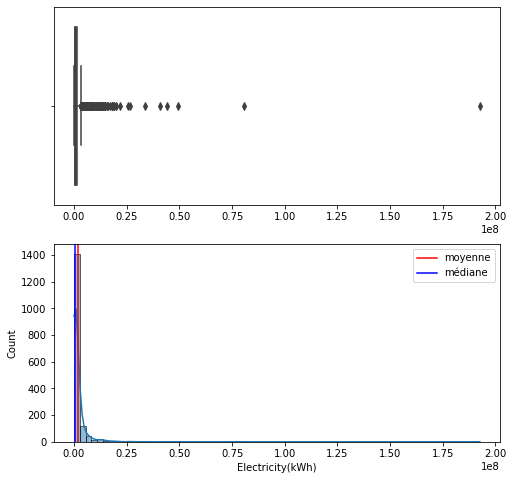

--------------------
ELECTRICITY(KBTU)


moyenne:
 5872200.8
médiane:
 1611215.0
mode:
 [0.]
variance:
 441541638060268.3
écart-type:
 21012892.19
skwewness:
 20.67
kurtosis:
 588.14
minimum:
 -115417.0
maximum:
 657074389.0


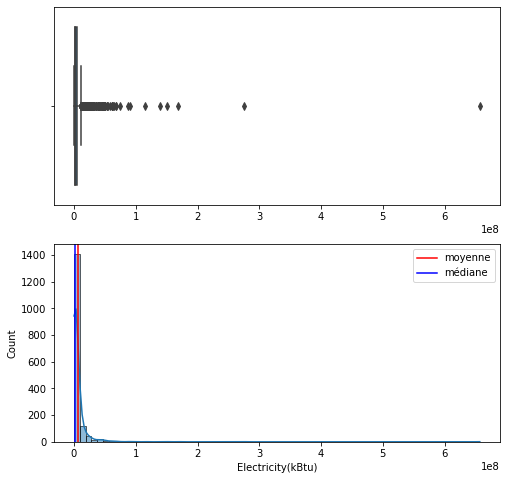

--------------------
NATURALGAS(THERMS)


moyenne:
 19837.57
médiane:
 4963.61
mode:
 [0.]
variance:
 8975233176.23
écart-type:
 94737.71
skwewness:
 21.87
kurtosis:
 618.83
minimum:
 0.0
maximum:
 2979090.0


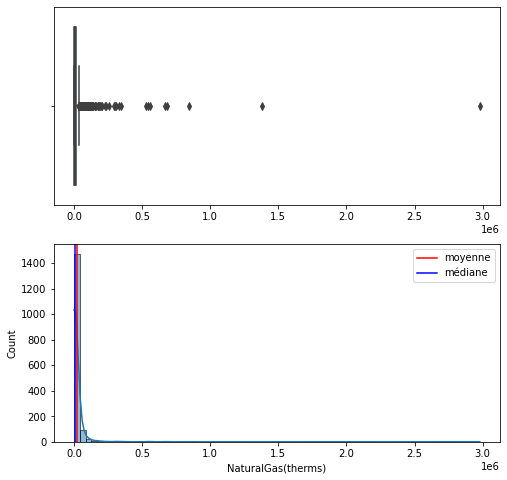

--------------------
NATURALGAS(KBTU)


moyenne:
 1983757.14
médiane:
 496361.0
mode:
 [0.]
variance:
 89752331877661.48
écart-type:
 9473770.73
skwewness:
 21.87
kurtosis:
 618.83
minimum:
 0.0
maximum:
 297909000.0


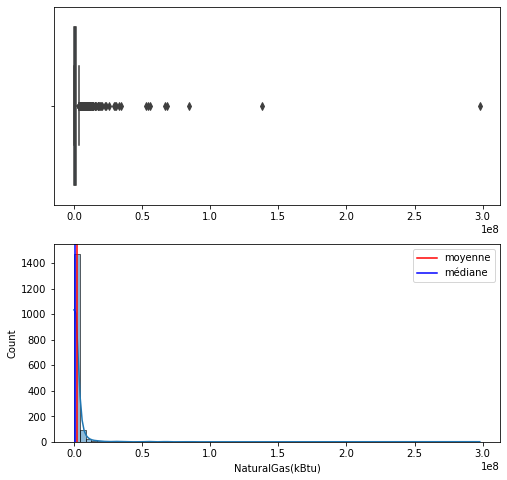

--------------------
GHGEMISSIONSINTENSITY


moyenne:
 1.62
médiane:
 0.88
mode:
 [0.23 0.28]
variance:
 5.56
écart-type:
 2.36
skwewness:
 4.67
kurtosis:
 37.42
minimum:
 -0.02
maximum:
 34.09


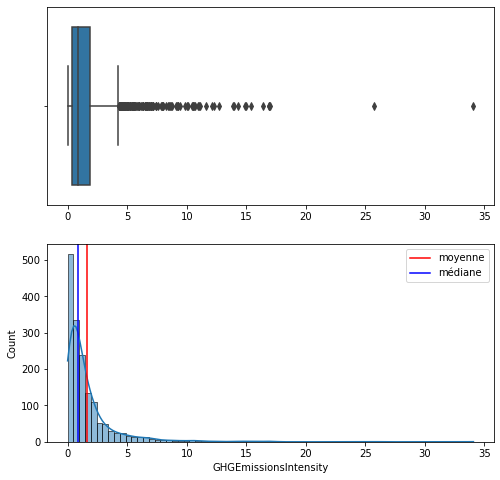

In [39]:
print('DISTRIBUTION DES VARIABLES NUMÉRIQUES')
print('\n')
for col in numerical_features[2:]:
    subset = df[col]
    print("-"*20)
    print(col.upper())
    print('\n')
    print("moyenne:\n",np.round(subset.mean(),2))
    print("médiane:\n",np.round(subset.median(),2))
    print("mode:\n",np.round(subset.mode().values,2))
    print("variance:\n",np.round(subset.var(ddof=0),2))
    print("écart-type:\n",np.round(subset.std(ddof=0),2))
    print("skwewness:\n",np.round(subset.skew(),2))
    print("kurtosis:\n",np.round(subset.kurtosis(),2))
    print("minimum:\n",np.round(subset.min(),2))
    print("maximum:\n",np.round(subset.max(),2))
    fig = plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)
    ax1 = sns.boxplot(x=subset)
    ax1.set(xlabel=None)
    plt.subplot(2,1,2)
    ax2 = sns.histplot(x=df[col], kde=True, bins=70)
    plt.axvline(x=df[col].mean(), color='r', label='moyenne')
    plt.axvline(x=df[col].median(), color='b', label='médiane')
    plt.legend()
    save_fig(f"Distribution de {col.replace('/','')}")
    plt.show()

#### Rapport d'analyse univariée des variables quantitatives

Les bâtiments ont été construits en moyenne en 1968, avec la moitié des bâtiments construits avant ou après 1975, les plus anciens datant de 1900 et les plus récent de 2015.

Les portefeuilles de bâtiments rapportés dans ce jeu contiennent en moyenne 1.11 bâtiments, avec une valeur maximale pour le campus de Seattle de l'université de Washington comptant 111 bâtiments. Cette ligne dans notre jeu de données comptera également la valeur maximale des variables 'PROPERTYGFATOTAL', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)' et la valeur minimale de la variable 'YEARBUILT'.

In [40]:
df[df['NumberofBuildings']>20]

BuildingType PrimaryPropertyType  \
105        Campus          University   
1862       Campus               Other   
3274       Campus          University   

                                   PropertyName  ZipCode  CouncilDistrictCode  \
105                            SSCC MAIN CAMPUS  98106.0                    1   
1862                  FT C15 Fishermen's Center  98119.0                    7   
3274  University of Washington - Seattle Campus  98105.0                    4   

               Neighborhood  Latitude  Longitude  YearBuilt  \
105                DELRIDGE  47.54700 -122.35307       1970   
1862  MAGNOLIA / QUEEN ANNE  47.65561 -122.38063       1955   
3274              NORTHEAST  47.65644 -122.31041       1900   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
105                27.0               2            441071                   0   
1862               23.0               1            260241                   0   
3274              111.0               0           9320156                   0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
105                   441071        College/University     College/University   
1862                  260241                     Other                  Other   
3274                 9320156        College/University     College/University   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
105                    483000.0                          NaN   
1862                   260241.0                          NaN   
3274                  9320156.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
105                               NaN                         NaN   
1862                              NaN                         NaN   
3274                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
105                              NaN              NaN         79.300003   
1862                             NaN              NaN        130.699997   
3274                             NaN              NaN         93.800003   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
105            85.199997          192.800003            202.600006   
1862          138.500000          353.200012            374.500000   
3274            0.000000          246.600006              0.000000   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
105            38301744.0             41151732.0             0.0   
1862           34012980.0             36034584.0             0.0   
3274          873923712.0                    0.0      84985240.0   

      Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
105          7419277.5         25314575.0        129871.66410   
1862         7882361.0         26894616.0         71183.61719   
3274       192577488.0        657074389.0             0.00000   

      NaturalGas(kBtu) ComplianceStatus  TotalGHGEmissions  \
105         12987166.0        Compliant             866.23   
1862         7118362.0        Compliant             565.55   
3274               0.0        Compliant           11140.56   

      GHGEmissionsIntensity  
105                    1.96  
1862                   2.17  
3274                   1.20

In [41]:
df[df['NumberofBuildings']==df['NumberofBuildings'].max()]

BuildingType PrimaryPropertyType  \
3274       Campus          University   

                                   PropertyName  ZipCode  CouncilDistrictCode  \
3274  University of Washington - Seattle Campus  98105.0                    4   

     Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
3274    NORTHEAST  47.65644 -122.31041       1900              111.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
3274               0           9320156                   0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
3274                 9320156        College/University     College/University   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
3274                  9320156.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
3274                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
3274                             NaN              NaN         93.800003   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
3274                 0.0          246.600006                   0.0   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
3274          873923712.0                    0.0      84985240.0   

      Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
3274       192577488.0        657074389.0                 0.0   

      NaturalGas(kBtu) ComplianceStatus  TotalGHGEmissions  \
3274               0.0        Compliant           11140.56   

      GHGEmissionsIntensity  
3274                    1.2

Bien qu'il éveille notre curiosité de par ses valeurs extrêmes, nous choisissons de supprimer le campus de notre jeu de données car il s'agit d'un cas hors-norme qui nous desservira dans l'entraînement de nos modèles plus tard.

In [42]:
df.drop(index=3274, inplace=True)

Ces bâtiments possèdent en moyenne 4.7 floors, soit 3.7 étages en élévation (système américain de comptage) avec une valeur maximale de 99 qui doit être une valeur aberrante car elle concerne une église, et la valeur de "PropertyGFATotal" est faible comparée aux bâtiments qui ont un nombre presque aussi élevé d'étage.

In [43]:
df[df['NumberofFloors']==0]

BuildingType          PrimaryPropertyType  \
166       NonResidential                        Hotel   
487       NonResidential               Medical Office   
564       NonResidential                        Other   
1754      NonResidential               Medical Office   
1993              Campus                        Other   
3130      NonResidential                    Warehouse   
3131      NonResidential               Medical Office   
3132      NonResidential  Small- and Mid-Sized Office   
3168  Nonresidential COS                        Other   
3273      NonResidential                        Other   
3276      NonResidential               Residence Hall   
3278      NonResidential               Residence Hall   
3279      NonResidential               Residence Hall   
3280      NonResidential               Residence Hall   

                                           PropertyName  ZipCode  \
166                                 Grand Hyatt Seattle  98101.0   
487                                     Arnold Pavilion  98104.0   
564                                       Pacific Place  98101.0   
1754                                HART First Hill LLC  98104.0   
1993  (ID#24086)Campus1:KC Metro Transit Atlantic Ce...  98134.0   
3130                                       Sandpoint #5  98115.0   
3131                                      Sandpoint #25  98115.0   
3132                                      Sandpoint #29  98115.0   
3168                                           Magnuson  98115.0   
3273             Smilow Rainier Vista Boys & Girls Club  98108.0   
3276                                         Cedar Hall  98105.0   
3278                                        Lander Hall  98195.0   
3279                                        Mercer Hall  98195.0   
3280                                        Poplar Hall  98195.0   

      CouncilDistrictCode      Neighborhood  Latitude  Longitude  YearBuilt  \
166                     7          DOWNTOWN  47.61275 -122.33330       1999   
487                     3              EAST  47.60979 -122.32298       2004   
564                     7          DOWNTOWN  47.61289 -122.33531       1999   
1754                    3              EAST  47.60862 -122.32372       1945   
1993                    2  GREATER DUWAMISH  47.59042 -122.32498       1991   
3130                    4         NORTHEAST  47.68454 -122.26235       1940   
3131                    4         NORTHEAST  47.68240 -122.26223       1960   
3132                    4         NORTHEAST  47.68254 -122.26299       1960   
3168                    4         NORTHEAST  47.68212 -122.26330       1929   
3273                    2         SOUTHEAST  47.56260 -122.29396       2009   
3276                    4         NORTHEAST  47.65718 -122.31632       2011   
3278                    4         NORTHEAST  47.65577 -122.31530       1953   
3279                    4         NORTHEAST  47.65447 -122.31733       1970   
3280                    4         NORTHEAST  47.65176 -122.30756       2011   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
166                 1.0               0            934292                   0   
487                 1.0               0            225982                   0   
564                 1.0               0            947987                   0   
1754                1.0               0            274568                   0   
1993               10.0               0            230971                   0   
3130                1.0               0            384772                   0   
3131                1.0               0             30287                   0   
3132                1.0               0             21931                   0   
3168                8.0               0            502030                   0   
3273                1.0               0             40265                   0   
3276                1.0               0            176225 

In [44]:
df[df['NumberofFloors']>60]

BuildingType PrimaryPropertyType                    PropertyName  \
233   Nonresidential COS        Large Office  Seattle Municipal Tower (2030)   
559       NonResidential        Large Office          Columbia Center - 2015   
1359      NonResidential    Worship Facility  Seattle Chinese Baptist Church   

      ZipCode  CouncilDistrictCode      Neighborhood  Latitude  Longitude  \
233   98104.0                    3          DOWNTOWN  47.60501 -122.32988   
559   98104.0                    7          DOWNTOWN  47.60454 -122.33072   
1359  98108.0                    2  GREATER DUWAMISH  47.55072 -122.30265   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
233        1990                1.0              63           1354987   
559        1985                1.0              76           1952220   
1359       1977                1.0              99             21948   

      PropertyGFAParking  PropertyGFABuilding(s) ListOfAllPropertyUseTypes  \
233               159600                 1195387           Office, Parking   
559               319400                 1632820           Office, Parking   
1359                   0                   21948          Worship Facility   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
233                  Office                  1191115.0   
559                  Office                  1680937.0   
1359       Worship Facility                    21948.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
233                       Parking                         159599.0   
559                       Parking                         319368.0   
1359                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
233                        Other                         18656.0   
559                          NaN                             NaN   
1359                         NaN                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
233              89.0         50.400002           50.400002   
559              86.0         55.299999           55.099998   
1359             80.0         14.900000           14.900000   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
233           158.100006            158.100006         6.157618e+07   
559           167.300003            166.500000         9.293764e+07   
1359           46.599998             46.599998         3.260012e+05   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
233            6.157618e+07             0.0        18046946.0   
559            9.253726e+07             0.0        25747908.0   
1359           3.260012e+05             0.0           95545.5   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  \
233          61576180.0             0.00000               0.0   
559          87851862.0         50857.63281         5085763.0   
1359           326001.0             0.00000               0.0   

     ComplianceStatus  TotalGHGEmissions  GHGEmissionsIntensity  
233         Compliant             429.27                   0.32  
559         Compliant             882.56                   0.45  
1359        Compliant               2.27                   0.10

Après une courte recherche Internet, il s'avère que l'église possède 1 étage (2 floors).

Source : https://npgallery.nps.gov/NRHP/GetAsset/NRHP/86002094_text

In [45]:
df.iloc[1359, df.columns.get_loc('NumberofFloors')]=2

Les portefeuilles de bâtiments ont 'PropertyGFAParking' de <b>12 720</b> pieds carrés en moyenne, avec une médiane à 0 (<b>1309</b> bâtiments, soit <b>80%</b> ne possèdent pas de parking). La moyenne est ainsi tirée vers le haut par la présence de parking de bâtiment de types grands bureaux, de loisirs et autres.

In [46]:
df[df['PropertyGFAParking']==0].shape[0], df[df['PropertyGFAParking']==0].shape[0]/df.shape[0]

(1309, 0.8040540540540541)

In [47]:
df[df['PropertyGFAParking']>300000]

BuildingType PrimaryPropertyType                       PropertyName  \
77   NonResidential        Large Office  Bill and Melinda Gates Foundation   
155  NonResidential               Other                        CenturyLink   
163  NonResidential               Other                         Building 1   
229  NonResidential        Large Office                       Safeco Plaza   
273  NonResidential        Large Office                     US Bank Centre   
292  NonResidential        Large Office                   Two Union Square   
307  NonResidential      Medical Office                 1101 Madison Tower   
559  NonResidential        Large Office             Columbia Center - 2015   

     ZipCode  CouncilDistrictCode           Neighborhood  Latitude  Longitude  \
77   98109.0                    7  MAGNOLIA / QUEEN ANNE  47.62419 -122.34443   
155  98134.0                    2       GREATER DUWAMISH  47.59544 -122.33159   
163  98125.0                    5                  NORTH  47.70281 -122.32532   
229  98154.0                    7               DOWNTOWN  47.60615 -122.33388   
273  98101.0                    7               DOWNTOWN  47.61054 -122.33466   
292  98101.0                    7               DOWNTOWN  47.61043 -122.33206   
307  98104.0                    3                   EAST  47.60921 -122.32425   
559  98104.0                    7               DOWNTOWN  47.60454 -122.33072   

     YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
77        2010                1.0               6            920598   
155       1999                1.0               6           1585960   
163       2008                1.0               6            419848   
229       1969                1.0              49           1123435   
273       1989                1.0              46           1536606   
292       1989                1.0              56           1605578   
307       1992                1.0              14            690158   
559       1985                1.0              76           1952220   

     PropertyGFAParking  PropertyGFABuilding(s)  \
77               303707                  616891   
155              327680                 1258280   
163              335109                   84739   
229              368980                  754455   
273              512608                 1023998   
292              389860                 1215718   
307              407795                  282363   
559              319400                 1632820   

                             ListOfAllPropertyUseTypes  \
77                              Office, Other, Parking   
155     Other - Entertainment/Public Assembly, Parking   
163  Fast Food Restaurant, Medical Office, Movie Th...   
229  Financial Office, Food Sales, Office, Other, P...   
273  Financial Office, Office, Other, Parking, Rest...   
292                             Office, Other, Parking   
307                            Medical Office, Parking   
559                                    Office, Parking   

                    LargestPropertyUseType  LargestPropertyUseTypeGFA  \
77                                  Office                   729584.0   
155  Other - Entertainment/Public Assembly                  1585960.0   
163                                Parking                   335109.0   
229                                 Office                   808980.0   
273                                 Office                  1002403.0   
292                                 Office                  1314475.0   
307                         Medical Office                   270384.0   
559                                 Office                  1680937.0   

    SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
77                       Parking                         185014.0   
155                      Parking                              0.0   
163                Movie Theater                          65000.0   
229              

Les portefeuilles de bâtiments ont une 'LARGESTPROPERTYUSETYPEGFA' de **99 545** pieds carrés en moyenne et leur médiane vaut **44 300** pieds carrés. 

<u>Il sera intéressant d'étudier le rapport 'LARGESTPROPERTYUSETYPEGFA'/'PropertyGFATotal' par la suite pour chercher à comprendre si un bâtiment est plus ou moins énergivore en fonction de la surface qu'il consacre à l'activité principale qu'il renferme (et pour lequel il est censé être optimisé)</u>.

Pour la suite de l'analyse nous allons nous séparer des variables énergétiques dont l'unité ne s'exprime pas en kBtu ou kbBtu/sf car elles portent la même information que leur colonne en kBtu ou kBtu/sf conjointe.

In [48]:
for col in df.columns:
    if col.__contains__('kWh') or col.__contains__('therms'):
        df.drop(columns=col, inplace=True)

In [49]:
numerical_features = list(df.describe().columns)
numerical_features.remove(conso)
numerical_features.remove(co2)

### Analyse univariée des variables qualitatives

In [50]:
categorical_features = list(df.select_dtypes('object').columns)
categorical_features.remove('PropertyName')

In [51]:
for col in categorical_features:
    print(f"{col :-<40}{df[col].nunique()} catégories uniques dans cette colonne\n{df[col].value_counts()}\n")

BuildingType----------------------------5 catégories uniques dans cette colonne
NonResidential        1423
SPS-District K-12       98
Nonresidential COS      85
Campus                  21
Nonresidential WA        1
Name: BuildingType, dtype: int64

PrimaryPropertyType---------------------21 catégories uniques dans cette colonne
Small- and Mid-Sized Office    284
Other                          249
Warehouse                      187
Large Office                   170
K-12 School                    139
Retail Store                    91
Mixed Use Property              90
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      23
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Labor

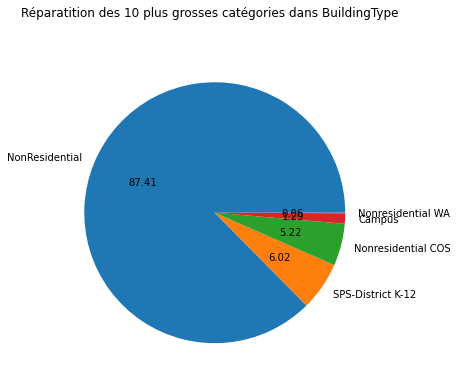

Les 10 plus grosses catégories dans BuildingType représentent 100.0% du total


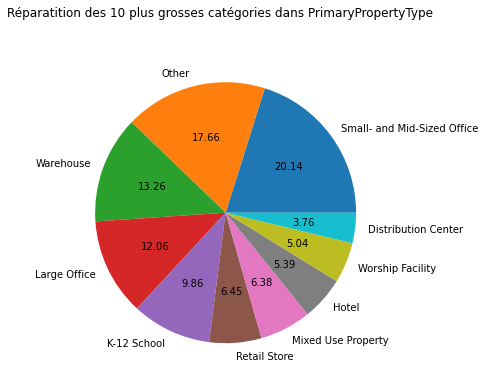

Les 10 plus grosses catégories dans PrimaryPropertyType représentent 87.0% du total


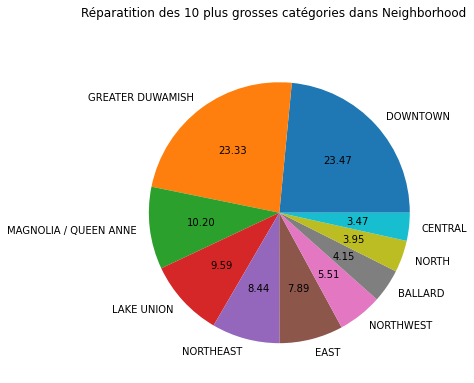

Les 10 plus grosses catégories dans Neighborhood représentent 90.0% du total


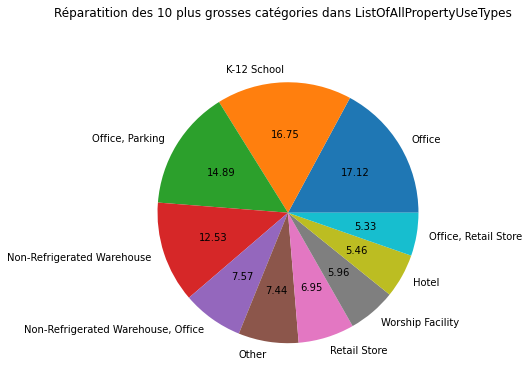

Les 10 plus grosses catégories dans ListOfAllPropertyUseTypes représentent 50.0% du total


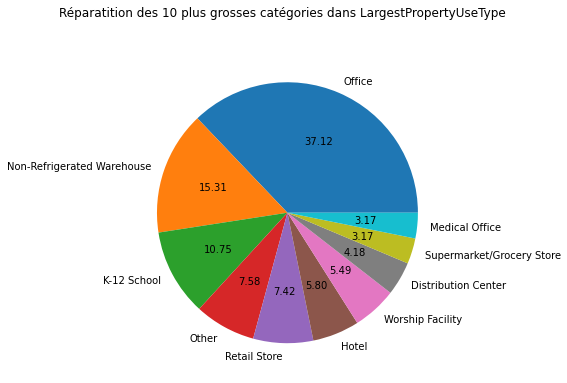

Les 10 plus grosses catégories dans LargestPropertyUseType représentent 80.0% du total


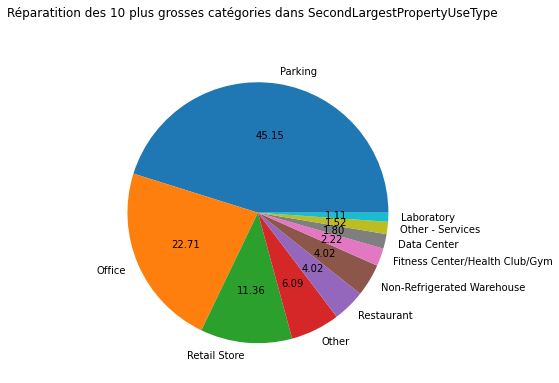

Les 10 plus grosses catégories dans SecondLargestPropertyUseType représentent 88.0% du total


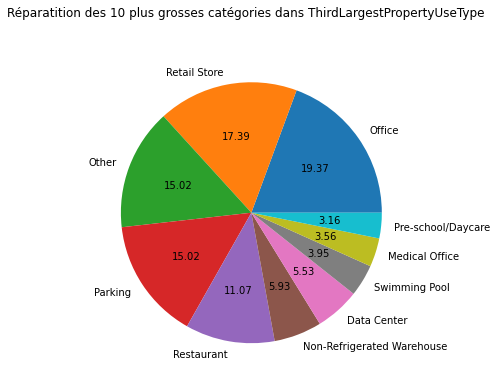

Les 10 plus grosses catégories dans ThirdLargestPropertyUseType représentent 79.0% du total


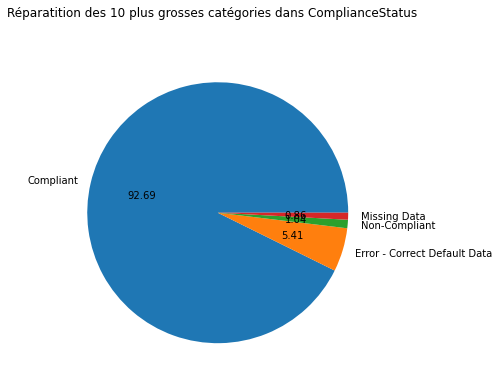

Les 10 plus grosses catégories dans ComplianceStatus représentent 100.0% du total


In [52]:
for col in categorical_features:
    plt.figure(figsize=(6,6))
    plt.suptitle(f"Réparatition des 10 plus grosses catégories dans {col}")
    plt.pie(df[col].value_counts()[:10], labels=df[col].value_counts()[:10].index, autopct='%.2f')
    save_fig(f"Réparatition des 10 plus grosses catégories dans {col}")
    plt.show()
    print(f"Les 10 plus grosses catégories dans {col} représentent {100*np.round(df[col].value_counts(normalize=True)[:10].values.sum(),2)}% du total")

#### Rapport d'analyse univariée des variables qualitatives

<u><i>BuildingType</i></u>

Après avoir fait le tri entre bâtiments résidentiels et non-résidentiels, cette colonne n'a plus vraiment d'intérêt car nous pouvons retrouver une information plus granulaire dans d'autres variables catégorielles. Nous décidons de la supprimer.

In [53]:
df.drop(columns='BuildingType', inplace=True)
categorical_features.remove('BuildingType')

<u><i>PrimaryPropertyType</i></u>

Cette colonne est déjà plus intéressante et nous renseigne sur l'usage auquel plus de 50% de l'espace des bâtiments est consacré.

In [54]:
df["PrimaryPropertyType"].replace("Small- and Mid-Sized Office", "Small and Mid-Sized Office", inplace=True)
df["PrimaryPropertyType"].replace("Supermarket / Grocery Store", "Supermarket and Grocery Store", inplace=True)

<u><i>Neighborhood</i></u>

Nous pouvons distinguer 2 quartiers principaux en termes de nombre de bâtiments, dans l'ordre décroissant : DOWNTOWN et GREATER DUWAMISH.

In [55]:
df["Neighborhood"].value_counts()

DOWNTOWN                  345
GREATER DUWAMISH          343
MAGNOLIA / QUEEN ANNE     150
LAKE UNION                141
NORTHEAST                 124
EAST                      116
NORTHWEST                  81
BALLARD                    61
NORTH                      58
CENTRAL                    51
SOUTHEAST                  46
DELRIDGE                   42
SOUTHWEST                  41
North                       9
Ballard                     6
Northwest                   5
Central                     4
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

In [56]:
df["Neighborhood"].replace("Ballard", "BALLARD", inplace=True)
df["Neighborhood"].replace("Central", "CENTRAL", inplace=True)
df["Neighborhood"].replace("North", "NORTH", inplace=True)
df["Neighborhood"].replace("Delridge", "DELRIDGE", inplace=True)
df["Neighborhood"].replace("DELRIDGE NEIGHBORHOODS", "DELRIDGE", inplace=True)
df["Neighborhood"].replace("Northwest", "NORTHWEST", inplace=True)

In [57]:
df["Neighborhood"].nunique()

13

<u><i>ListOfAllPropertyUseTypes</i></u>

Nous remarquons qu'un usage, jusque là passer sous les radars, semble représenter une part importante : celui de Parking.
Nous conservons cette colonne pour le moment car elle nous servira peut-être pour comparer/compléter les informations dans les autres variables descriptives des usages des bâtiments.

<u><i>LargestPropertyUseType</i></u>

Sans surprise, le type d'usage représentant la plus grande part des surfaces des bâtiments est celui de bureau.
Viennent ensuite les entrepôts de stockage non-réfrigéré ainsi que les ensembles scolaires jusqu'au secondaire.

<u><i>SecondLargestPropertyUseType</i></u>

Notre observation plus haut se trouve confirmé, le type d'usage 'Parking' est le second usage représentant le plus de surface dans les bâtiments. 
Viennent ensuite les bureaux et les magasins.

<u><i>ThirdLargestPropertyUseType</i></u>

Le troisième plus gros usage des surfaces des bâtiments le plus fréquent est celui de bureaux.
Viennent ensuite les magasins et les parkings.

<u><i>ComplianceStatus</i></u>

La très grande majorité (92.69%) des bâtiments sont en conformité vis-à-vis des exigences de l'analyse comparative énergétique pour l'année de déclaration (2016).
Nous décidons de supprimer cette colonne car elle ne nous apporte pas d'information utile.

In [58]:
df.drop(columns='ComplianceStatus', inplace=True)
categorical_features.remove('ComplianceStatus')

## Analyse bivariée variables/cibles

### Analyse bivariée des variables quantitatives

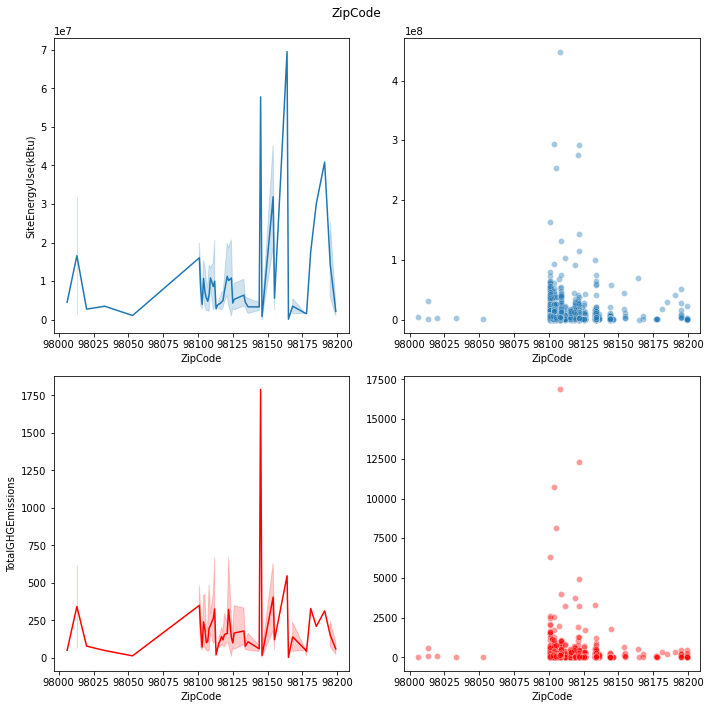

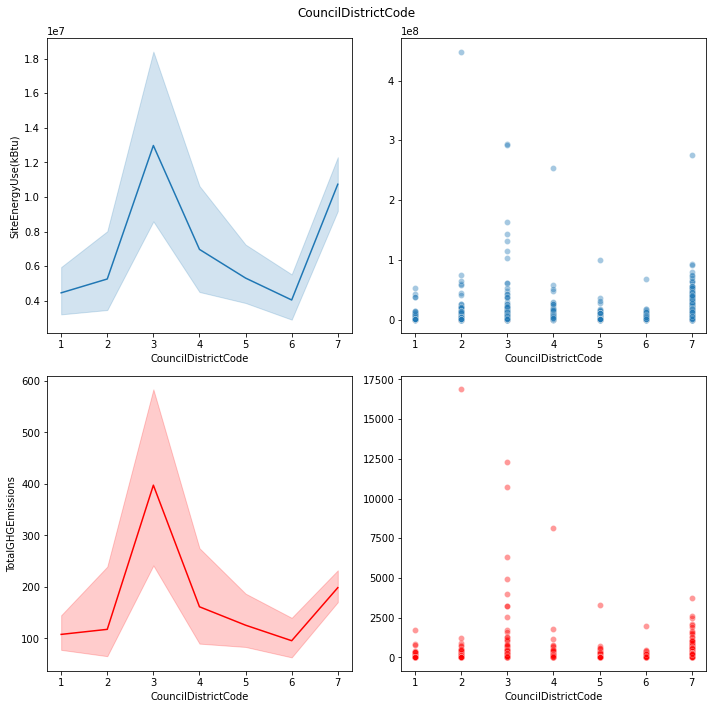

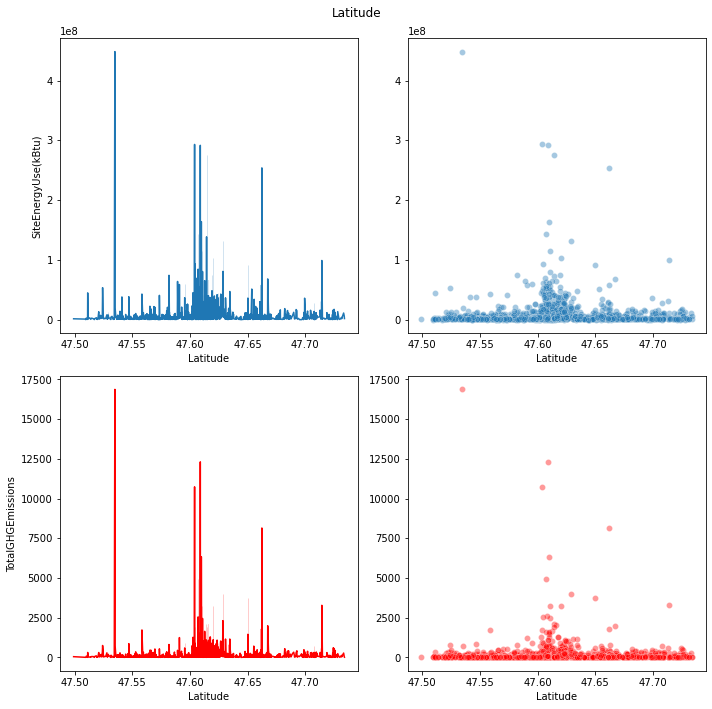

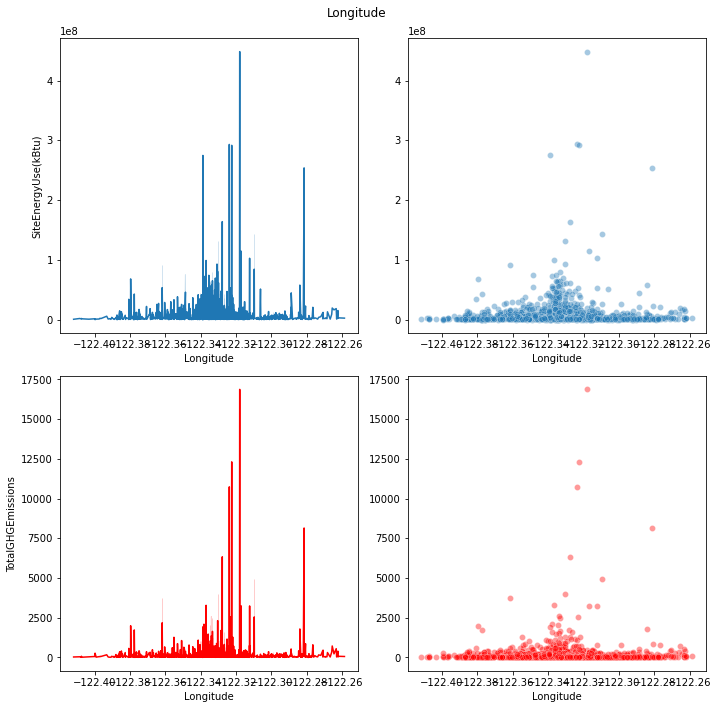

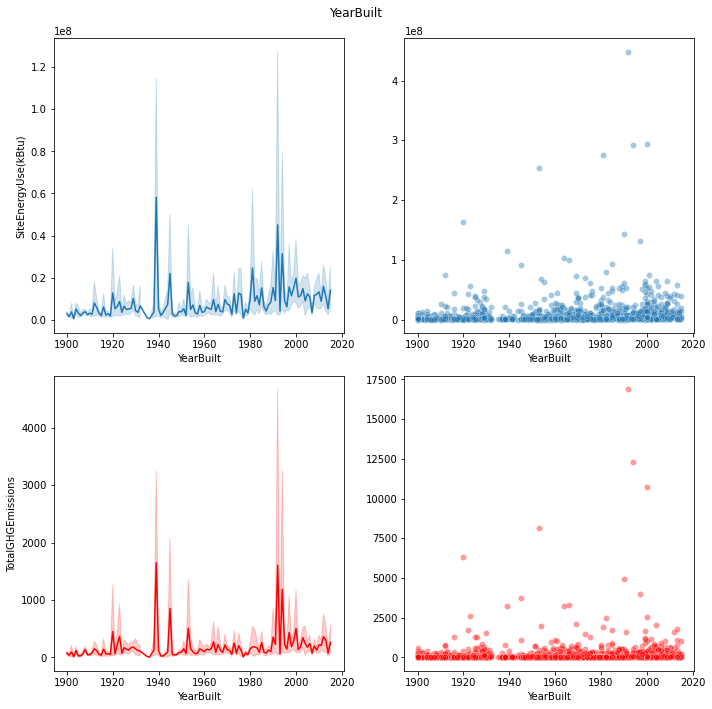

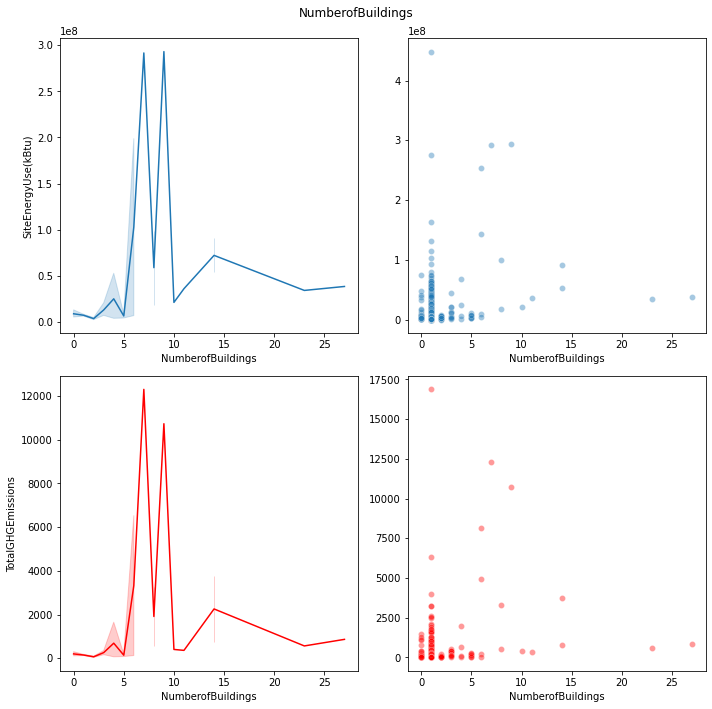

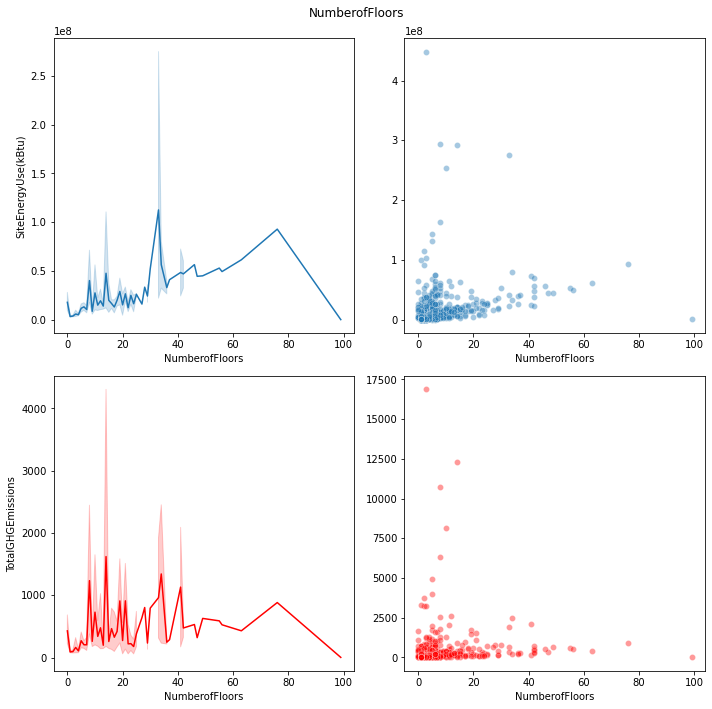

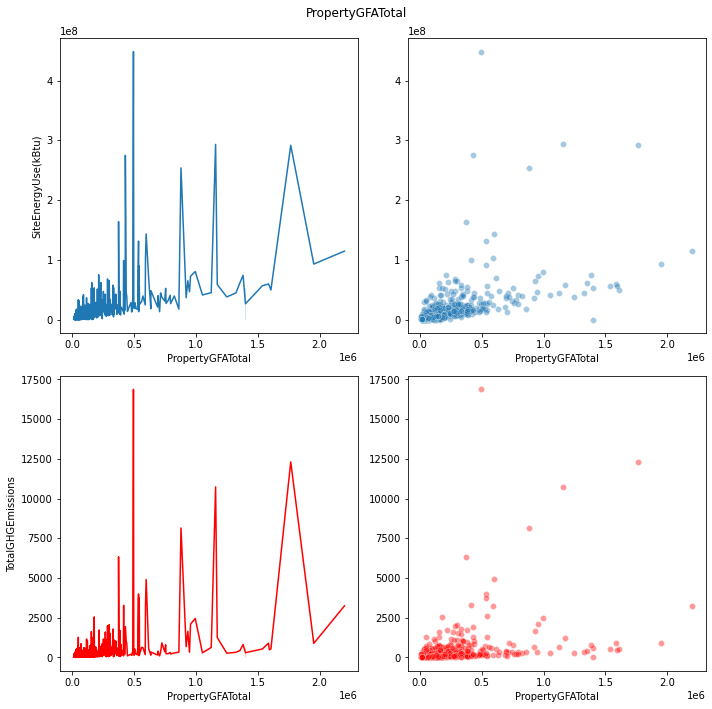

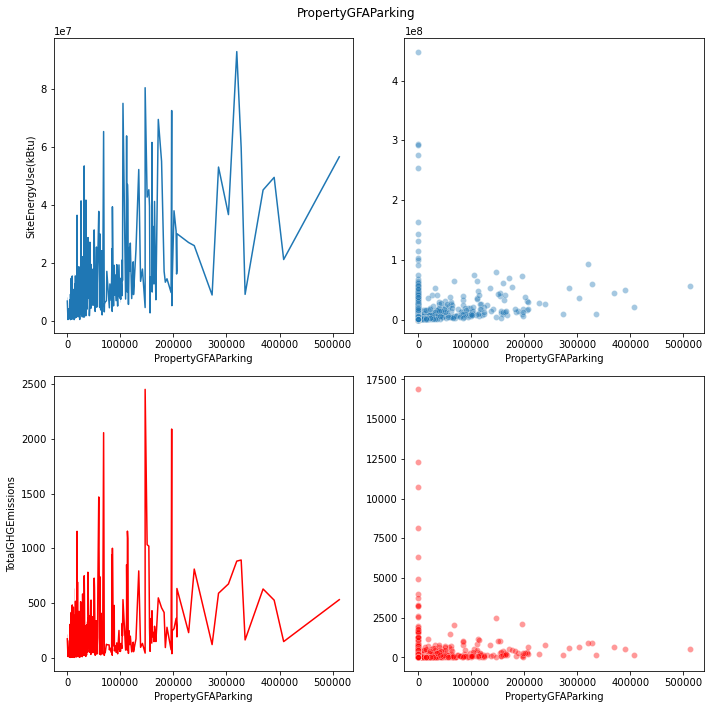

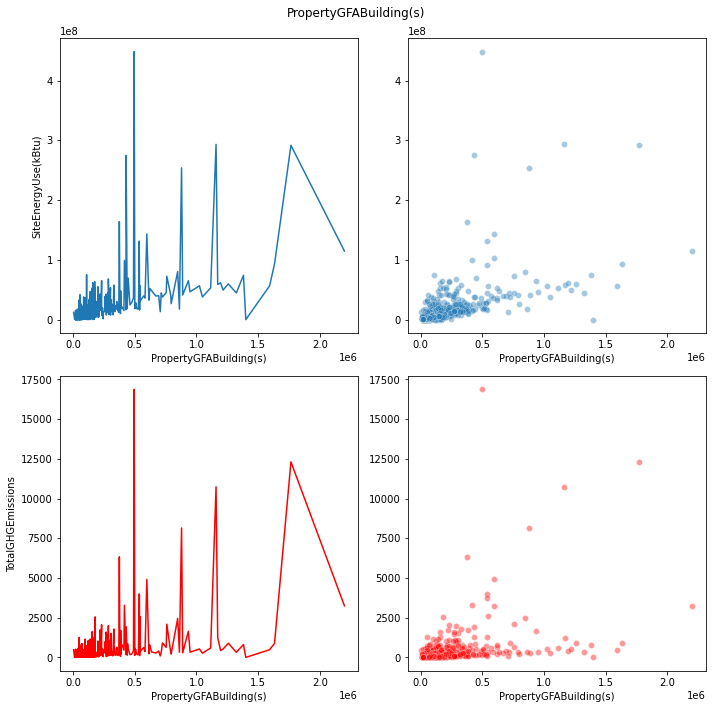

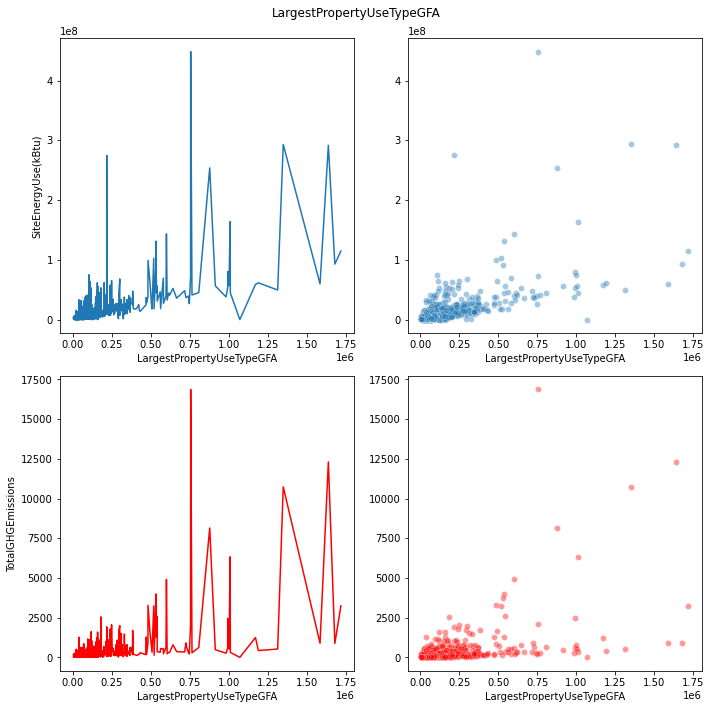

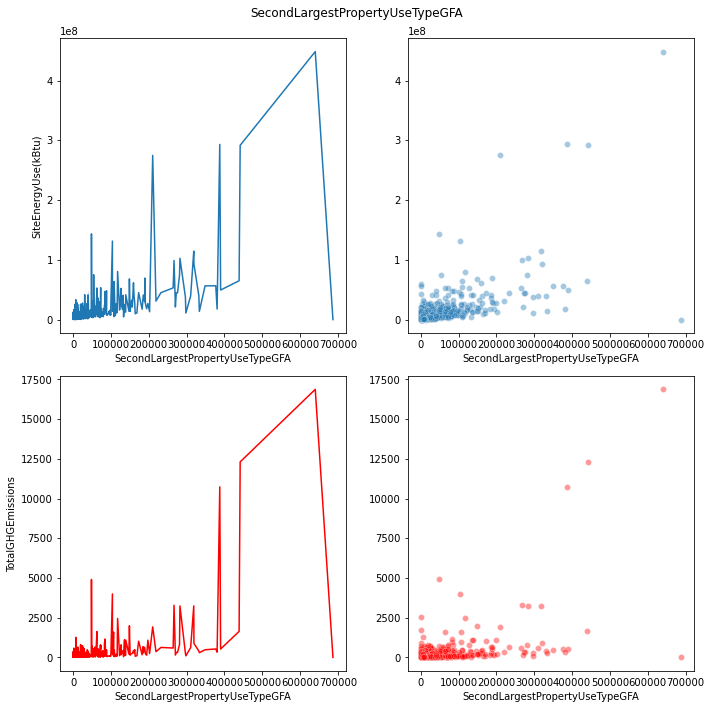

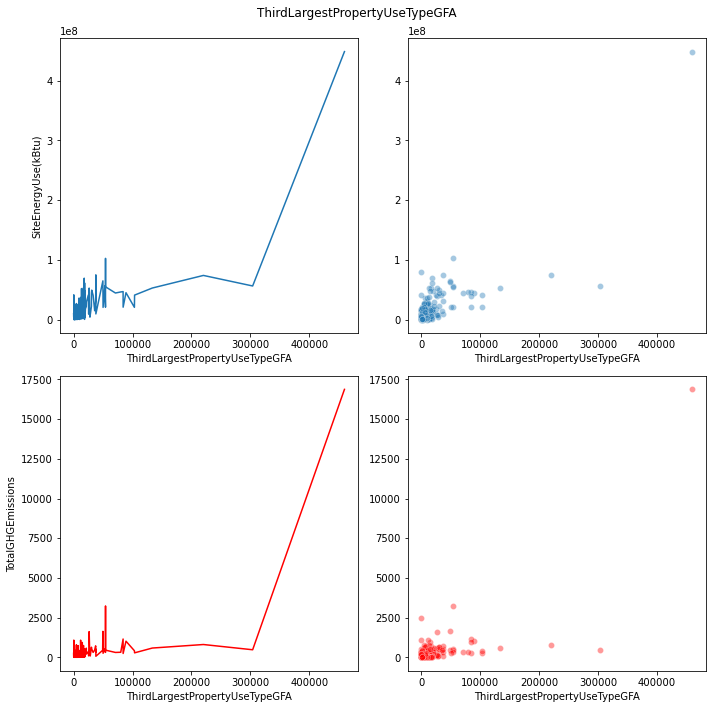

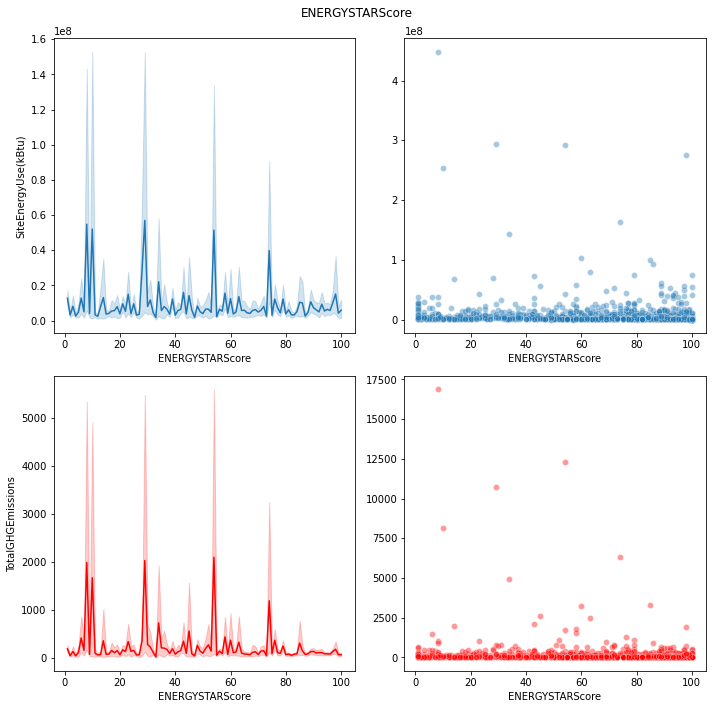

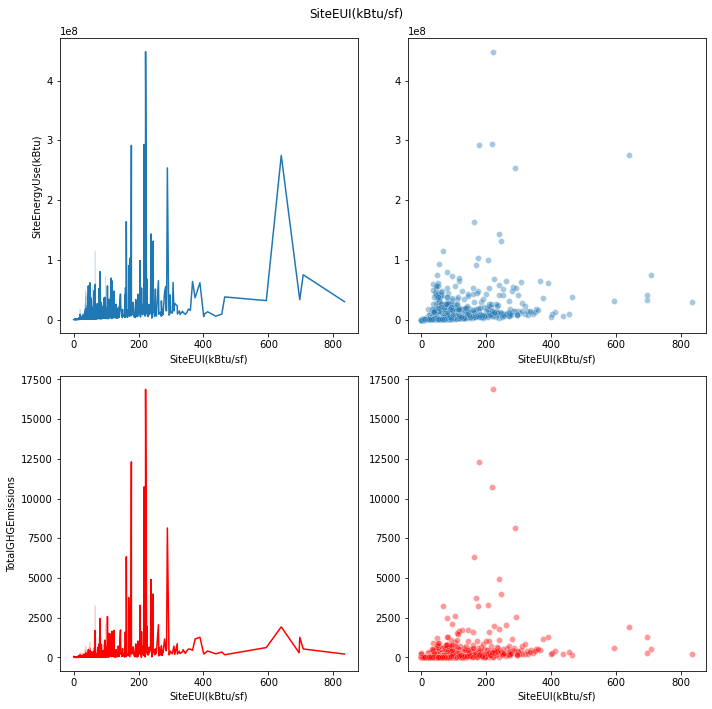

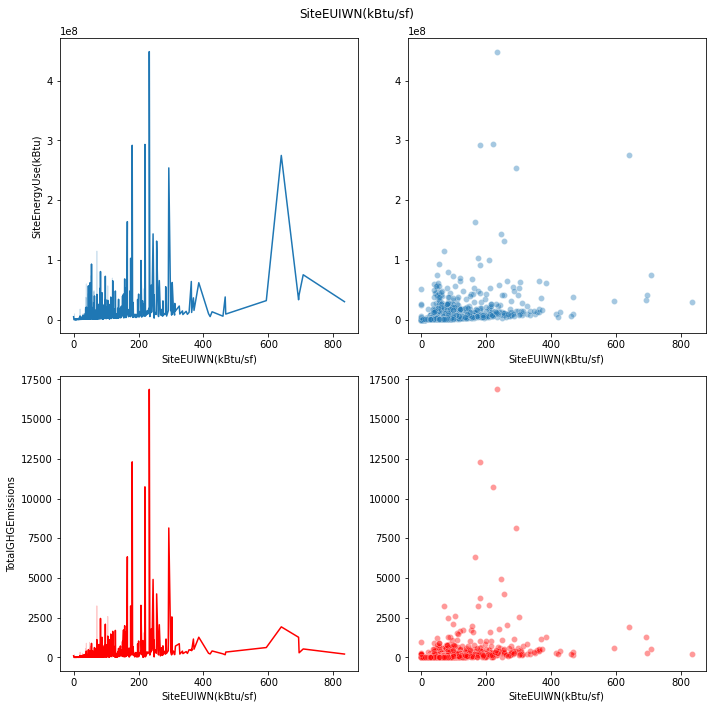

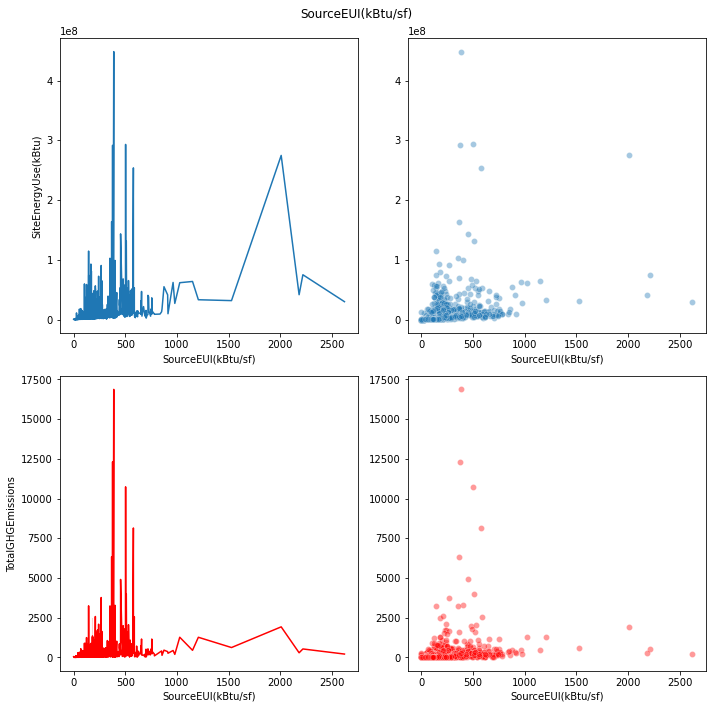

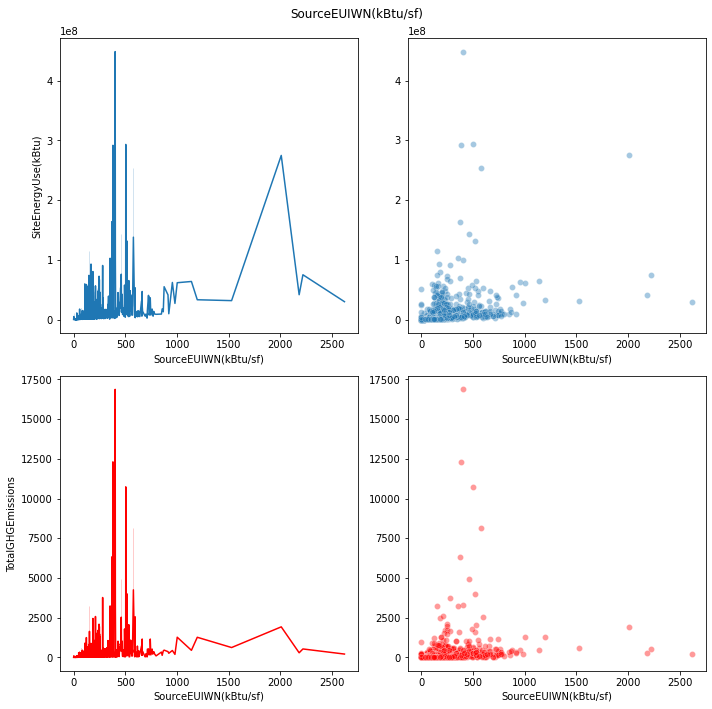

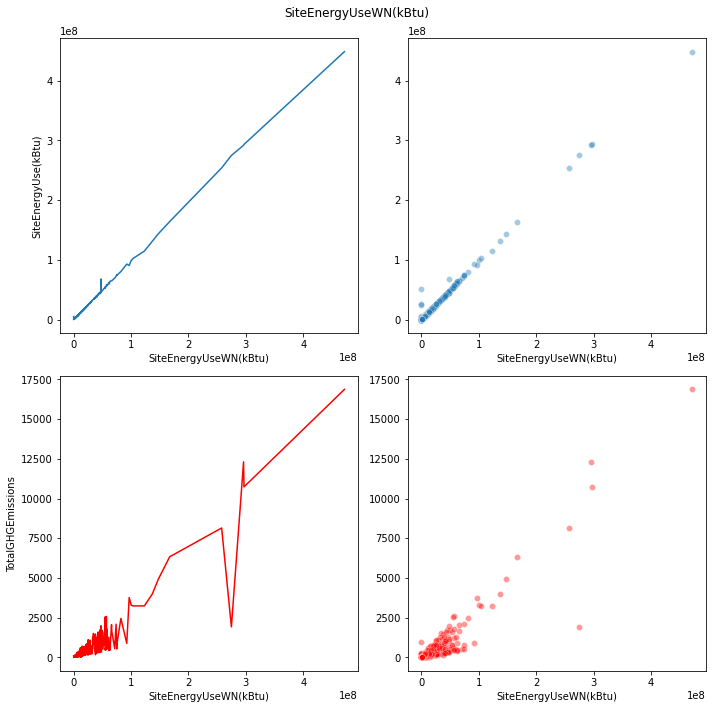

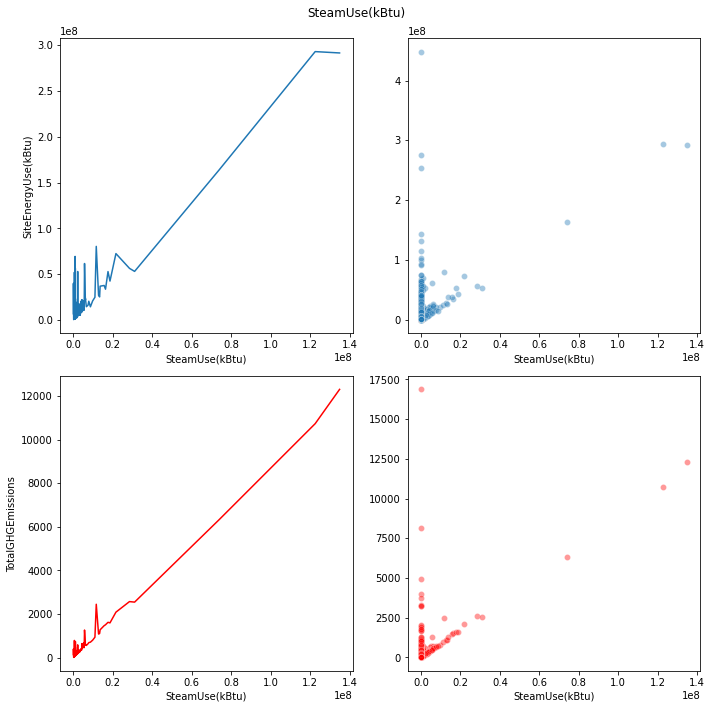

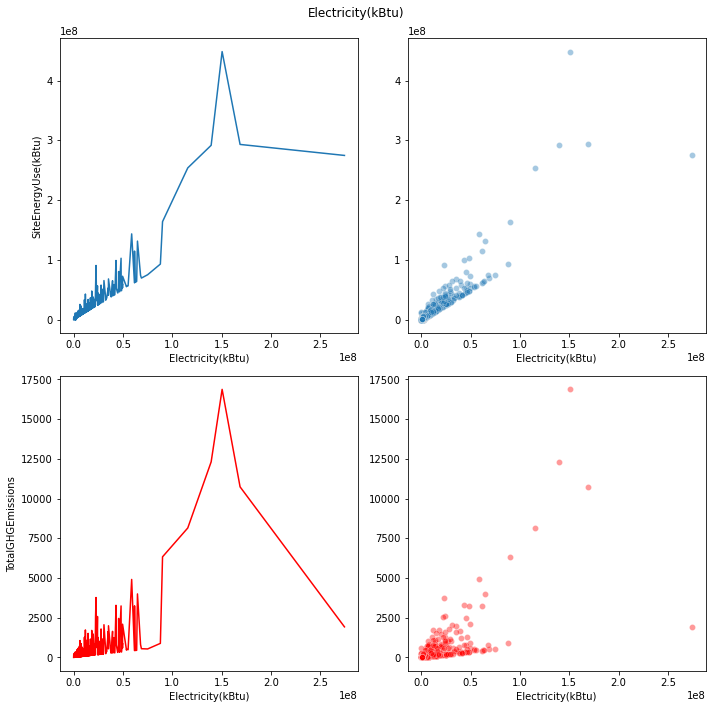

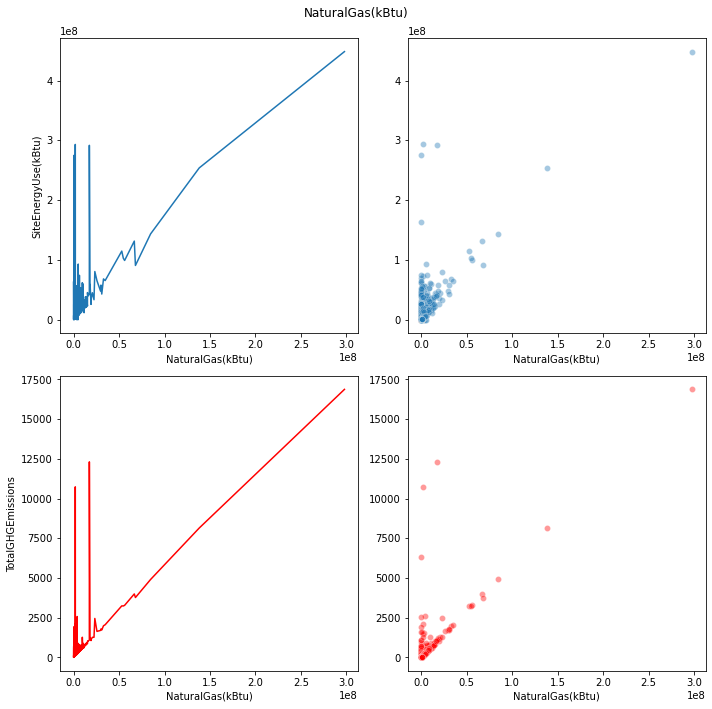

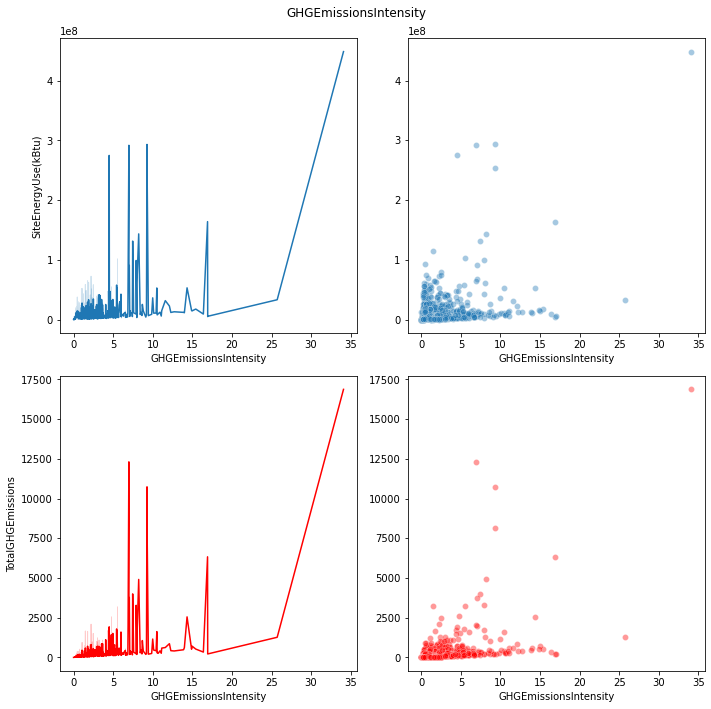

In [59]:
for col in numerical_features:
    fig = plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.suptitle(col)
    ax1 = sns.lineplot(data=df, x=col, y=conso)
    plt.subplot(2,2,2)
    ax2 = sns.scatterplot(data=df, x=col, y=conso, alpha=0.4)
    ax2.set(ylabel=None)
    plt.subplot(2,2,3)
    ax3 = sns.lineplot(data=df, x=col, y=co2, color='red')
    plt.subplot(2,2,4)
    ax4 = sns.scatterplot(data=df, x=col, y=co2, color='red', alpha=0.4)
    ax4.set(ylabel=None)
    plt.tight_layout()
    save_fig(f"Évolution comparée des valeurs cibles en fonction de {col.replace('/','')}")
    plt.show()

#### Rapport d'analyse bivariée des variables quantitatives

Premièrement, on remarque que les relations 'conso/variable' et 'co2/variable' sont similaires en termes d'évolution, avec des pics de valeurs différents néanmoins. Notre rapport d'analyse s'en trouve ainsi simplifier car chaque point soulevé vaudra pour les 2 relations différentes.

<u><i>ZipCode</i></u> & <u><i>CouncilDistrictCode</i></u>

Nous pourrons étudier de plus près la nature des activités les plus fréquentes dans les bâtiments des zones où le 'ZipCode' correspond à un pic de valeur pour se faire une idée des usages de bâtiments qui sont susceptibles d'être les plus énergivores et émetteurs de CO2.

L'évolution des valeurs cibles en fonction de 'CouncilDistrictCode va dans ce sens : certaines zones de la ville abritent des activités plus énergivores et plus émettrices de CO2 (qui semblent être les mêmes).

Par la suite, nous ne garderons que la variable **CouncilDistrictCode**, plus simple à interpréter.

In [60]:
df.drop(columns='ZipCode', inplace=True)
numerical_features.remove('ZipCode')

<u><i>Latitude</i></u> & <u><i>Longitude</i></u>

On remarque que les bâtiments les plus consommateurs et émetteurs sont situés au coeur de la ville.

<u><i>YearBuilt</i></u>

Les bâtiments les plus anciens ne sont pas forcément ceux qui émettent ou consomment le plus (étrangement les plus grandes consommation ou émission sont de plus en plus élevées avec l'année de construction croissante).

S'il est légitime de penser qu'un bâtiment plus vétuste a une moins bonne performance énergétique en général (nous n'avons aucune données sur la rénovation des bâtiments malheureusement), il faut alors se poser la question si les bâtiments anciens sont aussi utilisés que les plus récents.

<u><i>NumberOfBuildings</i></u>

Les portefeuilles de bâtiments possédant un nombre plus élevé de bâtiments semblent plus énergivores et émetteurs que les autres et on semble pouvoir distinguer plusieurs différentes tendances de nos valeurs cibles en fonction du nombre de bâtiments (plusieurs tendances linéaires avec des pentes plus ou moins fortes, <u><i>peut-être en fonction d'une autre aractéristique des bâtiments ?</i></u>).

<u><i>NumberOfFloors</i></u>

Il nous semble qu'il ourrait y avoir une relation polynomiale entre la consommation d'énergie et le nombre d'étage dans les bâtiments, et pour l'émission de CO2, même remarque que pour l'évolution par rapport à 'NumberOfBuidings'.

<u><i>PropertyGFATotal</i></u>

On observer une relation qui semble linéaire entre nos valeurs cibles et cette variable (même remarque générale que pour 'NumberOfBuildings').

<u><i>PropertyGFAParking</i></u>

On observer une relation qui semble linéaire entre la consommation et cette variable (même remarque générale que pour 'NumberOfBuildings'), mais l'émission de CO2 ne semble pas vraiment tenir compte de la surface de parking des bâtiments.

En effet, un parking doit être éclairé, mais est rarement chauffé.

Ici on observe une grande disparité des valeurs cibles pour une valeur de la variable 'PropertyGFAParking' car beaucoup de bâtiments (1309 des bâtiments restant dans notre jeu de données soit 80%) n'ont pas de parking.

<u><i>LargestPropertyUseTypeGFA</i></u>, <u><i>SecondLargestPropertyUseTypeGFA</i></u> & <u><i>ThirdLargestPropertyUseTypeGFA</i></u>

Sans surprise, pour ces 3 variables nous pouvons faire les mêmes remarques que pour la variable 'PropertyGFATotal'.


<u><i>ENERGYSTARScore</i></u>

On observe que les plus grandes valeurs de nos cibles sont de moins en moins élevée avec 'ENERGYSTARScore' croissan sans pour autant distinguer de véritable tendance générale.

<u><i>SiteEUI(kBtu/sf) </i></u>,<u><i>SiteEUIWN(kBtu/sf) </i></u>,<u><i>SourceEUI(kBtu/sf) </i></u>,<u><i>SourceEUIWN(kBtu/sf) </i></u>,<u><i>SiteEnergyUseWN(kBtu) </i></u>,<u><i>SteamUse(kBtu) </i></u>,<u><i>Electricity(kBtu) </i></u>,<u><i>NaturalGas(kBtu)</i></u>

Sans surprise, pour ces 8 variables nous pouvons faire les mêmes remarques que pour la variable 'NumberOfBuildings'.

Nous observons des relations fortement linéaires particulièrement entre nos valeurs cibles et les variables **'SiteEnergyUseWN(kBtu)'** qui représente la consommation annuelle et totale d'énergie du bâtiment par des conditions météorologique normalisées,**'SteamUse(kBtu)', 'Electricity(kBtu)' et 'NaturalGas(kBtu)'**.

<u><i>GHGEmissionsIntensity</i></u>

Enfin, pour cette dernière variable, nous pouvons faire les mêmes remarques que pour la variable 'NumberOfBuildings'.

### Analyse bivariée des variables qualitatives

In [61]:
categorical_features.remove('ListOfAllPropertyUseTypes')

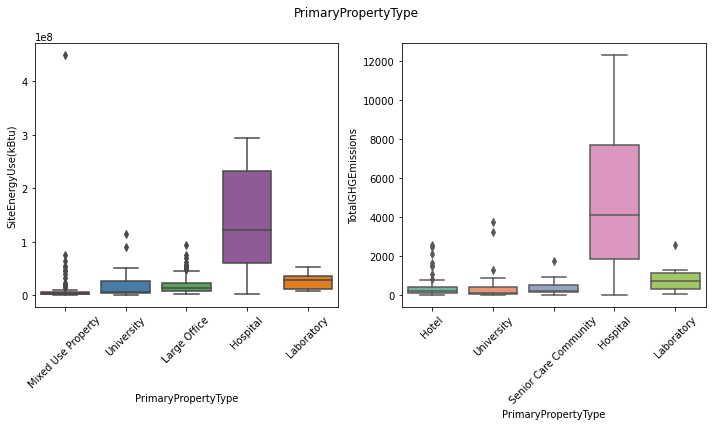

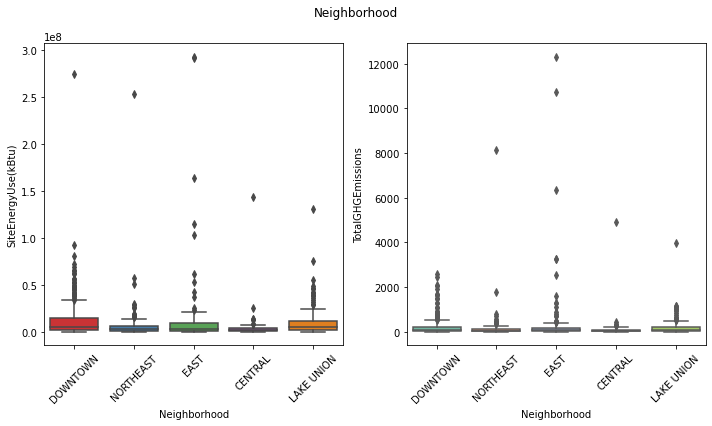

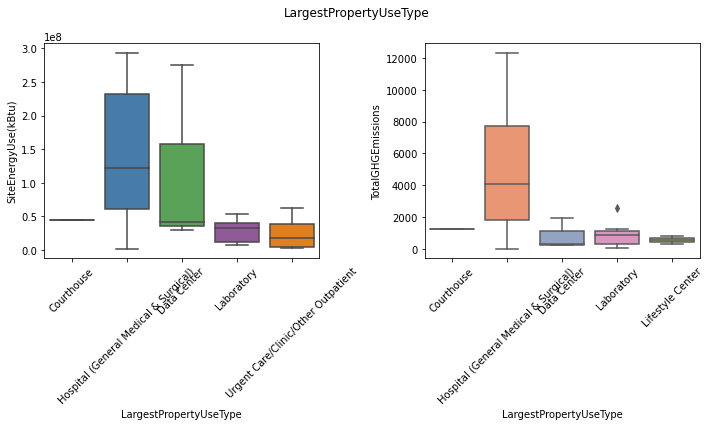

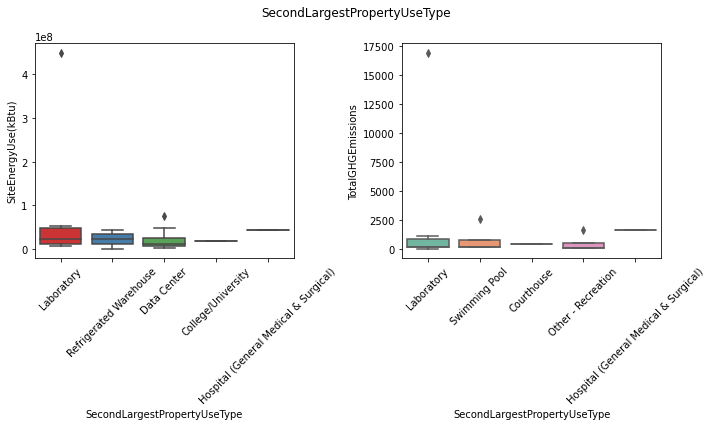

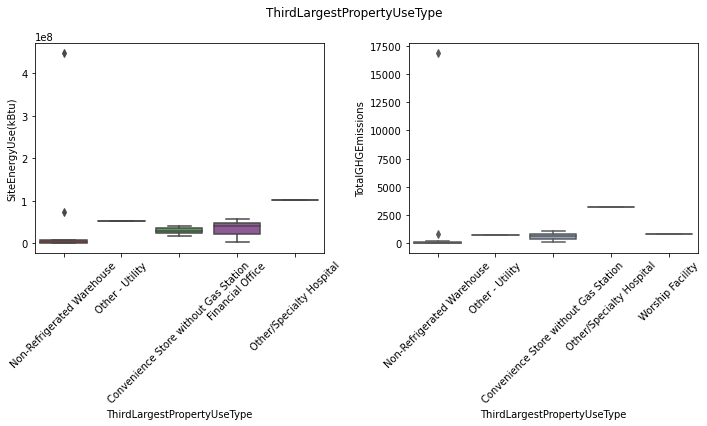

In [62]:
for col in categorical_features:
    subset_conso = df[[col,conso]]
    subset_co2 = df[[col,co2]]
    
    cat_to_keep_conso = df.groupby(by=col).mean()[conso].sort_values(ascending=False)[:5].index
    cat_to_drop_conso = list(np.setdiff1d(subset_conso[col].unique(), cat_to_keep_conso, assume_unique=True))
    
    cat_to_keep_co2 = df.groupby(by=col).mean()[co2].sort_values(ascending=False)[:5].index
    cat_to_drop_co2 = list(np.setdiff1d(subset_co2[col].unique(), cat_to_keep_co2, assume_unique=True))
                       
    for cat in cat_to_drop_conso:
        subset_conso = subset_conso.drop(index=subset_conso[subset_conso[col]==cat].index)
    
    for cat in cat_to_drop_co2:
        subset_co2 = subset_co2.drop(index=subset_co2[subset_co2[col]==cat].index)
    
    fig = plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.suptitle(col)
    ax1 = sns.boxplot(data=subset_conso, x=col, y=conso, palette='Set1')
    plt.xticks(rotation = 45)
    plt.subplot(1,2,2)
    ax2 = sns.boxplot(data=subset_co2, x=col, y=co2, palette='Set2')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    save_fig(f"Distribution des valeurs cibles dans les 5 premières catégories de {col}")
    plt.show()

Nous remarquons que les établissements de santé (hôpitaux, cliniques) sont les types de bâtiments les plus consommateurs d'énergie et émetteurs de C02, viennent ensuit les Data Centers et les laboratoires.

Cela peut s'expliquer par la permanence de l'usage de ces bâtiments, jour et nuit, tous les jours de l'année, associé à l'usage d'appareils électroniques multiples et de systèmes critiques pour la santé des patients ou le maintien des performances des réseaux de communications.

## Analyse multivariée

In [63]:
#sns.pairplot(df[numerical_features+[conso, co2]])
save_fig("Visualisation des relations paire à paire des variables quantitatives importantes")

<Figure size 720x576 with 0 Axes>

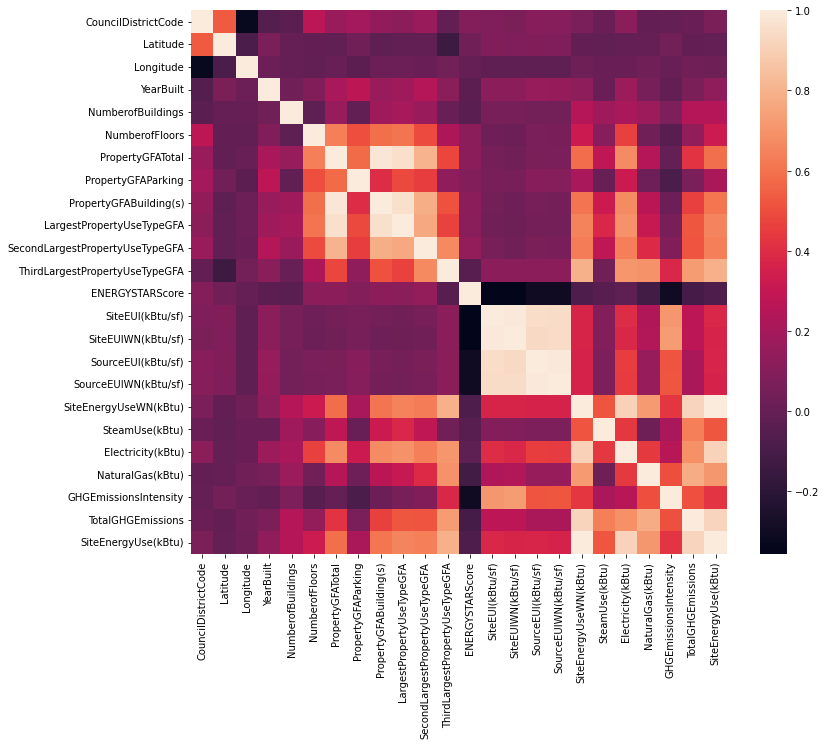

In [64]:
plt.figure(figsize=(12,10))
sns.heatmap(df[numerical_features+[co2,conso]].corr())
save_fig("Matrice de corrélation linéaire des variables quantitatives importantes")

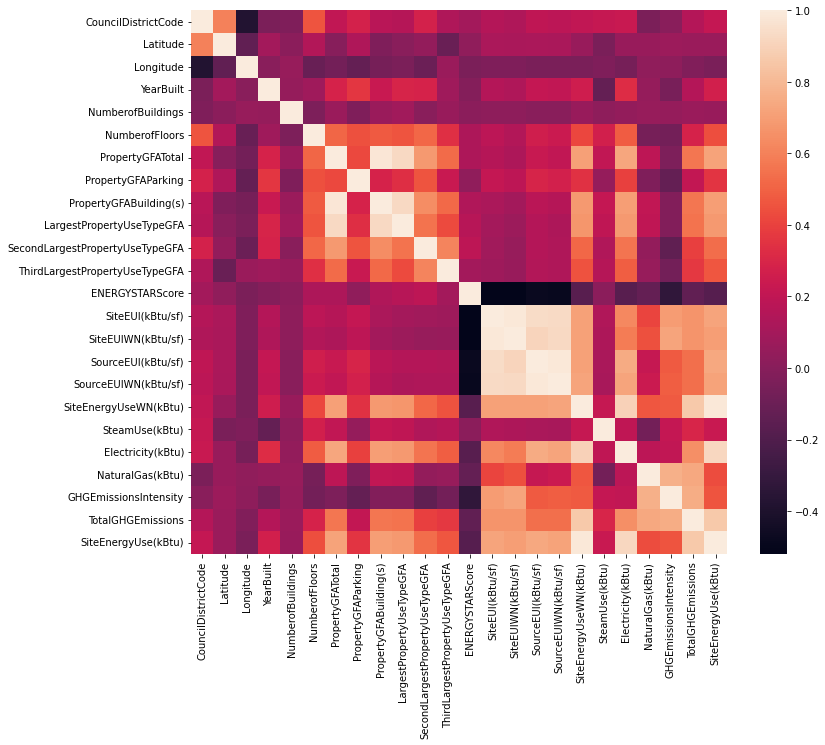

In [65]:
plt.figure(figsize=(12,10))
sns.heatmap(df[numerical_features+[co2,conso]].corr(method='spearman'))
save_fig("Matrice de corrélation de monotonie des variables quantitatives importantes")

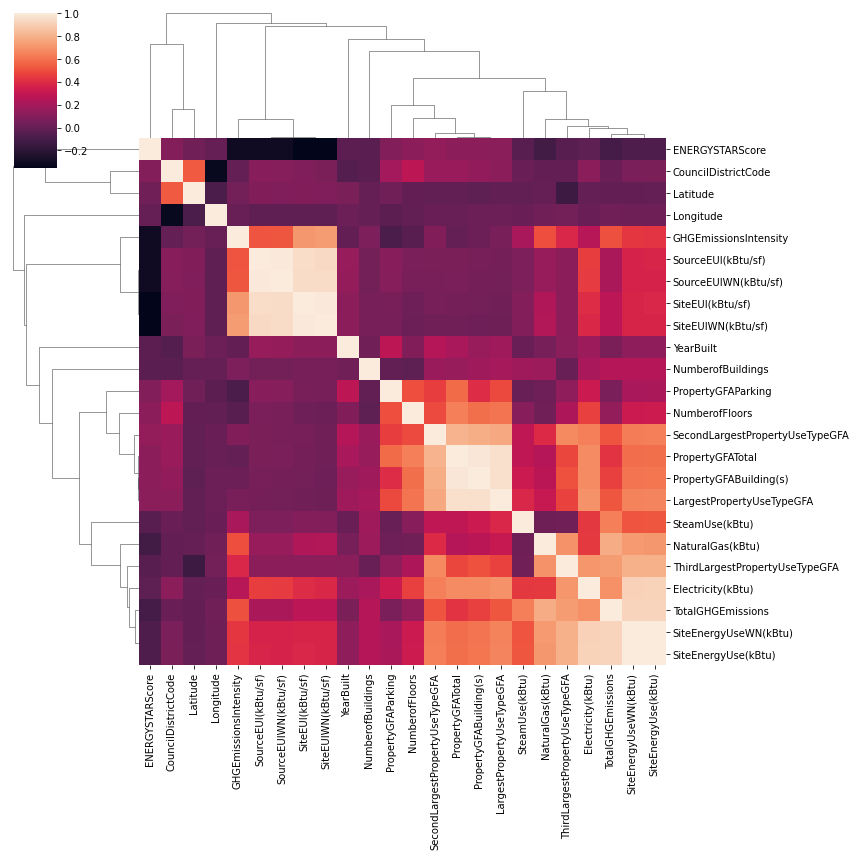

In [66]:
sns.clustermap(df[numerical_features+[conso, co2]].corr(), metric='correlation', figsize=(12,12))
save_fig("Visualisation des clusters de corrélation")

#### Rapport d'analyse multivariée

Les graphiques ci-avant confirment nos observations faites dans le rapport d'analyse bivariée.

Mais nous en apprennons également, énormément plus :

- Nous pouvons distinguer 3 sous-groupes de variables qui sont particulièrement corrélés

In [67]:
corr_grp_1 = ['GHGEmissionsIntensity','SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)']
corr_grp_2 = ['NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 
              'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']
corr_grp_3 = ['SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
              'ThirdLargestPropertyUseTypeGFA']
corr_grp_4 = ['SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
                  'ThirdLargestPropertyUseTypeGFA', conso, co2]

corr_grps = [corr_grp_1, corr_grp_2, corr_grp_3, corr_grp_4]

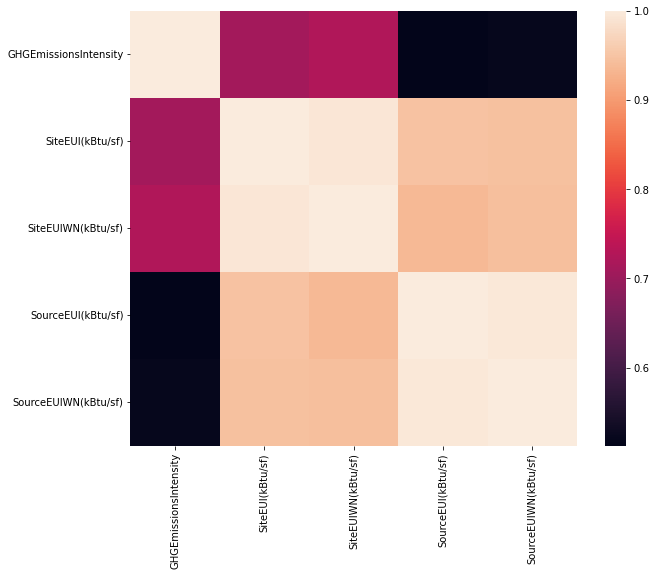

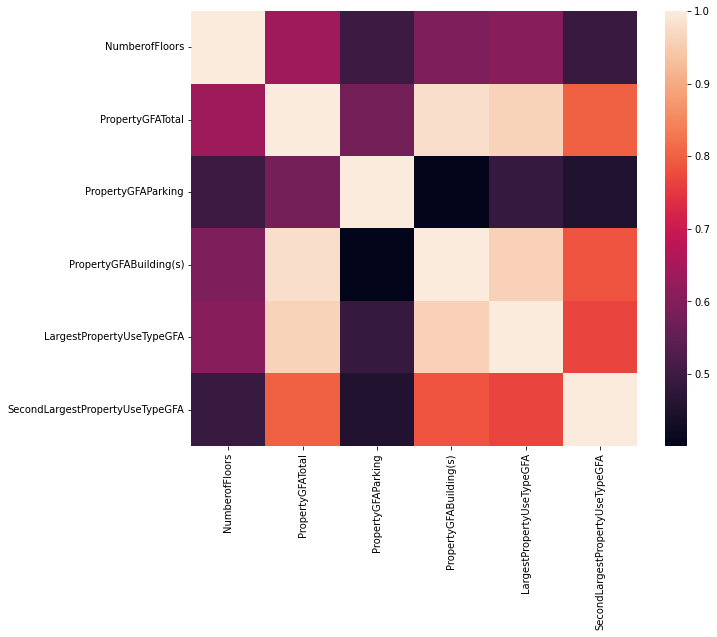

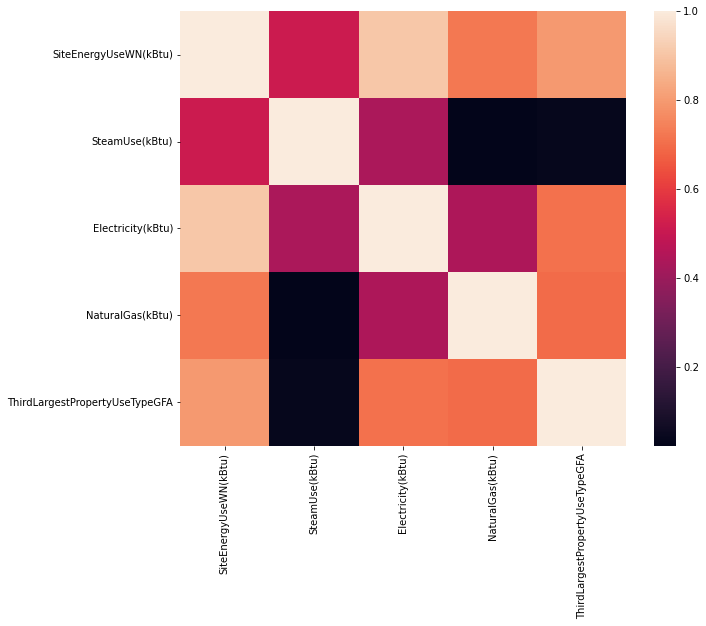

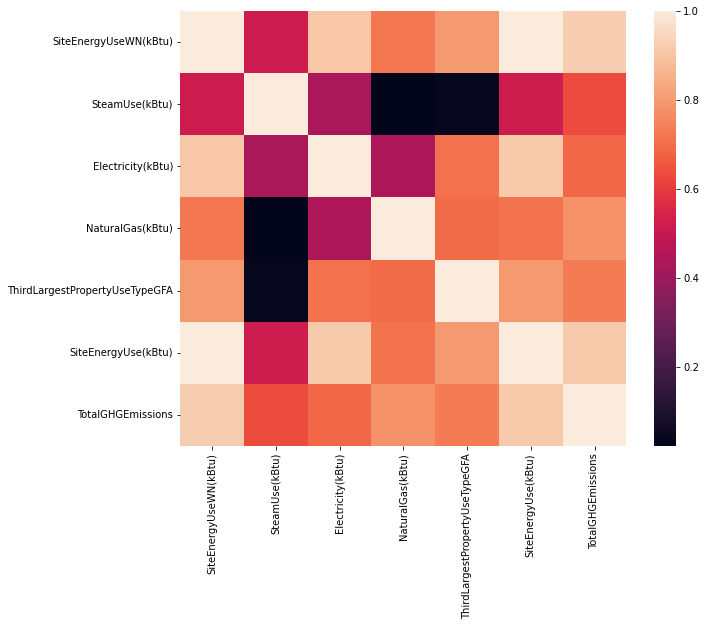

In [68]:
for grp in corr_grps:
    plt.figure()
    sns.heatmap(df[grp].corr())
    save_fig(f"Diagramme de corrélation du cluster n°{1+corr_grps.index(grp)}")

Nous pouvons comprendre :
   1. le premier groupe comme celui des variables de consommation d'énergie ou d'émission de gazs à effet de serre rapportées à la surface
   2. le second groupe comme l'ensemble des variables relatives à la surface/volume des bâtiments
   3. le troisième comme l'ensemble des variables de consommation d'énergie
   4. le quatrième groupe est composé du troisième auquel on ajoute nos 2 valeurs cibles sont très corrrélées à ce dernier
   
Il est également à noter que les variables du groupe 1 sont également fortement corrélées à celles du groupe 3, mais moins fortement que les variables de ces groupes entre elles.


Par ailleurs, et sans surprise, les variables du groupe 1 et 3 sont également corrélées, mais moins fortement que les variables de ces groupes entre elles, et moins que ce qu'on pouvait s'imaginer. En effet, normalement il existe une relation affine entre ces 2 groupes de variables, le coefficient de cette relation étant la valeur de la 'gross floor area'...

Enfin, les variables du groupe 2 et 3 sont également corrélées, mais moins fortement que les variables de ces groupes entre elles.

>**Nous constatons que nos 2 variables cibles sont très fortement corrélées linéairement** : nous pouvons donc nous poser la question si nous n'avons finalement pas qu'une seule cible plutôt que 2...

# Traitement des variables prédictives

Nous souhaitons prédire les valeurs de nos variables cibles à partir des données structurelles des bâtiments afin de pouvoir se passer des relevés de consommation annuels futurs.

A partir d'ici, nous pouvons établir la liste des variables que nous n'utiliserons pas pour entraîner notre modèle :

In [69]:
not_pred_features = numerical_features[-9:]+['CouncilDistrictCode']
not_pred_features

['SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'GHGEmissionsIntensity',
 'CouncilDistrictCode']

In [70]:
pred_features = list(np.setdiff1d(list(df.columns), not_pred_features))
pred_features.remove(conso)
pred_features.remove(co2)
pred_features

['ENERGYSTARScore',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'Latitude',
 'ListOfAllPropertyUseTypes',
 'Longitude',
 'Neighborhood',
 'NumberofBuildings',
 'NumberofFloors',
 'PrimaryPropertyType',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'PropertyName',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearBuilt']

In [71]:
num_pred_features = list(np.setdiff1d(numerical_features, not_pred_features))
num_pred_features

['ENERGYSTARScore',
 'LargestPropertyUseTypeGFA',
 'Latitude',
 'Longitude',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'YearBuilt']

In [72]:
cat_pred_features = list(np.setdiff1d(pred_features, numerical_features))
cat_pred_features

['LargestPropertyUseType',
 'ListOfAllPropertyUseTypes',
 'Neighborhood',
 'PrimaryPropertyType',
 'PropertyName',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType']

### Distribution des variables numériques

Étant donné que la plupart des distributions de nos variables suivent une loi exponentielle, nous allons leur appliquer la fonction logarithme pour voir si nous obtenons des distributions plus proches de la loi normale :

DISTRIBUTION DES VARIABLES NUMÉRIQUES


--------------------
ENERGYSTARSCORE




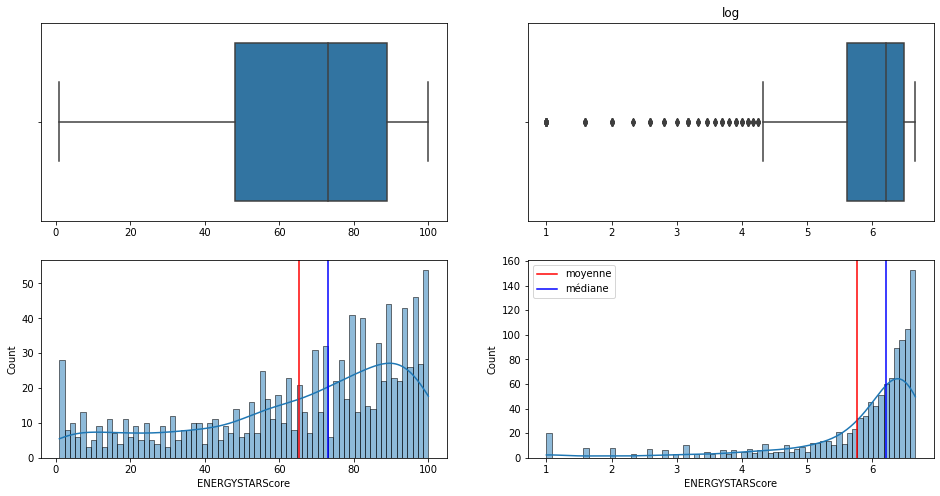

--------------------
LARGESTPROPERTYUSETYPEGFA




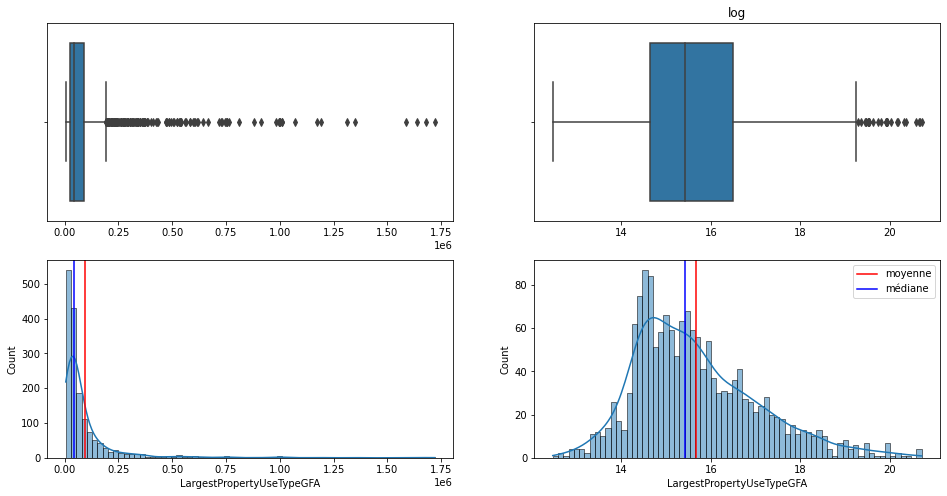

--------------------
LATITUDE




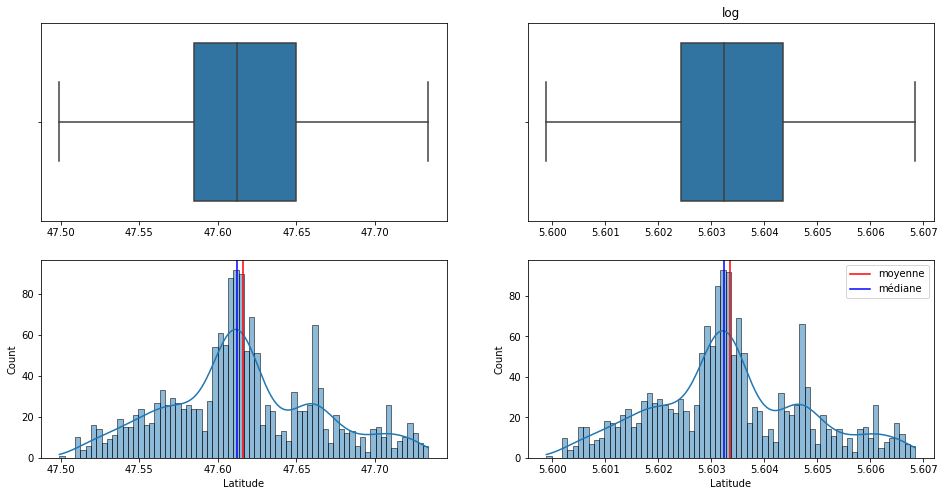

C:\Users\jkomb\anaconda3.2022\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


--------------------
LONGITUDE




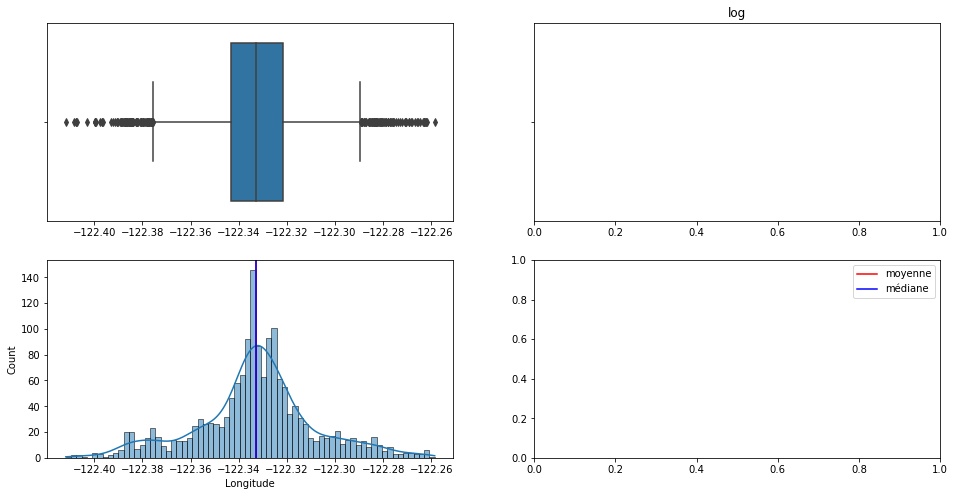

--------------------
NUMBEROFBUILDINGS




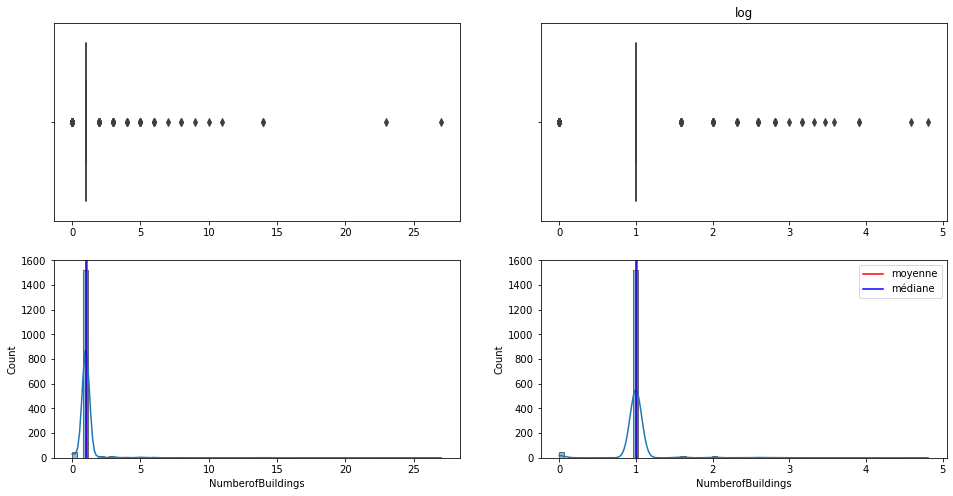

--------------------
NUMBEROFFLOORS




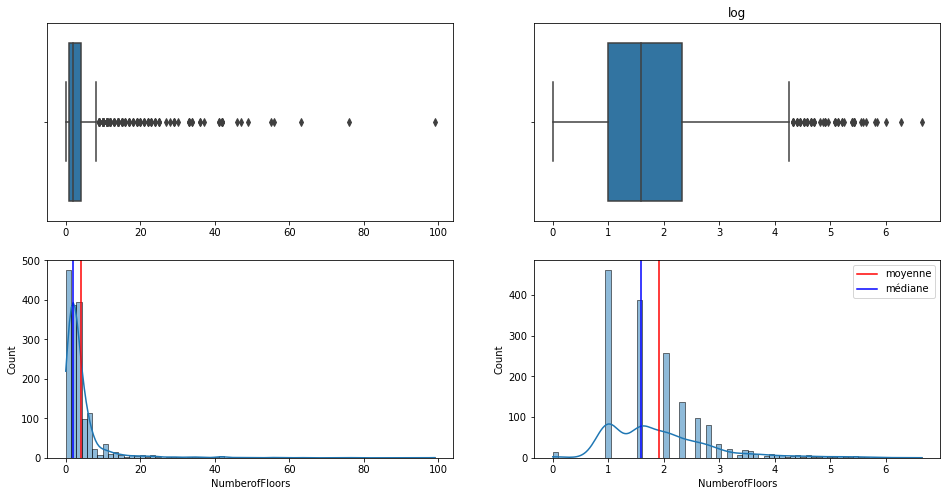

--------------------
PROPERTYGFABUILDING(S)




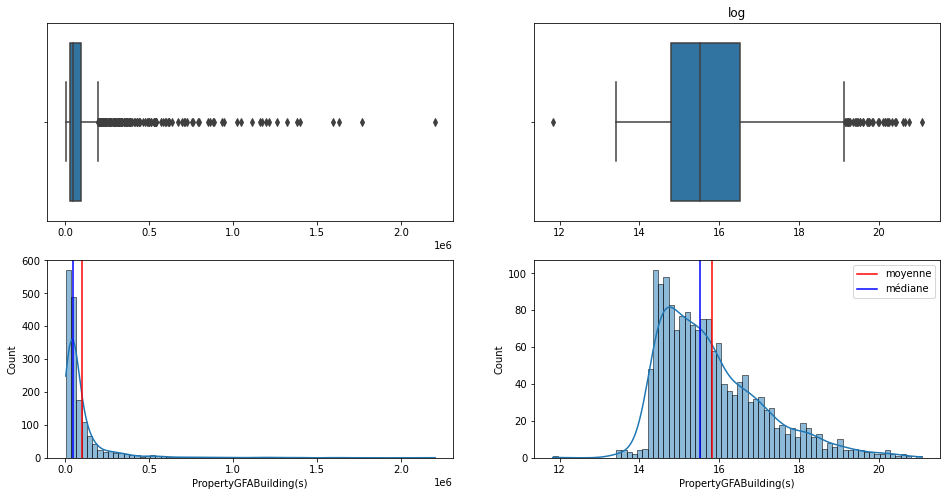

--------------------
PROPERTYGFAPARKING




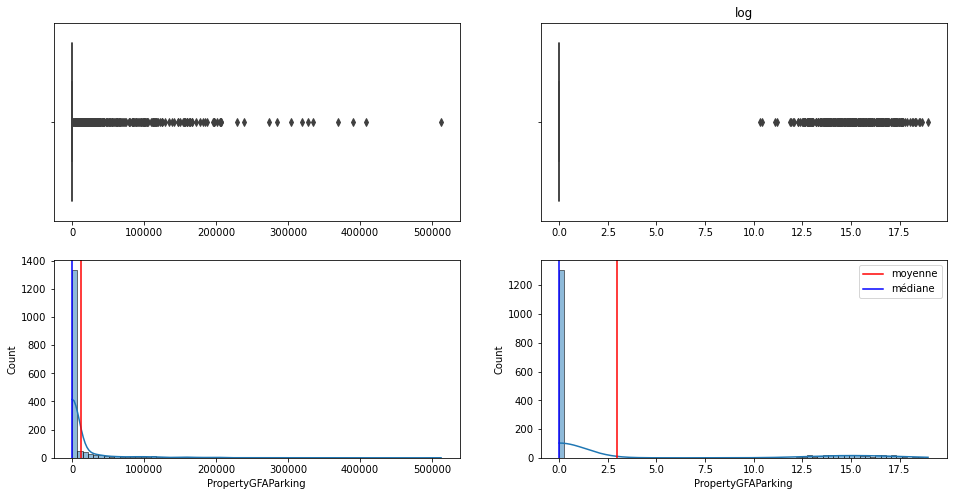

--------------------
PROPERTYGFATOTAL




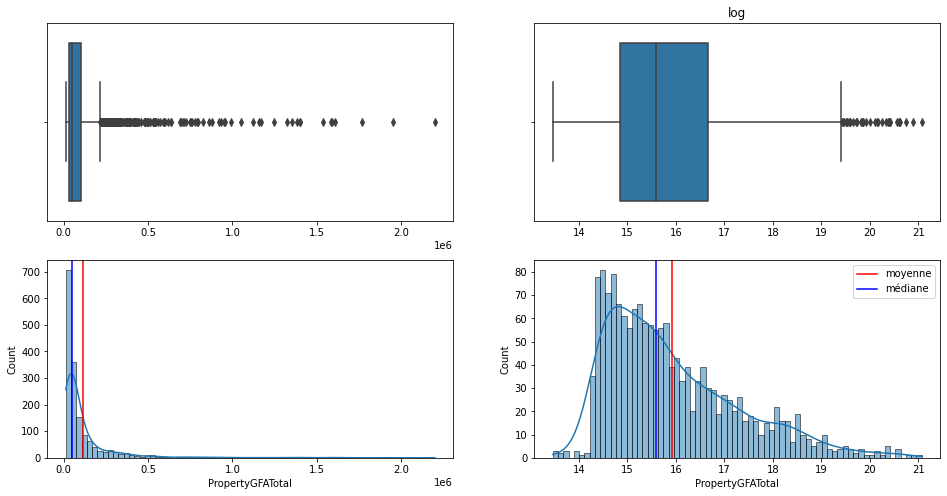

--------------------
SECONDLARGESTPROPERTYUSETYPEGFA




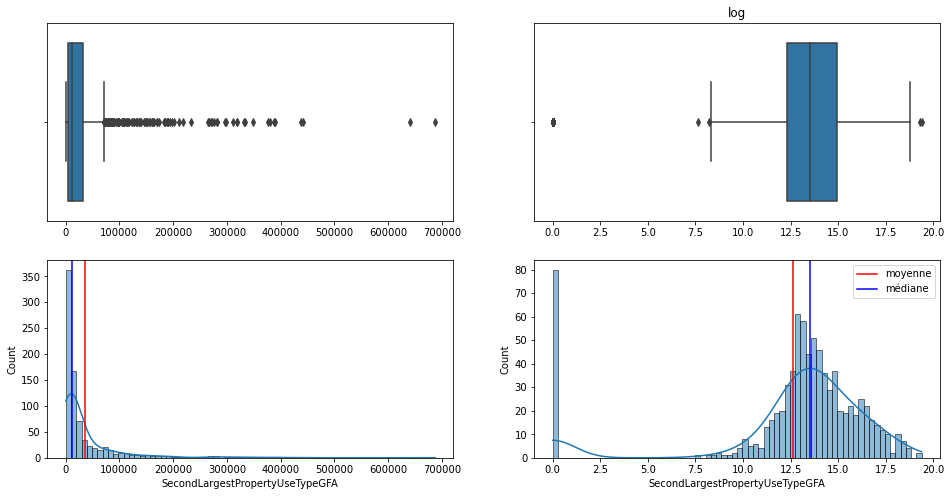

--------------------
THIRDLARGESTPROPERTYUSETYPEGFA




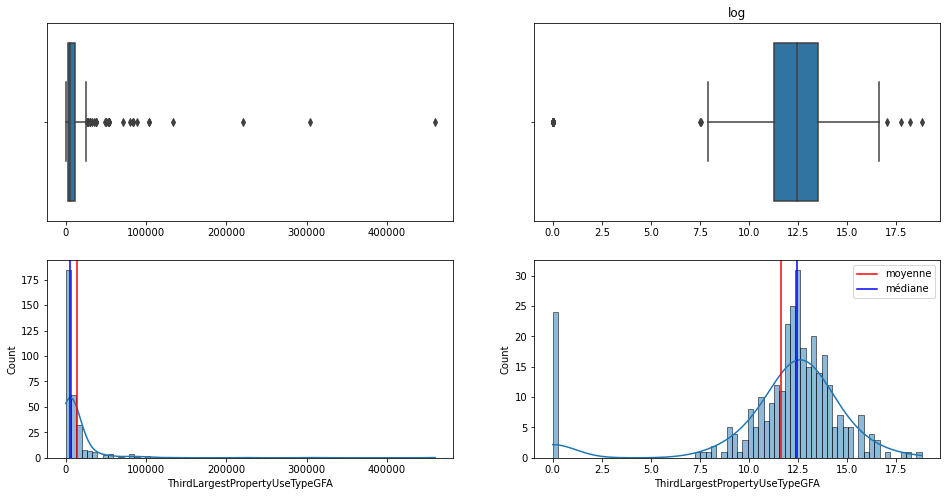

--------------------
YEARBUILT




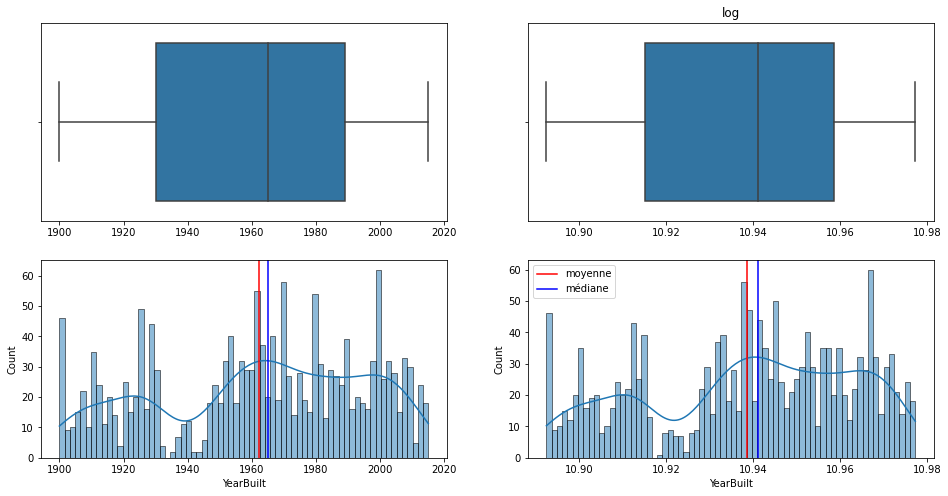

In [73]:
print('DISTRIBUTION DES VARIABLES NUMÉRIQUES')
print('\n')
for col in num_pred_features:
    subset = df[col]
    log_subset = np.log2(df[col]+1)
    print("-"*20)
    print(col.upper())
    print('\n')
    fig = plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    ax1 = sns.boxplot(x=subset)
    ax1.set(xlabel=None)
    plt.subplot(2,2,3)
    ax2 = sns.histplot(x=subset, kde=True, bins=70)
    plt.axvline(x=subset.mean(), color='r', label='moyenne')
    plt.axvline(x=subset.median(), color='b', label='médiane')
    plt.subplot(2,2,2)
    plt.title("log")
    ax3 = sns.boxplot(x=log_subset)
    ax3.set(xlabel=None)
    plt.subplot(2,2,4)
    ax4 = sns.histplot(x=log_subset, kde=True, bins=70)
    plt.axvline(x=log_subset.mean(), color='r', label='moyenne')
    plt.axvline(x=log_subset.median(), color='b', label='médiane')
    plt.legend()
    save_fig(f"Distribution après passage au log de {col}")
    plt.show()

Nous constatons que le passage au logarithme est bénéfique pour les variables de surface hormis **'PropertyGFABuilding(s)'** et **'PropertyGFAParking'** : le passage au logarithme rapproche la forme de leurs distributions d'une distribution normale !

Du moins elle réduit fortement l'asymétrie et le kurtosis.

**Nous allons donc passer au logarithme toutes les variables pour lesquelles cette transformation est intéressante afin de se rapprocher au mieux d'un jeu de données identiquement distribué**.

Les autres variables seront tout simplement normalisées.

In [74]:
log_features = ['LargestPropertyUseTypeGFA', 'PropertyGFATotal', 'SecondLargestPropertyUseTypeGFA', 
                'ThirdLargestPropertyUseTypeGFA']

In [75]:
std_features = ['ENERGYSTARScore', 'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFABuilding(s)',
                'PropertyGFAParking', 'YearBuilt']

### Utilisation de diverses sources d'énergie
Chaque bâtiment peut être caractérisé en partie par les différentes sources d'énergie qu'il utiise à côté de l'électricité (gaz naturel, vapeur).

   - Nous pouvons donc créer pour chaque bâtiment 2 variables binaires pour indiquer l'usage du gaz naturel et de vapeur.

In [76]:
df[df['SteamUse(kBtu)'].isna()]

PrimaryPropertyType      PropertyName  CouncilDistrictCode  \
578   Small and Mid-Sized Office  SEATTLE BUILDING                    7   
2670          Mixed Use Property  KALBERG BUILDING                    4   

     Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
578      DOWNTOWN  47.60380 -122.33293       1924                NaN   
2670    NORTHEAST  47.66182 -122.31345       1928                NaN   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
578                4             63150                   0   
2670               2             20760                   0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
578                    63150                       NaN                    NaN   
2670                   20760                       NaN                    NaN   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
578                         NaN                          NaN   
2670                        NaN                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
578                               NaN                         NaN   
2670                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
578                              NaN              NaN               NaN   
2670                             NaN              NaN               NaN   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
578                  NaN                 NaN                   NaN   
2670                 NaN                 NaN                   NaN   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
578                   NaN                    NaN             NaN   
2670                  NaN                    NaN             NaN   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
578                 NaN               NaN                NaN   
2670                NaN               NaN                NaN   

      GHGEmissionsIntensity  
578                     NaN  
2670                    NaN

In [77]:
df[df['NaturalGas(kBtu)'].isna()]

PrimaryPropertyType      PropertyName  CouncilDistrictCode  \
578   Small and Mid-Sized Office  SEATTLE BUILDING                    7   
2670          Mixed Use Property  KALBERG BUILDING                    4   

     Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
578      DOWNTOWN  47.60380 -122.33293       1924                NaN   
2670    NORTHEAST  47.66182 -122.31345       1928                NaN   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
578                4             63150                   0   
2670               2             20760                   0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
578                    63150                       NaN                    NaN   
2670                   20760                       NaN                    NaN   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
578                         NaN                          NaN   
2670                        NaN                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
578                               NaN                         NaN   
2670                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
578                              NaN              NaN               NaN   
2670                             NaN              NaN               NaN   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
578                  NaN                 NaN                   NaN   
2670                 NaN                 NaN                   NaN   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
578                   NaN                    NaN             NaN   
2670                  NaN                    NaN             NaN   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
578                 NaN               NaN                NaN   
2670                NaN               NaN                NaN   

      GHGEmissionsIntensity  
578                     NaN  
2670                    NaN

Nous décidons de supprimer ces 2 entrées car elles comportent trop de valeurs manquantes essentielles dont nos valeurs cibles.

In [78]:
df.drop(index=df[df['SteamUse(kBtu)'].isna()].index, inplace=True)

In [79]:
df['GasUse'] = df['NaturalGas(kBtu)'].apply(lambda x : True if x > 0 else False)
df['SteamUse'] = df['SteamUse(kBtu)'].apply(lambda x : True if x > 0 else False)

In [80]:
df['GasUse'].value_counts()

True     1160
False     466
Name: GasUse, dtype: int64

In [81]:
df['SteamUse'].value_counts()

False    1513
True      113
Name: SteamUse, dtype: int64

### Traitement des valeurs aberrantes

**Nous allons ici traiter les valeurs aberrantes d'un point de vue physique et non statistique.**

In [82]:
df[numerical_features+[conso]+[co2]].describe()

CouncilDistrictCode     Latitude    Longitude    YearBuilt  \
count          1626.000000  1626.000000  1626.000000  1626.000000   
mean              4.340098    47.615822  -122.332851  1962.119926   
std               2.194949     0.048580     0.024705    32.359325   
min               1.000000    47.499170  -122.411820  1900.000000   
25%               2.000000    47.584525  -122.343270  1930.250000   
50%               4.000000    47.612300  -122.332885  1965.000000   
75%               7.000000    47.649400  -122.321718  1989.000000   
max               7.000000    47.733870  -122.258640  2015.000000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        1626.000000     1626.000000      1.626000e+03   
mean            1.102706        4.090406      1.125215e+05   
std             1.167732        6.565912      1.923832e+05   
min             0.000000        0.000000      1.128500e+04   
25%             1.000000        1.000000      2.939250e+04   
50%             1.000000        2.000000      4.915450e+04   
75%             1.000000        4.000000      1.042888e+05   
max            27.000000       99.000000      2.200000e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count          1626.00000            1.626000e+03               1.622000e+03   
mean          12743.53444            9.977795e+04               9.386097e+04   
std           42248.95009            1.715178e+05               1.605094e+05   
min               0.00000            3.636000e+03               5.656000e+03   
25%               0.00000            2.837525e+04               2.565950e+04   
50%               0.00000            4.716000e+04               4.423100e+04   
75%               0.00000            9.449300e+04               9.225725e+04   
max          512608.00000            2.200000e+06               1.719643e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       817.000000                      319.000000   
mean                      36361.651526                    13865.480874   
std                       69537.386713                    36518.365683   
min                           0.000000                        0.000000   
25%                        5000.000000                     2460.000000   
50%                       11745.000000                     5581.000000   
75%                       31348.000000                    11869.000000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      1083.000000       1625.000000         1625.000000   
mean         65.428440         72.476308           74.947877   
std          28.488854         74.773504           75.736583   
min           1.000000          0.000000            0.000000   
25%          48.000000         33.700001           35.400002   
50%          73.000000         51.599998           53.799999   
75%          89.000000         81.699997           85.199997   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUseWN(kBtu)  \
count         1626.000000           1626.000000           1.625000e+03   
mean           176.614883            179.002583           8.110662e+06   
std            187.779041            187.717035           2.226778e+07   
min              0.000000             -2.100000           0.000000e+00   
25%             76.450001             79.400002           1.291405e+06   
50%            130.849998            133.849998           2.682243e+06   
75%            204.475006            205.899994           7.070998e+06   
max           2620.000000           2620.000000           4.716139e+08   

       SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  \
count    1.626000e+03       1.626000e+03      1.626000e+03   
mean     4.729155e+05       5.471707e+06      1.984977e+06   
std     

- Bâtiments pour lesquels nous avons une valeur de **'NumberofBuildings'** ou **'NumberofFloors'** égale à **0**.

In [83]:
df[df['NumberofBuildings']==0].shape[0]/df.shape[0]

0.03075030750307503

In [84]:
df[df['NumberofFloors']==0].shape[0]/df.shape[0]

0.008610086100861008

Nous décidons tout simplement de supprimer ces bâtiments de notre jeu de données étant donné la faible proportion qu'ils représentent.

In [85]:
df.drop(index=list(df[df['NumberofBuildings']==0].index)+list(df[df['NumberofFloors']==0].index), inplace=True)

- Bâtiments pour lesquels nous avons une valeur de **'TotalGHGEmissions'** négative

In [86]:
df[df[co2]<0]

PrimaryPropertyType    PropertyName  CouncilDistrictCode  \
3206  Small and Mid-Sized Office  Bullitt Center                    3   

     Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
3206      CENTRAL  47.61432 -122.31257       2013                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
3206               6             52000                   0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
3206                   52000                    Office                 Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
3206                    48159.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
3206                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
3206                             NaN            100.0               7.1   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
3206                 5.0                 2.0                  -2.1   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
3206          342726.0938            240132.0938             0.0   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
3206          -115417.0               0.0               -0.8   

      GHGEmissionsIntensity  GasUse  SteamUse  
3206                  -0.02   False     False

Visiblement, le bâtiment produit plus d'énergie qu'il n'en consomme et a un **ENERGYSTARScore** de 100, il y a de grandes chances pour qu'il s'agisse d'un bâtiment à énergie positive, nous décidons de passer sa valeur de **'TotalGHGEmissions'** à 0.

In [87]:
df.loc[df[co2]<0, co2] = 0

## Traitement des valeurs manquantes

In [88]:
df.isna().mean()[df.isna().mean()!=0]

LargestPropertyUseType             0.002561
LargestPropertyUseTypeGFA          0.002561
SecondLargestPropertyUseType       0.499360
SecondLargestPropertyUseTypeGFA    0.499360
ThirdLargestPropertyUseType        0.807939
ThirdLargestPropertyUseTypeGFA     0.807939
ENERGYSTARScore                    0.327145
SiteEUI(kBtu/sf)                   0.000640
SiteEUIWN(kBtu/sf)                 0.000640
SiteEnergyUseWN(kBtu)              0.000640
dtype: float64

### Variables structurelles
Nous allons traiter les valeurs manquantes dans les colonnes **LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA**.

In [89]:
df[df['LargestPropertyUseType'].isna()]

PrimaryPropertyType                      PropertyName  \
353        Self-Storage Facility                  Market St Center   
1147                       Hotel                   Palladian Hotel   
2414  Small and Mid-Sized Office               Talon Northlake LLC   
2459                  Restaurant  BUSH GARDEN - RESTURANT & LOUNGE   

      CouncilDistrictCode Neighborhood  Latitude  Longitude  YearBuilt  \
353                     6      BALLARD  47.66838 -122.39310       1946   
1147                    7     DOWNTOWN  47.61203 -122.34165       1910   
2414                    4   LAKE UNION  47.64747 -122.34086       2008   
2459                    2     DOWNTOWN  47.59697 -122.32474       1913   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
353                 2.0               2            111445                   0   
1147                1.0               8             61721                   0   
2414                1.0               4             48350                   0   
2459                1.0               3             28800                   0   

      PropertyGFABuilding(s)  \
353                   111445   
1147                   61721   
2414                   48350   
2459                   28800   

                              ListOfAllPropertyUseTypes  \
353   Fitness Center/Health Club/Gym, Office, Other ...   
1147                                              Hotel   
2414                                             Office   
2459                                         Restaurant   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
353                     NaN                        NaN   
1147                    NaN                        NaN   
2414                    NaN                        NaN   
2459                    NaN                        NaN   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
353                           NaN                              NaN   
1147                          NaN                              NaN   
2414                          NaN                              NaN   
2459                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
353                          NaN                             NaN   
1147                         NaN                             NaN   
2414                         NaN                             NaN   
2459                         NaN                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
353               NaN         47.799999           51.000000   
1147             93.0         52.200001           53.500000   
2414             45.0         72.199997           74.699997   
2459              NaN         31.200001           32.500000   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
353           103.000000            106.400002         5.697472e+06   
1147          150.399994            154.399994         2.897080e+06   
2414          226.600006            234.600006         3.168131e+06   
2459           62.000000             62.799999         8.999242e+05   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
353            6.076957e+06             0.0          3007514.0   
1147           2.968430e+06             0.0          2534592.0   
2414           3.280956e+06             0.0          3168131.0   
2459           9.358332e+05             0.0           402907.0   

      NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  GasUse  \
353          2689958.0             163.83                   1.47    True   
1147          362488.0              36.92                   0.60    True   
2414               0.0              22.09                   0.46   False   
2459          497017.0              29.21                   1.01    True   

      SteamUse  
353      False  
1147     False  
2414     F

Nous assignons à ces 4 portefeuilles leur unique usage dans **'LargestPropertyUseType'** d'après la colonne **'ListOfAllPropertyUseTypes'**, sinon le premier usage de cette liste.

In [90]:
df.loc[df[df['LargestPropertyUseType'].isna()].index, 'LargestPropertyUseType'] = df.loc[df[df['LargestPropertyUseType'].isna()].index, 'ListOfAllPropertyUseTypes'].apply(lambda x: x.split(',')[0])

De même nous assignons à ces 4 portefeuilles la valeur  **'PropertyGFATotal'** dans leur colonne **'LargestPropertyUseTypeGFA'**.

In [91]:
df.loc[df[df['LargestPropertyUseTypeGFA'].isna()].index, 'LargestPropertyUseTypeGFA'] = df.loc[df[df['LargestPropertyUseTypeGFA'].isna()].index, 'PropertyGFATotal']

In [92]:
df[df['SecondLargestPropertyUseType'].isna()]['LargestPropertyUseType'].str.split(',').apply(lambda x: len(x) if isinstance(x,list) else 0).value_counts()

1    775
4      4
3      1
Name: LargestPropertyUseType, dtype: int64

In [93]:
df[df['ThirdLargestPropertyUseType'].isna()]['LargestPropertyUseType'].str.split(',').apply(lambda x: len(x) if isinstance(x,list) else 0).value_counts()

1    1256
4       5
3       1
Name: LargestPropertyUseType, dtype: int64

Nous pouvons constater dans les 2 dernières cellules, que les valeurs manquantes des colonnes **'SecondLargestPropertyUseType'** et **'ThirdLargestPropertyUseType'** peuvent quasiment toutes être mises à la valeur **0** car elles correspondent à des portefeuilles de bâtiments n'ayant qu'un seul usage pour la très grande majorité :

In [94]:
df[df['SecondLargestPropertyUseType'].isna()][df[df['SecondLargestPropertyUseType'].isna()]['LargestPropertyUseType'].str.split(',').apply(lambda x: len(x) if isinstance(x,list) else 0)!=1]

PrimaryPropertyType                            PropertyName  \
107                Other             CSC Vehicle Maintenance (E)   
1992               Other                    Performance Radiator   
2280               Other                          4H Investments   
2997               Other   AKER'S VOLKS-PORSCHE REPAIR (ID27825)   
3270               Other  First Hill Street Car Maintenance Shop   

      CouncilDistrictCode      Neighborhood   Latitude   Longitude  YearBuilt  \
107                     2  GREATER DUWAMISH  47.595450 -122.321460       1950   
1992                    2  GREATER DUWAMISH  47.593220 -122.324910       1920   
2280                    5             NORTH  47.716200 -122.295600       1960   
2997                    3              EAST  47.613403 -122.320351       1907   
3270                    2  GREATER DUWAMISH  47.595230 -122.323340       2014   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
107                 1.0               1             67356                   0   
1992                1.0               4             20600                   0   
2280                1.0               1             25406                   0   
2997                1.0               2             22320                   0   
3270                1.0               1             20993                   0   

      PropertyGFABuilding(s)  \
107                    67356   
1992                   20600   
2280                   25406   
2997                   22320   
3270                   20993   

                              ListOfAllPropertyUseTypes  \
107     Repair Services (Vehicle, Shoe, Locksmith, etc)   
1992    Repair Services (Vehicle, Shoe, Locksmith, etc)   
2280  Personal Services (Health/Beauty, Dry Cleaning...   
2997    Repair Services (Vehicle, Shoe, Locksmith, etc)   
3270    Repair Services (Vehicle, Shoe, Locksmith, etc)   

                                 LargestPropertyUseType  \
107     Repair Services (Vehicle, Shoe, Locksmith, etc)   
1992    Repair Services (Vehicle, Shoe, Locksmith, etc)   
2280  Personal Services (Health/Beauty, Dry Cleaning...   
2997    Repair Services (Vehicle, Shoe, Locksmith, etc)   
3270    Repair Services (Vehicle, Shoe, Locksmith, etc)   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
107                     68359.0                          NaN   
1992                    20600.0                          NaN   
2280                    25406.0                          NaN   
2997                    22320.0                          NaN   
3270                    20983.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
107                               NaN                         NaN   
1992                              NaN                         NaN   
2280                              NaN                         NaN   
2997                              NaN                         NaN   
3270                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
107                              NaN              NaN        109.400002   
1992                             NaN              NaN         13.100000   
2280                             NaN              NaN         96.099998   
2997                             NaN              NaN          9.400000   
3270                             NaN              NaN         44.000000   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
107           118.300003          242.699997            252.100006   
1992           15.500000           24.100000             27.000000   
2280           97.800003          257.399994            259.100006   
2997           10.300000           22.700001             23.700001   
3270           45.799999          125.400002            129.699997   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu

In [95]:
df[df['ThirdLargestPropertyUseType'].isna()][df[df['ThirdLargestPropertyUseType'].isna()]['LargestPropertyUseType'].str.split(',').apply(lambda x: len(x) if isinstance(x,list) else 0)!=1]

PrimaryPropertyType                            PropertyName  \
107                Other             CSC Vehicle Maintenance (E)   
1666               Other                                 Laidlaw   
1992               Other                    Performance Radiator   
2280               Other                          4H Investments   
2997               Other   AKER'S VOLKS-PORSCHE REPAIR (ID27825)   
3270               Other  First Hill Street Car Maintenance Shop   

      CouncilDistrictCode      Neighborhood   Latitude   Longitude  YearBuilt  \
107                     2  GREATER DUWAMISH  47.595450 -122.321460       1950   
1666                    1          DELRIDGE  47.533660 -122.337330       1963   
1992                    2  GREATER DUWAMISH  47.593220 -122.324910       1920   
2280                    5             NORTH  47.716200 -122.295600       1960   
2997                    3              EAST  47.613403 -122.320351       1907   
3270                    2  GREATER DUWAMISH  47.595230 -122.323340       2014   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
107                 1.0               1             67356                   0   
1666                1.0               1             23260                   0   
1992                1.0               4             20600                   0   
2280                1.0               1             25406                   0   
2997                1.0               2             22320                   0   
3270                1.0               1             20993                   0   

      PropertyGFABuilding(s)  \
107                    67356   
1666                   23260   
1992                   20600   
2280                   25406   
2997                   22320   
3270                   20993   

                              ListOfAllPropertyUseTypes  \
107     Repair Services (Vehicle, Shoe, Locksmith, etc)   
1666  Office, Repair Services (Vehicle, Shoe, Locksm...   
1992    Repair Services (Vehicle, Shoe, Locksmith, etc)   
2280  Personal Services (Health/Beauty, Dry Cleaning...   
2997    Repair Services (Vehicle, Shoe, Locksmith, etc)   
3270    Repair Services (Vehicle, Shoe, Locksmith, etc)   

                                 LargestPropertyUseType  \
107     Repair Services (Vehicle, Shoe, Locksmith, etc)   
1666    Repair Services (Vehicle, Shoe, Locksmith, etc)   
1992    Repair Services (Vehicle, Shoe, Locksmith, etc)   
2280  Personal Services (Health/Beauty, Dry Cleaning...   
2997    Repair Services (Vehicle, Shoe, Locksmith, etc)   
3270    Repair Services (Vehicle, Shoe, Locksmith, etc)   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
107                     68359.0                          NaN   
1666                    13075.0                       Office   
1992                    20600.0                          NaN   
2280                    25406.0                          NaN   
2997                    22320.0                          NaN   
3270                    20983.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
107                               NaN                         NaN   
1666                          10185.0                         NaN   
1992                              NaN                         NaN   
2280                              NaN                         NaN   
2997                              NaN                         NaN   
3270                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
107                              NaN              NaN        109.400002   
1666                             NaN              NaN         69.300003   
1992                             NaN              NaN         13.100000   
2280                             NaN              NaN         96.099998   
2997                           

Nous constatons dans les 2 dernières cellules que les portefeuilles de bâtiments 'problématiques' ont des valeurs de **'PropertyGFATotal'** et **'LargestPropertyUseTypeGFA'** identiques, sauf pour le portefeuille de bâtiment déclinant un second usage de ses surfaces.

Nous considérons donc que les valeurs manquantes des colonnes :
   - **'SecondLargestPropertyUseType'** et **'ThirdLargestPropertyUseType'** peuvent être mises à **None** (pas d'autre usage des surfaces du bâtiment que l'usage principal)
   - **'SecondLargestPropertyUseTypeGFA'** et **'ThirdLargestPropertyUseTypeGFA'** peuvent être mises à **0**

In [96]:
df['SecondLargestPropertyUseType'].fillna('None', inplace=True)
df['ThirdLargestPropertyUseType'].fillna('None', inplace=True)
df['SecondLargestPropertyUseTypeGFA'].fillna(0, inplace=True)
df['ThirdLargestPropertyUseTypeGFA'].fillna(0, inplace=True)

Nous n'avons désormais plus besoin de la colonne **'ListOfAllPropertyUseTypes'**:

In [97]:
df.drop(columns='ListOfAllPropertyUseTypes', inplace=True)
pred_features.remove('ListOfAllPropertyUseTypes')

In [98]:
df.isna().mean()[df.isna().mean()!=0]

ENERGYSTARScore          0.327145
SiteEUI(kBtu/sf)         0.000640
SiteEUIWN(kBtu/sf)       0.000640
SiteEnergyUseWN(kBtu)    0.000640
dtype: float64

In [99]:
df[df['SiteEUI(kBtu/sf)'].isna()]

PrimaryPropertyType                        PropertyName  \
304               Other  Washington State Convention Center   

     CouncilDistrictCode Neighborhood  Latitude  Longitude  YearBuilt  \
304                    7     DOWNTOWN  47.61195 -122.33167       1990   

     NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
304                1.0               6           1400000                   0   

     PropertyGFABuilding(s) LargestPropertyUseType  LargestPropertyUseTypeGFA  \
304                 1400000      Convention Center                  1072000.0   

    SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
304                      Parking                         686750.0   

    ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
304                        None                             0.0   

     ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
304              NaN               NaN                 0.0   

     SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
304                 0.0                   0.0                  0.0   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
304                    0.0             0.0                0.0   

     NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  GasUse  \
304               0.0                0.0                    0.0   False   

     SteamUse  
304     False

In [100]:
df.drop(index=304, inplace=True)

In [101]:
df[df['SiteEUIWN(kBtu/sf)'].isna()]

PrimaryPropertyType                             PropertyName  \
563        Large Office  Market Place I & II-2003 Western Avenue   

     CouncilDistrictCode Neighborhood  Latitude  Longitude  YearBuilt  \
563                    7     DOWNTOWN  47.61051 -122.34439       1979   

     NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
563                1.0               7            131143               87160   

     PropertyGFABuilding(s) LargestPropertyUseType  LargestPropertyUseTypeGFA  \
563                   43983                 Office                   120248.0   

    SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
563                 Retail Store                          10853.0   

    ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
563                        None                             0.0   

     ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
563             93.0              39.5                 NaN   

     SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
563               128.0                   0.0            5177270.5   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
563                    NaN             0.0          4871126.0   

     NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  GasUse  \
563         1416041.0             109.16                   0.83    True   

     SteamUse  
563     False

In [102]:
df.corr()[['SiteEUIWN(kBtu/sf)']].loc['SiteEUI(kBtu/sf)']

SiteEUIWN(kBtu/sf)    0.993135
Name: SiteEUI(kBtu/sf), dtype: float64

Étant donné la très forte corrélation linéaire entre les 2 colonnes nous allons déduire la valeur manquante en faisant une simple règle de 3 :

In [103]:
df.loc[[562,563]]

PrimaryPropertyType                             PropertyName  \
562        Retail Store                              601 Pine St   
563        Large Office  Market Place I & II-2003 Western Avenue   

     CouncilDistrictCode Neighborhood  Latitude  Longitude  YearBuilt  \
562                    7     DOWNTOWN  47.61203 -122.33486       1929   
563                    7     DOWNTOWN  47.61051 -122.34439       1979   

     NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
562                1.0               4             78920                   0   
563                1.0               7            131143               87160   

     PropertyGFABuilding(s) LargestPropertyUseType  LargestPropertyUseTypeGFA  \
562                   78920           Retail Store                    78920.0   
563                   43983                 Office                   120248.0   

    SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
562                         None                              0.0   
563                 Retail Store                          10853.0   

    ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
562                        None                             0.0   
563                        None                             0.0   

     ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
562             80.0        105.199997          105.199997   
563             93.0         39.500000                 NaN   

     SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
562          300.600006            300.600006            8303666.5   
563          128.000000              0.000000            5177270.5   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
562              8303666.5             0.0          7177346.0   
563                    NaN             0.0          4871126.0   

     NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  GasUse  \
562         1126320.0             109.85                   1.39    True   
563         1416041.0             109.16                   0.83    True   

     SteamUse  
562     False  
563     False

In [104]:
df.loc[563,'SiteEUIWN(kBtu/sf)'] = df.loc[562,'SiteEUIWN(kBtu/sf)']*df.loc[563,'SiteEUI(kBtu/sf)']/df.loc[562,'SiteEUI(kBtu/sf)']

In [105]:
df[df['SiteEnergyUseWN(kBtu)'].isna()]

PrimaryPropertyType                             PropertyName  \
563        Large Office  Market Place I & II-2003 Western Avenue   

     CouncilDistrictCode Neighborhood  Latitude  Longitude  YearBuilt  \
563                    7     DOWNTOWN  47.61051 -122.34439       1979   

     NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
563                1.0               7            131143               87160   

     PropertyGFABuilding(s) LargestPropertyUseType  LargestPropertyUseTypeGFA  \
563                   43983                 Office                   120248.0   

    SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
563                 Retail Store                          10853.0   

    ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
563                        None                             0.0   

     ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
563             93.0              39.5                39.5   

     SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
563               128.0                   0.0            5177270.5   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
563                    NaN             0.0          4871126.0   

     NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  GasUse  \
563         1416041.0             109.16                   0.83    True   

     SteamUse  
563     False

In [106]:
df.corr()[['SiteEnergyUseWN(kBtu)']].loc['SiteEnergyUse(kBtu)']

SiteEnergyUseWN(kBtu)    0.996754
Name: SiteEnergyUse(kBtu), dtype: float64

In [107]:
df.loc[563,'SiteEnergyUseWN(kBtu)'] = df.loc[562,'SiteEnergyUseWN(kBtu)']*df.loc[563,'SiteEnergyUse(kBtu)']/df.loc[562,'SiteEnergyUse(kBtu)']

### Variable 'ENERGYSTARScore'

Pour le traitement des valeurs manquantes de la colonne **ENERGYSTARScore**, nous allons tout d'abord restreindre le jeu de données à l'ensemble des portefeuilles des bâtiments n'ayant pas de valeur manquante dans cette colonne, puis nous allons amputer des valeurs à la colonne **ENERGYSTARScore** et comparer les valeurs imputées par différentes méthodes aux valeurs initiales.

La méthode ayant effectué les meilleurs imputations sur l'ensemble de jeux de données de validation que nous allons générer, sera retenue pour réaliser l'imputation des valeurs manquantes de la colonne entière.

Mais avant toute chose, nous séparons notre jeu de données en un jeu d'entraînement et un jeu de test afin de prévenir la fuite de données :

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=conso), df[conso], test_size=0.2, random_state=24*SEED)

In [109]:
X_train['ENERGYSTARScore'].isna().mean(), X_test['ENERGYSTARScore'].isna().mean()

(0.3269230769230769, 0.3258785942492013)

Nous avons des taux de valeurs manquantes similaires dans nos jeux d'entraînement et de test, ce qui est rassurant, sinon nous aurions dû effectuer un découpage stratifié pour équilibrer ces valeurs.

En effet, la méthode d'imputation choisie le sera dans le contexte d'un certain taux de valeurs manquantes, pour un taux très différent, et surtout plus élevé, la méthode choisie pourrait différer...

<AxesSubplot:>

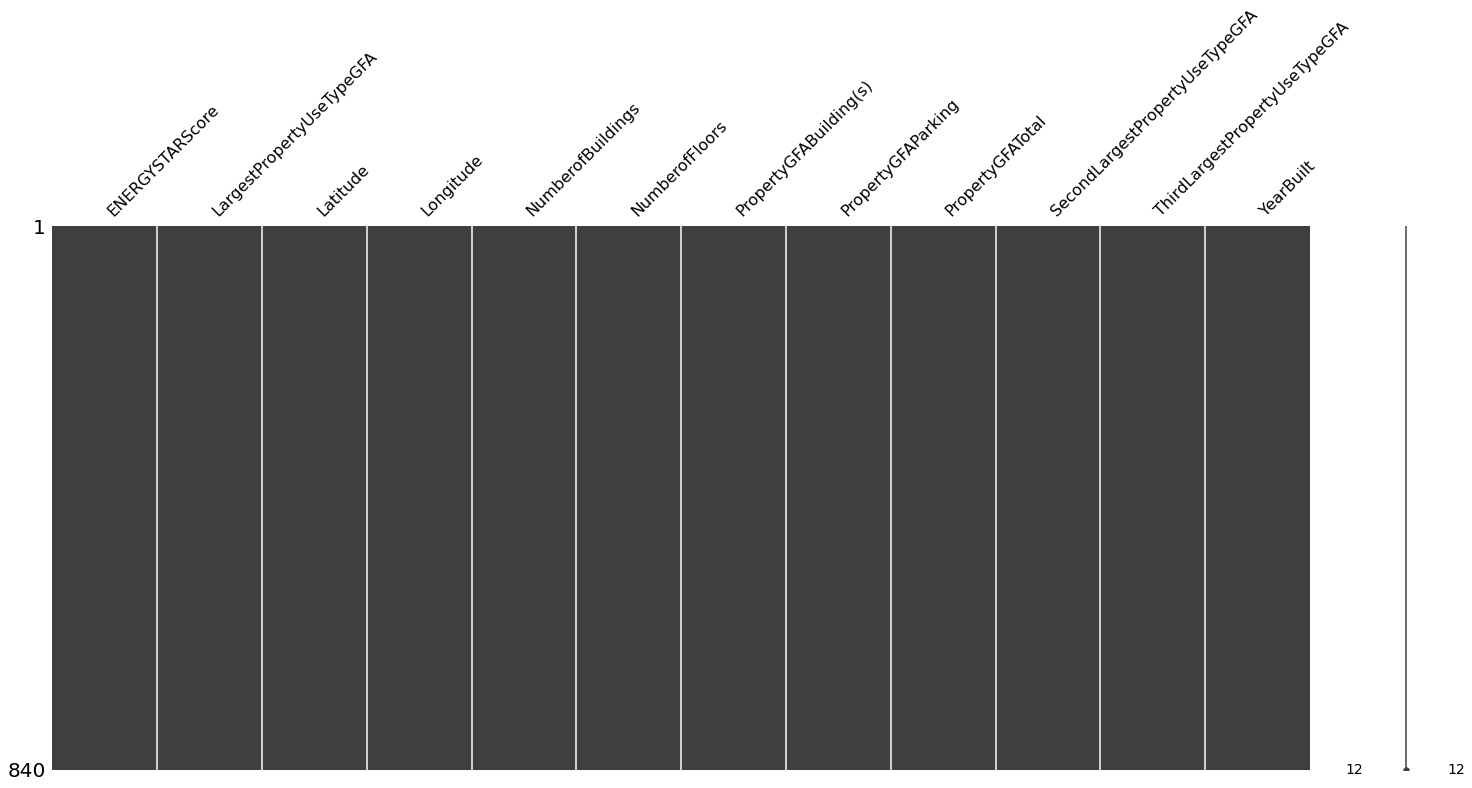

In [110]:
index_notna_ENERGYSTAR = X_train[X_train['ENERGYSTARScore'].notna()].index
df_select_imp = X_train.loc[index_notna_ENERGYSTAR, num_pred_features]
msno.matrix(df_select_imp)

Nous définissons dans un premier temps une fonction nous permettant d'amputer des valeurs dans un DataFrame et de stocker leurs indices pour une comparaison ultérieure des valeurs imputées avec les valeurs amputées.

In [111]:
def ampute_data(data,
                variables = None,
                pct_amp = 0.1,
                random_state = None):
    
    amputed_data = data.copy()
    amp_rows = int(pct_amp * data.shape[0])
    dict_index = dict()
    dict_index['amp_rows_size'] = amp_rows
    
    
    if random_state is None:
        rng = np.random.default_rng(seed=2022)
    else:
        rng = np.random.default_rng(seed=int(random_state))

    if variables is None:
        variables = [col for col in amputed_data.columns]
    elif isinstance(variables, list):
        if isinstance(variables[0], int):
            variables = [data.columns[i] for i in variables]
    
    dict_index['amp_total_size'] = amp_rows*len(variables)

    for v in variables:
        notna_index = amputed_data[amputed_data.loc[:,v].notna()].index
        amp_ind = rng.choice(notna_index, replace=False, size=amp_rows)
        amputed_data.loc[amp_ind, v] = np.nan
        dict_index[v]=amp_ind
    
    return amputed_data, dict_index

Nous allons tester les méthodes d'imputation suivantes :
   1. **SimpleImputer** (imputation par la moyenne)
   2. **SimpleImputer** (imputation par la médiane)
   3. **KNNImputer** (k plus proche voisins allant de 1 à 15)
   4. **IterativeImputer**
   5. **MICE** (Multiple Imputation Chained Equations)

In [112]:
imputer_select_seeds = list(rng.integers(low=0, high=10000, size=5))

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import miceforest as mf

from sklearn.metrics import mean_squared_error

Dans un premier temps nous générons un dictionnaire contenant 5 jeux de données avec différentes amputations de la colonne **ENERGYSTARScore**, ensuite nous imputerons ces différents jeux à l'aide des 5 méthodes citées plus haut afin de les comparer.

Nous allons utiliser un pourcentage d'imputation égal au taux de valeurs manquantes dans la colonne entière **ENERGYSTARScore** afin de nous rapprocher au plus des conditions dans lesquelles nous utiliserons la meilleure méthode d'imputation.

In [113]:
pct_amp = df['ENERGYSTARScore'].isna().mean()
pct_amp

0.32671364509929535

In [114]:
# On génère 5 jeux de données amputés différemment
dict_df_amp = dict()

for seed in imputer_select_seeds:
    dict_df_amp[imputer_select_seeds.index(seed)] = tuple(ampute_data(df_select_imp, 
                                                                variables=['ENERGYSTARScore'], 
                                                                pct_amp=pct_amp, 
                                                                random_state=seed))

In [115]:
dict_mean_imputer = dict()

for key in dict_df_amp.keys():
    data = dict_df_amp[key][0].copy()
    mean_imputer = SimpleImputer()
    dict_mean_imputer[key] = pd.DataFrame(mean_imputer.fit_transform(data), columns=df_select_imp.columns, index=df_select_imp.index)

dict_median_imputer = dict()

for key in dict_df_amp.keys():
    data = dict_df_amp[key][0].copy()
    median_imputer = SimpleImputer(strategy='median')
    dict_median_imputer[key] = pd.DataFrame(median_imputer.fit_transform(data), columns=df_select_imp.columns, index=df_select_imp.index)

dict_knnimputer = dict()
kmin=1
kmax=16

for k in range(kmin,kmax):
    dict_knnimputer[k] = list()
    for key in dict_df_amp.keys():
        data = dict_df_amp[key][0].copy()
        knn_imputer = KNNImputer(n_neighbors=k, weights="uniform")
        dict_knnimputer[k].append(pd.DataFrame(knn_imputer.fit_transform(data), columns=df_select_imp.columns, index=df_select_imp.index))

dict_iterativeimp = dict()

for key in dict_df_amp.keys():
        data = dict_df_amp[key][0].copy()
        iter_imp = IterativeImputer(random_state=SEED)
        dict_iterativeimp[key]= pd.DataFrame(iter_imp.fit_transform(data), columns=df_select_imp.columns, index=df_select_imp.index)

dict_mice = dict()

# on instancie un nombre d'observation voisines de l'observation contenant la valeur manquante, à considérer comme candidat 
# pour baser notre l'imputation
scheme_candidate = mf.mean_match_shap.copy()
scheme_candidate.set_mean_match_candidates(5)

for key in dict_df_amp.keys():
    dict_mice[key] = list()
    data = dict_df_amp[key][0].copy()
    # On crée le noyau
    kernel = mf.ImputationKernel(data,
                      datasets=4, # on crée 4 datasets d'imputations différents pour évaluer la distribution de l'imputation
                      mean_match_scheme=scheme_candidate,
                      save_all_iterations=True,
                      random_state=SEED)

    # on procède à 10 itérations de l'algorithme en espérant que les imputations convergent
    kernel.mice(10)
    
    dict_mice[key].append(kernel)
    dict_mice[key].append(kernel.complete_data())

Maintenant que nous avons tous nos jeux de données imputées, nous allons pouvoir calculer le score **Root Mean Square Error** obtenu sur chacun d'entre eux, ainsi que leur moyenne pour chacune des méthodes d'imputation :

In [116]:
list_rmse_mean = list()

for key in dict_df_amp.keys():
    index_amp = dict_df_amp[key][1]['ENERGYSTARScore']
    rmse = mean_squared_error(df_select_imp.loc[index_amp,'ENERGYSTARScore'], 
                  dict_mean_imputer[key].loc[index_amp,'ENERGYSTARScore'], squared=False)
    list_rmse_mean.append(np.round(rmse,2))

list_rmse_median = list()

for key in dict_df_amp.keys():
    index_amp = dict_df_amp[key][1]['ENERGYSTARScore']
    rmse = mean_squared_error(df_select_imp.loc[index_amp,'ENERGYSTARScore'], 
                  dict_median_imputer[key].loc[index_amp,'ENERGYSTARScore'], squared=False)
    list_rmse_median.append(np.round(rmse,2))

dict_rmse_knn = dict()

for k in range(kmin,kmax):
    dict_rmse_knn[k] = list()
    for key in dict_df_amp.keys():
        index_amp = dict_df_amp[key][1]['ENERGYSTARScore']
        rmse = mean_squared_error(df_select_imp.loc[index_amp,'ENERGYSTARScore'], 
                      dict_knnimputer[k][key].loc[index_amp,'ENERGYSTARScore'], squared=False)
        dict_rmse_knn[k].append(np.round(rmse,2))

list_rmse_iter = list()

for key in dict_df_amp.keys():
    index_amp = dict_df_amp[key][1]['ENERGYSTARScore']
    rmse = mean_squared_error(df_select_imp.loc[index_amp,'ENERGYSTARScore'], 
                  dict_iterativeimp[key].loc[index_amp,'ENERGYSTARScore'], squared=False)
    list_rmse_iter.append(np.round(rmse,2))

list_rmse_mice = list()

for key in dict_df_amp.keys():
    index_amp = dict_df_amp[key][1]['ENERGYSTARScore']
    rmse = mean_squared_error(df_select_imp.loc[index_amp,'ENERGYSTARScore'], 
                  dict_mice[key][1].loc[index_amp,'ENERGYSTARScore'], squared=False)
    list_rmse_mice.append(np.round(rmse,2))

Nous pouvons désormais comparer les différentes imputations réalisées:

In [117]:
dict_comparison_imp = {'mean':list_rmse_mean,
                       'median':list_rmse_median,
                       'iterative':list_rmse_iter,
                       'mice':list_rmse_mice}

for key in dict_knnimputer.keys():
    comp_key = f"knn k={key}"
    dict_comparison_imp[comp_key]=dict_rmse_knn[key]

df_comp_imp = pd.DataFrame(dict_comparison_imp)

df_comp_imp

mean  median  iterative   mice  knn k=1  knn k=2  knn k=3  knn k=4  \
0  28.62   30.04      28.15  34.96    38.26    33.57    32.57    32.32   
1  28.69   29.62      29.25  34.42    41.74    36.49    33.88    31.75   
2  28.25   29.85      28.72  34.93    38.93    34.20    33.30    32.07   
3  28.32   30.07      27.97  37.27    39.33    34.19    31.74    30.78   
4  28.99   30.74      28.80  34.58    39.16    33.45    31.75    30.74   

   knn k=5  knn k=6  knn k=7  knn k=8  knn k=9  knn k=10  knn k=11  knn k=12  \
0    32.20    31.53    31.13    31.06    30.87     30.84     30.61     30.54   
1    30.99    30.21    30.20    29.63    29.39     29.49     29.30     29.38   
2    31.74    31.50    30.99    30.35    30.29     30.19     30.34     30.25   
3    30.03    29.15    28.92    28.56    28.41     28.49     28.64     28.45   
4    29.91    30.14    30.00    29.72    29.60     29.71     29.87     29.62   

   knn k=13  knn k=14  knn k=15  
0     30.51     30.35     30.12  
1     29.28     29.25     29.28  
2     30.06     29.82     29.68  
3     28.36     28.31     28.36  
4     29.42     29.58     29.54

In [118]:
df_comp_imp.describe()

mean     median  iterative       mice    knn k=1    knn k=2  \
count   5.000000   5.000000   5.000000   5.000000   5.000000   5.000000   
mean   28.574000  30.064000  28.578000  35.232000  39.484000  34.380000   
std     0.299216   0.418485   0.518141   1.162226   1.325077   1.228983   
min    28.250000  29.620000  27.970000  34.420000  38.260000  33.450000   
25%    28.320000  29.850000  28.150000  34.580000  38.930000  33.570000   
50%    28.620000  30.040000  28.720000  34.930000  39.160000  34.190000   
75%    28.690000  30.070000  28.800000  34.960000  39.330000  34.200000   
max    28.990000  30.740000  29.250000  37.270000  41.740000  36.490000   

         knn k=3   knn k=4    knn k=5    knn k=6   knn k=7    knn k=8  \
count   5.000000   5.00000   5.000000   5.000000   5.00000   5.000000   
mean   32.648000  31.53200  30.974000  30.506000  30.24800  29.864000   
std     0.946029   0.73326   1.014066   1.012042   0.88824   0.927701   
min    31.740000  30.74000  29.910000  29.150000  28.92000  28.560000   
25%    31.750000  30.78000  30.030000  30.140000  30.00000  29.630000   
50%    32.570000  31.75000  30.990000  30.210000  30.20000  29.720000   
75%    33.300000  32.07000  31.740000  31.500000  30.99000  30.350000   
max    33.880000  32.32000  32.200000  31.530000  31.13000  31.060000   

         knn k=9   knn k=10   knn k=11   knn k=12   knn k=13   knn k=14  \
count   5.000000   5.000000   5.000000   5.000000   5.000000   5.000000   
mean   29.712000  29.744000  29.752000  29.648000  29.526000  29.462000   
std     0.933606   0.871539   0.796348   0.816376   0.819256   0.758729   
min    28.410000  28.490000  28.640000  28.450000  28.360000  28.310000   
25%    29.390000  29.490000  29.300000  29.380000  29.280000  29.250000   
50%    29.600000  29.710000  29.870000  29.620000  29.420000  29.580000   
75%    30.290000  30.190000  30.340000  30.250000  30.060000  29.820000   
max    30.870000  30.840000  30.610000  30.540000  30.510000  30.350000   

        knn k=15  
count   5.000000  
mean   29.396000  
std     0.654278  
min    28.360000  
25%    29.280000  
50%    29.540000  
75%    29.680000  
max    30.120000

La meilleur méthode d'imputation est celle de l'algorithme **MICE**.

Regardons d'un peu plus près les caractéristiques de l'imputation qu'il génère :

In [119]:
# Nous choisissons le noyau généré par l'algorithme sur le 3ème jeu de données de validation
kernel = dict_mice[1][0]

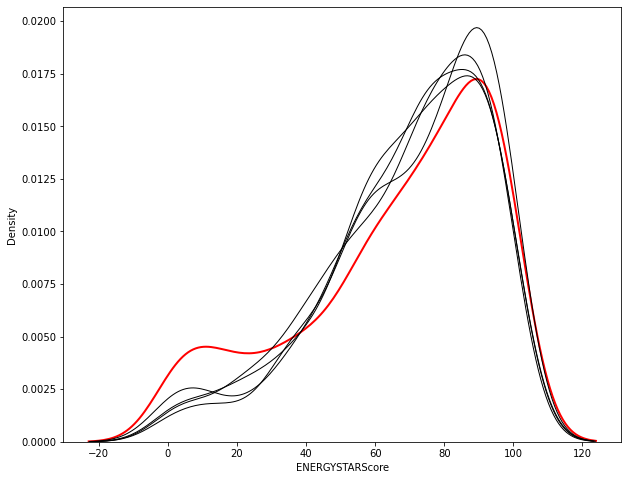

In [120]:
# Distribution de la variable imputée dans chacun des datasets (4) générés pour le deuxième jeu de donnée de validation

kernel.plot_imputed_distributions(wspace=0.3,
                                  hspace=0.3, 
                                  variables=['ENERGYSTARScore'])
save_fig("Distribution des imputations par MICE")

Ci-dessous nous pouvons remarquer que l'algorithme converge très rapidement vers ses estimations finales !

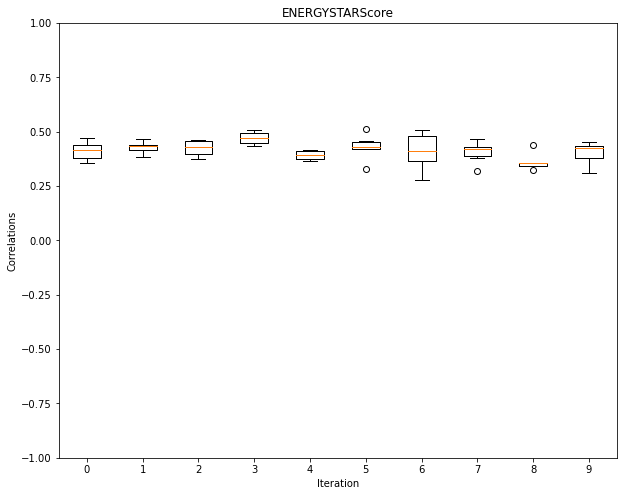

In [121]:
# Évolution de la distribution de la corrélation de distribution entre les datasets imputés et la distribution
# des données non manquantes

kernel.plot_correlations(variables=['ENERGYSTARScore'])
save_fig("Convergence des imputations par MICE")

Ci-dessous nous pouvons observer que 3 variables ont été particulièrement importantes pour l'imputation de **ENERGYSTARScore**.

Nous remarquons néanmoins que la variable la plus importante est **LargestPropertyUseTypeGFA**.

AxesSubplot(0.125,0.125;0.62x0.755)


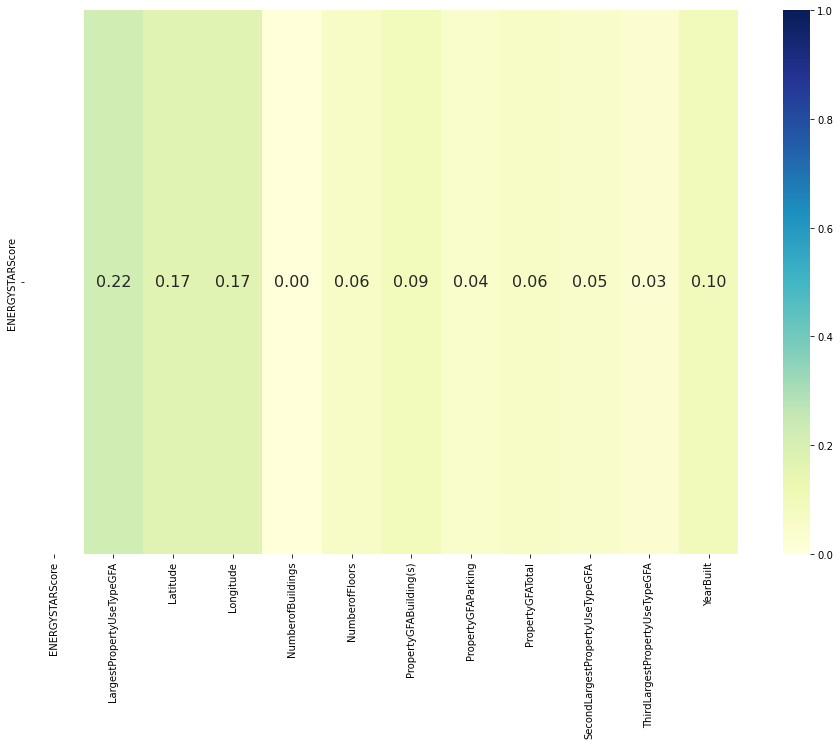

In [122]:
# Diagramme d'importance des variables dans l'imputation

plt.figure(figsize=(16,10))
kernel.plot_feature_importance(dataset=0, annot=True,cmap="YlGnBu",vmin=0, vmax=1,fmt=".2f")
save_fig("Importance des variables utilisées pour l'imputation par MICE")

Enfin, nous pouvons observer si la moyenne de nos imputations finit par converger.

Ici, nous y sommes presque, il aurait peut-être fallu quelques itérations de plus pour arriver à une moyenne stable.

Cependant, étant donné que la convergence de la moyenne des imputations n'arrive pas dès les premières itérations, cela nous informe que les données manquantes étaient bien manquantes aléatoirement, et donc notre fonction d'amputation fait bien son travail.

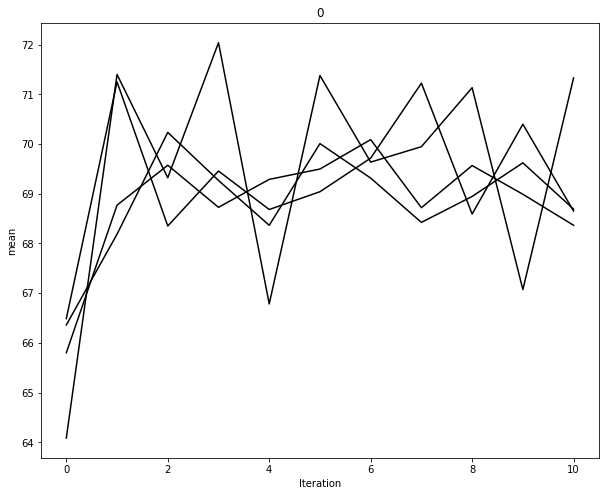

In [123]:
# Évolution des moyennes des imputations en fonction des itérations
kernel.plot_mean_convergence(wspace=0.3, hspace=0.4)
save_fig("Convergence des moyennes des imputations par MICE")

Imputons maintenant les valeurs manquantes dans nos jeux d'entraînement et de test :

In [124]:
kernel_train = mf.ImputationKernel(X_train[numerical_features],
                                   mean_match_scheme=scheme_candidate,
                                   random_state=SEED)

kernel_train.mice(4)
X_train_imp = kernel_train.complete_data()

kernel_test = kernel_train.impute_new_data(X_test[numerical_features])
X_test_imp = kernel_test.complete_data(0)

X_train['ENERGYSTARScore'] = X_train_imp['ENERGYSTARScore']
X_test['ENERGYSTARScore'] = X_test_imp['ENERGYSTARScore']

In [125]:
X_train.isna().mean().mean(), X_test.isna().mean().mean()

(0.0, 0.0)

# Traitement des variables cibles

Nous avons pu constater que les distributions de nos variables cibles suivent une loi exponentielle.

Nous allons leur appliquer la fonction logarithme pour voir si nous obtenons des distributions plus proches de la loi normale :

--------------------
SITEENERGYUSE(KBTU)




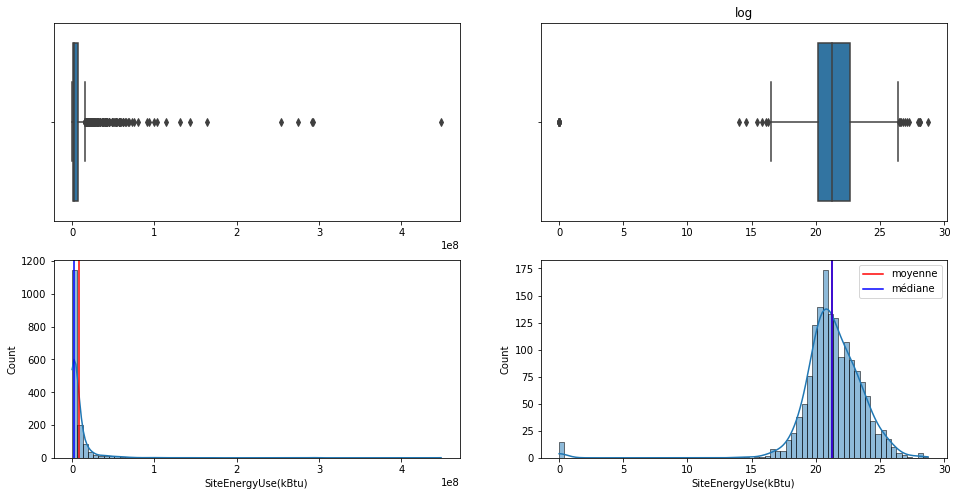

--------------------
TOTALGHGEMISSIONS




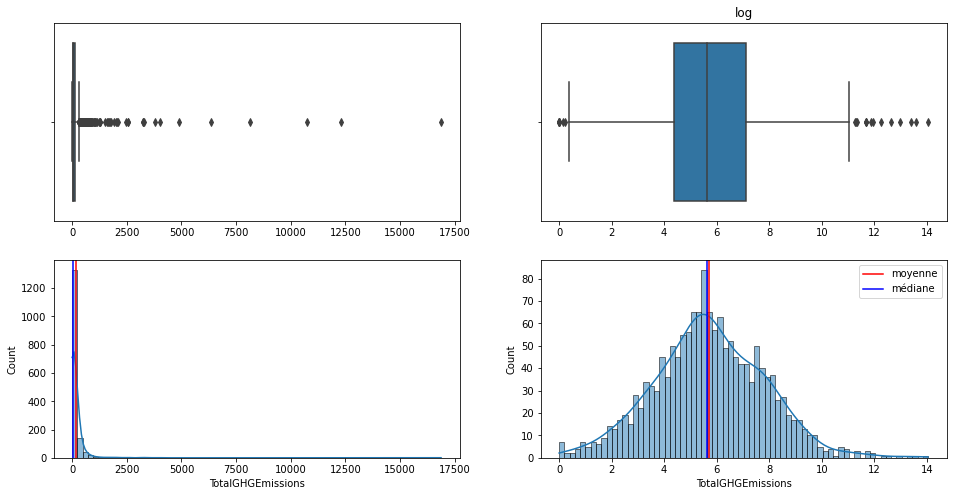

In [126]:
for col in [conso, co2]:
    subset = df[col]
    log_subset = np.log2(df[col]+1)
    print("-"*20)
    print(col.upper())
    print('\n')
    fig = plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    ax1 = sns.boxplot(x=subset)
    ax1.set(xlabel=None)
    plt.subplot(2,2,3)
    ax2 = sns.histplot(x=subset, kde=True, bins=70)
    plt.axvline(x=subset.mean(), color='r', label='moyenne')
    plt.axvline(x=subset.median(), color='b', label='médiane')
    plt.subplot(2,2,2)
    plt.title("log")
    ax3 = sns.boxplot(x=log_subset)
    ax3.set(xlabel=None)
    plt.subplot(2,2,4)
    ax4 = sns.histplot(x=log_subset, kde=True, bins=70)
    plt.axvline(x=log_subset.mean(), color='r', label='moyenne')
    plt.axvline(x=log_subset.median(), color='b', label='médiane')
    plt.legend()
    save_fig(f"Distribution après passage au log de {col}")
    plt.show()

Le résultat de la transformation logarithmique de nos variables cibles est sans équivoque...

# Sauvegarde des jeux de données pour la modélisation

In [127]:
X_train = X_train[pred_features]
X_test = X_test[pred_features]

In [128]:
X_train.to_csv("datasets/EDA_X_train.csv", index=False)
X_test.to_csv("datasets/EDA_X_test.csv", index=False)
y_train.to_csv("datasets/EDA_y_train.csv", index=False)
y_test.to_csv("datasets/EDA_y_test.csv", index=False)

## Fin de l'analyse exploratoire